In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/attrition-persona-juridica-bbva/DATA_SOLICITUDES_F.txt
/kaggle/input/attrition-persona-juridica-bbva/DATA_STOCK_SUBMIT_SAMPLE.csv
/kaggle/input/attrition-persona-juridica-bbva/DATA_TRANSAC_CANALES_F.txt
/kaggle/input/attrition-persona-juridica-bbva/DATA_ENDEUDAMIENTO_F.txt
/kaggle/input/attrition-persona-juridica-bbva/DATA_STOCK_VARS_TEST_F.txt
/kaggle/input/attrition-persona-juridica-bbva/DATA_COTIZACIONES_DESEMBOLSO_F.txt
/kaggle/input/attrition-persona-juridica-bbva/DATA_EVALUACIONES_F.txt
/kaggle/input/attrition-persona-juridica-bbva/DATA_STOCK_VARS_TRAIN_F.txt
/kaggle/input/attrition-persona-juridica-bbva/DATA_PRODUCTOS_BCO_F.txt
/kaggle/input/attrition-persona-juridica-bbva/diccionario de datos_actualizado/DATA_COTIZACIONES_DESEMBOLSO.xlsx
/kaggle/input/attrition-persona-juridica-bbva/diccionario de datos_actualizado/DATA_PRODUCTOS_BCO.xlsx
/kaggle/input/attrition-persona-juridica-bbva/diccionario de datos_actualizado/DATA_SOLICITUDES.xlsx
/kaggle/input/attrition-pe

In [6]:
from pylab import *
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns
from scipy import stats
import random
import sys 
import gc

from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedShuffleSplit, ShuffleSplit, StratifiedKFold
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import minmax_scale, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import recall_score, precision_score, r2_score, roc_auc_score
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
from sklearn.ensemble import GradientBoostingClassifier , RandomForestClassifier ,  RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from scipy import spatial
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, ElasticNet, Lasso
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA 
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.optimize import curve_fit
from scipy.optimize import curve_fit
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

def year_month_2_dt(MES):
    y = trunc(MES/100)
    m = mod(MES,100)
    m = array(m)
    m_ = zeros(m.size)
    for i, mm in enumerate(m):
        if mm<3:
            m_[i] = mm-2 + 12
            y.iloc[i] = y.iloc[i]-1
        else:
            m_[i] = mm-2
    date = pd.to_datetime(pd.DataFrame({'year':y,'month':m_, 'day':y*0 +1})) 
    return date

def year_month_dt(MES):
    y = trunc(MES/100)
    m = mod(MES,100)
    date = pd.to_datetime(pd.DataFrame({'year':y,'month':m, 'day':y*0 +1})) 
    return date




def year_month_2(MES):
    y = trunc(MES/100)
    m = mod(MES,100)
    m = array(m)
    m_ = zeros(m.size)
    for i, mm in enumerate(m):
        if mm<3:
            m_[i] = mm-2 + 12
            y.iloc[i] = y.iloc[i]-1
        else:
            m_[i] = mm-2
    date = y*100 + m_
    return date.astype('int')

def MES_to_X(MES):
    y = trunc(MES/100)
    m = mod(MES,100)
    x = (y-2017)*12 + m
    return x







def find_corr(df, cc = .7, CMAP = 'viridis', N =1, method = 'pearson'):
    """df : DataFrame """
    CORR = df.corr(method = method)
    CORR[abs(CORR)< cc ] =0
    CC = CORR.copy()
    IC = []
    #CC.fillna(1, inplace = True)
    for i, II in enumerate(CC.index):
    #    print( (CC.iloc[i, i:]>0).sum() )
    #    print(CC.iloc[i, i:]>0 )
        if (  abs( CC.iloc[i, i:] ) >0 ).sum()>1:
            IC.append(II)
    IC = IC +    CORR.columns[CORR.isna().sum() == df.columns.size].tolist()  
    INC = list(CC.columns)
    [ INC.remove(c) for c in IC]
    figure(N, figsize = (12,6))
    subplot(1,2,1),  sns.heatmap(CORR, cmap = CMAP)
    CC = df[INC].corr()
    #CC[abs(CC)<cc] = 0
    subplot(1,2,2), sns.heatmap(CC, cmap = CMAP)
    tight_layout()
    show()
    return INC





def KVS_TEST(dfX, y, pv0 = .005):
    """Kolmogorov-Smirnov TEST """
    names = []
    PV = []
    ST = []
    #Z = dfX.copy()
    for n in dfX.columns:
        X0 = dfX[n] ;
        z0 = X0[y==0].values
        z1 = X0[y==1].values
        st, pv = stats.ks_2samp(z0, z1)
        if pv <pv0:
            names.append(n)
            PV.append(pv)
            ST.append(st)
    return names, PV, ST


This approximation gets ideas of works: "Distributed and parallel time series feature extraction for industrial big data applications" and "Time Series Feature Extraction on basis of Scalable Hypothesis tests"

https://www.sciencedirect.com/science/article/pii/S0925231218304843


https://arxiv.org/pdf/1610.07717.pdf

In [7]:
df_producto = pd.read_csv('/kaggle/input/attrition-persona-juridica-bbva/DATA_PRODUCTOS_BCO_F.txt', index_col = 'ID_CLIENTE')
df_stock_train= pd.read_csv('/kaggle/input/attrition-persona-juridica-bbva/DATA_STOCK_VARS_TRAIN_F.txt', index_col = 'ID_CLIENTE')
df_stock_test= pd.read_csv('/kaggle/input/attrition-persona-juridica-bbva/DATA_STOCK_VARS_TEST_F.txt', index_col = 'ID_CLIENTE')
print(df_producto.shape, df_stock_train.shape , df_stock_test.shape)
df_producto.head()

/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(1739335, 83) (73661, 19) (26338, 19)


MES  NU_CTA_AHORRO  RGO_SDO_AHORRO  RGO_MARGEN_AHORRO  \
ID_CLIENTE                                                             
44765       201708              1              11                 10   
32317       201708              1              11                 10   
59201       201708              1              11                 10   
13541       201709              2              11                 10   
32375       201710              1              11                 10   

            NU_CTA_CTE  RGO_SDO_CTE  RGO_MARGEN_CTE  NU_CTA_FMUTUO  \
ID_CLIENTE                                                           
44765                0            3               9              0   
32317                0            3               9              0   
59201                0            3               9              0   
13541                0            5               9              0   
32375                0            3               9              0   

            RGO_SDO_FMUTUO  RGO_MARGEN_FMUTUO  ...  RGO_SDO_CMPL  \
ID_CLIENTE                                     ...                 
44765                    6                 13  ...             6   
32317                    6                 13  ...             6   
59201                    6                 13  ...             6   
13541                   19                 13  ...             6   
32375                    6                 13  ...             6   

            RGO_MARGEN_CMPL  NU_CTA_CARTERA  RGO_SDO_CARTERA  \
ID_CLIENTE                                                     
44765                    11               0                6   
32317                    11               0                6   
59201                    11               0                6   
13541                    11               0                6   
32375                    11               0                6   

            RGO_MARGEN_CARTERA  NU_CTA_STANDBY  RGO_SDO_STANDBY  \
ID_CLIENTE                                                        
44765                       13               0                6   
32317                       13               0                6   
59201                       13               0                6   
13541                       13               0                6   
32375                       13               0                6   

            RGO_MARGEN_STANDBY  RGO_PASIVO  RGO_ACTIVO  
ID_CLIENTE                                              
44765                       11           6           2  
32317                       11           6           2  
59201                       11           6           2  
13541                       11           6           2  
32375                       11           6           2  

[5 rows x 83 columns]

In [8]:

MES_T0 = pd.concat([df_stock_train.MES_T0, df_stock_test.MES_T0], axis = 0)
MES_T0.head()



ID_CLIENTE
48117    201808
87846    201808
89372    201808
87164    201804
13922    201804
Name: MES_T0, dtype: int64

# PRODUCTO DATASET

In [9]:
df_producto.head()

MES  NU_CTA_AHORRO  RGO_SDO_AHORRO  RGO_MARGEN_AHORRO  \
ID_CLIENTE                                                             
44765       201708              1              11                 10   
32317       201708              1              11                 10   
59201       201708              1              11                 10   
13541       201709              2              11                 10   
32375       201710              1              11                 10   

            NU_CTA_CTE  RGO_SDO_CTE  RGO_MARGEN_CTE  NU_CTA_FMUTUO  \
ID_CLIENTE                                                           
44765                0            3               9              0   
32317                0            3               9              0   
59201                0            3               9              0   
13541                0            5               9              0   
32375                0            3               9              0   

            RGO_SDO_FMUTUO  RGO_MARGEN_FMUTUO  ...  RGO_SDO_CMPL  \
ID_CLIENTE                                     ...                 
44765                    6                 13  ...             6   
32317                    6                 13  ...             6   
59201                    6                 13  ...             6   
13541                   19                 13  ...             6   
32375                    6                 13  ...             6   

            RGO_MARGEN_CMPL  NU_CTA_CARTERA  RGO_SDO_CARTERA  \
ID_CLIENTE                                                     
44765                    11               0                6   
32317                    11               0                6   
59201                    11               0                6   
13541                    11               0                6   
32375                    11               0                6   

            RGO_MARGEN_CARTERA  NU_CTA_STANDBY  RGO_SDO_STANDBY  \
ID_CLIENTE                                                        
44765                       13               0                6   
32317                       13               0                6   
59201                       13               0                6   
13541                       13               0                6   
32375                       13               0                6   

            RGO_MARGEN_STANDBY  RGO_PASIVO  RGO_ACTIVO  
ID_CLIENTE                                              
44765                       11           6           2  
32317                       11           6           2  
59201                       11           6           2  
13541                       11           6           2  
32375                       11           6           2  

[5 rows x 83 columns]

In [10]:
df_producto = pd.concat([df_producto, MES_T0.loc[df_producto.index] ], axis = 1)
df_producto.head()


MES  NU_CTA_AHORRO  RGO_SDO_AHORRO  RGO_MARGEN_AHORRO  \
ID_CLIENTE                                                             
44765       201708              1              11                 10   
32317       201708              1              11                 10   
59201       201708              1              11                 10   
13541       201709              2              11                 10   
32375       201710              1              11                 10   

            NU_CTA_CTE  RGO_SDO_CTE  RGO_MARGEN_CTE  NU_CTA_FMUTUO  \
ID_CLIENTE                                                           
44765                0            3               9              0   
32317                0            3               9              0   
59201                0            3               9              0   
13541                0            5               9              0   
32375                0            3               9              0   

            RGO_SDO_FMUTUO  RGO_MARGEN_FMUTUO  ...  RGO_MARGEN_CMPL  \
ID_CLIENTE                                     ...                    
44765                    6                 13  ...               11   
32317                    6                 13  ...               11   
59201                    6                 13  ...               11   
13541                   19                 13  ...               11   
32375                    6                 13  ...               11   

            NU_CTA_CARTERA  RGO_SDO_CARTERA  RGO_MARGEN_CARTERA  \
ID_CLIENTE                                                        
44765                    0                6                  13   
32317                    0                6                  13   
59201                    0                6                  13   
13541                    0                6                  13   
32375                    0                6                  13   

            NU_CTA_STANDBY  RGO_SDO_STANDBY  RGO_MARGEN_STANDBY  RGO_PASIVO  \
ID_CLIENTE                                                                    
44765                    0                6                  11           6   
32317                    0                6                  11           6   
59201                    0                6                  11           6   
13541                    0                6                  11           6   
32375                    0                6                  11           6   

            RGO_ACTIVO  MES_T0  
ID_CLIENTE                      
44765                2  201808  
32317                2  201805  
59201                2  201902  
13541                2  201804  
32375                2  201805  

[5 rows x 84 columns]

In [11]:
print(df_producto.shape)
# works with months minor a month to evaluate

df_producto = df_producto[df_producto.MES<df_producto.MES_T0]
print(df_producto.shape)
df_producto.head()

(1739335, 84)
(1204825, 84)


MES  NU_CTA_AHORRO  RGO_SDO_AHORRO  RGO_MARGEN_AHORRO  \
ID_CLIENTE                                                             
44765       201708              1              11                 10   
32317       201708              1              11                 10   
59201       201708              1              11                 10   
13541       201709              2              11                 10   
32375       201710              1              11                 10   

            NU_CTA_CTE  RGO_SDO_CTE  RGO_MARGEN_CTE  NU_CTA_FMUTUO  \
ID_CLIENTE                                                           
44765                0            3               9              0   
32317                0            3               9              0   
59201                0            3               9              0   
13541                0            5               9              0   
32375                0            3               9              0   

            RGO_SDO_FMUTUO  RGO_MARGEN_FMUTUO  ...  RGO_MARGEN_CMPL  \
ID_CLIENTE                                     ...                    
44765                    6                 13  ...               11   
32317                    6                 13  ...               11   
59201                    6                 13  ...               11   
13541                   19                 13  ...               11   
32375                    6                 13  ...               11   

            NU_CTA_CARTERA  RGO_SDO_CARTERA  RGO_MARGEN_CARTERA  \
ID_CLIENTE                                                        
44765                    0                6                  13   
32317                    0                6                  13   
59201                    0                6                  13   
13541                    0                6                  13   
32375                    0                6                  13   

            NU_CTA_STANDBY  RGO_SDO_STANDBY  RGO_MARGEN_STANDBY  RGO_PASIVO  \
ID_CLIENTE                                                                    
44765                    0                6                  11           6   
32317                    0                6                  11           6   
59201                    0                6                  11           6   
13541                    0                6                  11           6   
32375                    0                6                  11           6   

            RGO_ACTIVO  MES_T0  
ID_CLIENTE                      
44765                2  201808  
32317                2  201805  
59201                2  201902  
13541                2  201804  
32375                2  201805  

[5 rows x 84 columns]

In [12]:

df = pd.DataFrame()
df['name'] = df_producto.columns
df['counts'] = 0
CC = df_producto.columns
for k, c in enumerate(CC):
    #print(c, df_producto[c].unique().size)
    df['counts'].loc[k] = df_producto[c].unique().size
df.head()



/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


name  counts
0                MES      19
1      NU_CTA_AHORRO      13
2     RGO_SDO_AHORRO      20
3  RGO_MARGEN_AHORRO      20
4         NU_CTA_CTE      16

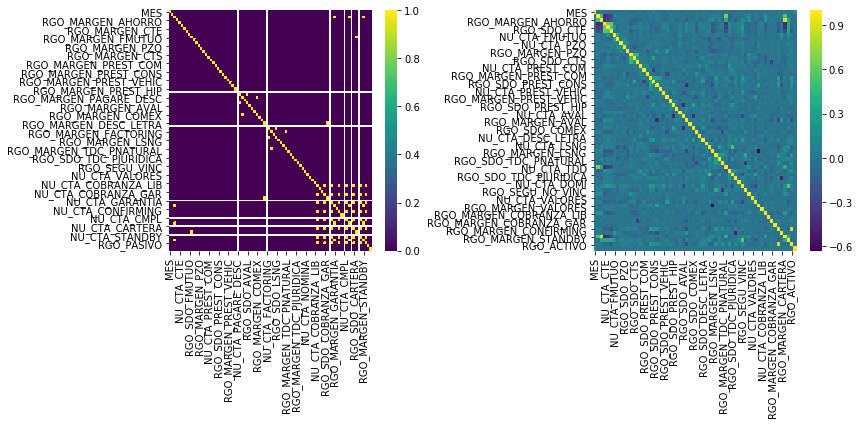

62


In [13]:

a = find_corr(df_producto, cc = .98)
print(len(a))
df_producto = df_producto[a]



In [14]:
df_producto.MES = MES_to_X(df_producto.MES)
df_producto.MES_T0 = MES_to_X(df_producto.MES_T0)


In [15]:

IX = intersect1d(df_stock_train.index , df_producto.index)
y_train = df_stock_train.loc[IX].FUGA_3M
print(len(IX), len(y_train))

72928 72928


# FUNCTION TO SEPARATE TIME SERIES BY 3 MONTHS AND 2 MONTHS

All time series will be reshaped by windows. Two groups of 3 months for the last 6 months. And Three groups of 2 months for the first 6 months. For every subgroup, we will take means and maximums.
For to reduce the numbers of features, we will take the KOLGOMOROV TEST. 

In [16]:
def mean_dates_3(df, namecol = '_'):
    #########################################
    A = df.loc[(df.MES > df.MES_T0-3) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').mean()
    CC = A.columns
    CC = [c + namecol + '21' for c in CC]
    A.columns = CC
    df0 = A
    #######################3333
    A = df.loc[(df.MES<=df.MES_T0-3) & (df.MES>df.MES_T0-5) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').mean()
    CC = A.columns
    CC = [c + namecol + '22' for c in CC]
    A.columns = CC
    df1 = A
    #######################3333
    A = df.loc[(df.MES<=df.MES_T0-5) & (df.MES>df.MES_T0-7) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').mean()
    CC = A.columns
    CC = [c + namecol + '23' for c in CC]
    A.columns = CC
    df2 = A
    #####################3
    #A = df.loc[(df.MES<=df.MES_T0-4) & (df.MES>df.MES_T0-7) ]
    #A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    #A = A.groupby('ID_CLIENTE').mean()
    #CC = A.columns
    #CC = [c + namecol + '32' for c in CC]
    #A.columns = CC
    #df2 = A
    #######################################################
    A = df.loc[(df.MES>df.MES_T0-10) & (df.MES<=df.MES_T0-7) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').mean()
    CC = A.columns
    CC = [c + namecol + '33' for c in CC]
    A.columns = CC
    df3 = A
    #####################################################
    #######################################################
    A = df.loc[(df.MES>df.MES_T0-13) & (df.MES<=df.MES_T0-10) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').mean()
    CC = A.columns
    CC = [c + namecol + '34' for c in CC]
    A.columns = CC
    df4 = A
    #######################################################
    #A = df.loc[(df.MES>df.MES_T0-13) & (df.MES<=df.MES_T0-11) ]
    #A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    #A = A.groupby('ID_CLIENTE').mean()
    #CC = A.columns
    #CC = [c + namecol + '26' for c in CC]
    #A.columns = CC
    #df5 = A
    
    DF = pd.concat([df0, df1, df2, df3, df4], axis =  1)
    #DF.fillna(0, inplace = True)
    del df4, df1, df2, df3, A, df0
    return DF

def mean_test_3(df0, IX, y_train, namecol = '_', pv0 = 1e-5 ):

    df = mean_dates_3(df0, namecol = namecol)
    
    names, pv, st = KVS_TEST(df.loc[IX], y_train , pv0 = pv0)
    u = find_corr(df[names], cc= .9)
    print( len(u) )
    df = df[u]
    return df 


In [17]:
def mean_dates_3_max(df, namecol = '_'):
    #########################################
    A = df.loc[(df.MES > df.MES_T0-3) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').max()
    CC = A.columns
    CC = [c + namecol + '21' for c in CC]
    A.columns = CC
    df0 = A
    #######################3333
    A = df.loc[(df.MES<=df.MES_T0-3) & (df.MES>df.MES_T0-5) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').max()
    CC = A.columns
    CC = [c + namecol + '22' for c in CC]
    A.columns = CC
    df1 = A
    #######################3333
    A = df.loc[(df.MES<=df.MES_T0-5) & (df.MES>df.MES_T0-7) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').max()
    CC = A.columns
    CC = [c + namecol + '23' for c in CC]
    A.columns = CC
    df2 = A
    #####################3
    #A = df.loc[(df.MES<=df.MES_T0-4) & (df.MES>df.MES_T0-7) ]
    #A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    #A = A.groupby('ID_CLIENTE').mean()
    #CC = A.columns
    #CC = [c + namecol + '32' for c in CC]
    #A.columns = CC
    #df2 = A
    #######################################################
    A = df.loc[(df.MES>df.MES_T0-10) & (df.MES<=df.MES_T0-7) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').max()
    CC = A.columns
    CC = [c + namecol + '33' for c in CC]
    A.columns = CC
    df3 = A
    #####################################################
    #######################################################
    A = df.loc[(df.MES>df.MES_T0-13) & (df.MES<=df.MES_T0-10) ]
    A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    A = A.groupby('ID_CLIENTE').max()
    CC = A.columns
    CC = [c + namecol + '34' for c in CC]
    A.columns = CC
    df4 = A
    #######################################################
    #A = df.loc[(df.MES>df.MES_T0-13) & (df.MES<=df.MES_T0-11) ]
    #A.drop(columns = ['MES', 'MES_T0'], inplace = True)
    #A = A.groupby('ID_CLIENTE').mean()
    #CC = A.columns
    #CC = [c + namecol + '26' for c in CC]
    #A.columns = CC
    #df5 = A
    
    DF = pd.concat([df0, df1, df2, df3, df4], axis =  1)
    #DF.fillna(0, inplace = True)
    del df4, df1, df2, df3, A, df0
    return DF

def mean_test_3_max(df0, IX, y_train, namecol = '_', pv0 = 1e-5 ):

    df = mean_dates_3_max(df0, namecol = namecol)
    
    names, pv, st = KVS_TEST(df.loc[IX], y_train , pv0 = pv0)
    u = find_corr(df[names], cc= .9)
    print( len(u) )
    df = df[u]
    return df 


In [18]:
dz = df_producto.reset_index().set_index(['ID_CLIENTE','MES', 'MES_T0'])
dz.head()

NU_CTA_AHORRO  RGO_MARGEN_AHORRO  NU_CTA_CTE  \
ID_CLIENTE MES  MES_T0                                                 
44765      8.0  20.0                1                 10           0   
32317      8.0  17.0                1                 10           0   
59201      8.0  26.0                1                 10           0   
13541      9.0  16.0                2                 10           0   
32375      10.0 17.0                1                 10           0   

                        RGO_SDO_CTE  RGO_MARGEN_CTE  NU_CTA_FMUTUO  \
ID_CLIENTE MES  MES_T0                                               
44765      8.0  20.0              3               9              0   
32317      8.0  17.0              3               9              0   
59201      8.0  26.0              3               9              0   
13541      9.0  16.0              5               9              0   
32375      10.0 17.0              3               9              0   

                        RGO_SDO_FMUTUO  NU_CTA_PZO  RGO_SDO_PZO  \
ID_CLIENTE MES  MES_T0                                            
44765      8.0  20.0                 6           0           10   
32317      8.0  17.0                 6           0           10   
59201      8.0  26.0                 6           0           10   
13541      9.0  16.0                19           0           12   
32375      10.0 17.0                 6           0           10   

                        RGO_MARGEN_PZO  ...  NU_CTA_COBRANZA_LIB  \
ID_CLIENTE MES  MES_T0                  ...                        
44765      8.0  20.0                 2  ...                    0   
32317      8.0  17.0                 2  ...                    0   
59201      8.0  26.0                 2  ...                    0   
13541      9.0  16.0                 2  ...                    0   
32375      10.0 17.0                 2  ...                    0   

                        RGO_MARGEN_COBRANZA_LIB  NU_CTA_COBRANZA_GAR  \
ID_CLIENTE MES  MES_T0                                                 
44765      8.0  20.0                         15                    0   
32317      8.0  17.0                         15                    0   
59201      8.0  26.0                         15                    0   
13541      9.0  16.0                         15                    0   
32375      10.0 17.0                         15                    0   

                        RGO_MARGEN_COBRANZA_GAR  NU_CTA_CONFIRMING  \
ID_CLIENTE MES  MES_T0                                               
44765      8.0  20.0                          3                  0   
32317      8.0  17.0                          3                  0   
59201      8.0  26.0                          3                  0   
13541      9.0  16.0                          3                  0   
32375      10.0 17.0                          3                  0   

                        RGO_MARGEN_CONFIRMING  RGO_MARGEN_CARTERA  \
ID_CLIENTE MES  MES_T0                                              
44765      8.0  20.0                        2                  13   
32317      8.0  17.0                        2                  13   
59201      8.0  26.0                        2                  13   
13541      9.0  16.0                        2                  13   
32375      10.0 17.0                        2                  13   

                        RGO_MARGEN_STANDBY  RGO_PASIVO  RGO_ACTIVO  
ID_CLIENTE MES  MES_T0                                              
44765      8.0  20.0                    11           6           2  
32317      8.0  17.0                    11           6           2  
59201      8.0  26.0                    11           6           2  
13541      9.0  16.0                    11           6           2  
32375      10.0 17.0                    11           6           2  

[5 rows x 60 columns]

# SOME USEFUL  TIME SERIES TRANSFORMATIONS

In [19]:
####### diff

df = dz.copy()
dff1 = reduce_mem_usage( (df -df.groupby(['ID_CLIENTE']).shift(1)) )
dff_sh = reduce_mem_usage( (df.groupby(['ID_CLIENTE']).shift(1)/df ) )
dflog = reduce_mem_usage( df.apply(np.log) )


dff_sh.replace([np.inf, -np.inf], np.nan, inplace = True)
dff_sh.fillna(1, inplace = True)
dff1.fillna(0, inplace = True)
dflog.replace([np.inf, -np.inf], np.nan, inplace = True)
dflog.fillna(1, inplace = True)

Mem. usage decreased to 145.53 Mb (74.0% reduction)
Mem. usage decreased to 297.20 Mb (46.9% reduction)
Mem. usage decreased to 297.20 Mb (46.9% reduction)


As the majority of features have only a few unique numeric values. We will create new features counting the numbers of numeric values.

In [20]:

df1 = df_producto.reset_index()
df = []
j = 1
for c in df1.drop(["ID_CLIENTE", "MES", "MES_T0"], axis=1).columns:
    print("haciendo", c, j)
    temp = pd.crosstab(df1.ID_CLIENTE, df1[c])
    temp.columns = [c + "_" + str(v) for v in temp.columns]
    j = j+1
    df.append(temp)
    #df.append(temp.apply(lambda x: x / x.sum(), axis=1))
df = pd.concat(df, axis=1)
del df1
df.head()

haciendo NU_CTA_AHORRO 1
haciendo RGO_MARGEN_AHORRO 2
haciendo NU_CTA_CTE 3
haciendo RGO_SDO_CTE 4
haciendo RGO_MARGEN_CTE 5
haciendo NU_CTA_FMUTUO 6
haciendo RGO_SDO_FMUTUO 7
haciendo NU_CTA_PZO 8
haciendo RGO_SDO_PZO 9
haciendo RGO_MARGEN_PZO 10
haciendo NU_CTA_CTS 11
haciendo RGO_SDO_CTS 12
haciendo RGO_MARGEN_CTS 13
haciendo NU_CTA_PREST_COM 14
haciendo RGO_SDO_PREST_COM 15
haciendo RGO_MARGEN_PREST_COM 16
haciendo NU_CTA_PREST_CONS 17
haciendo RGO_SDO_PREST_CONS 18
haciendo RGO_MARGEN_PREST_CONS 19
haciendo NU_CTA_PREST_VEHIC 20
haciendo RGO_SDO_PREST_VEHIC 21
haciendo RGO_MARGEN_PREST_VEHIC 22
haciendo NU_CTA_PREST_HIP 23
haciendo RGO_SDO_PREST_HIP 24
haciendo RGO_MARGEN_PREST_HIP 25
haciendo NU_CTA_AVAL 26
haciendo RGO_SDO_AVAL 27
haciendo RGO_MARGEN_AVAL 28
haciendo NU_CTA_COMEX 29
haciendo RGO_SDO_COMEX 30
haciendo RGO_MARGEN_COMEX 31
haciendo NU_CTA_DESC_LETRA 32
haciendo RGO_SDO_DESC_LETRA 33
haciendo NU_CTA_LSNG 34
haciendo RGO_SDO_LSNG 35
haciendo RGO_MARGEN_LSNG 36
hacien

NU_CTA_AHORRO_0  NU_CTA_AHORRO_1  NU_CTA_AHORRO_2  \
ID_CLIENTE                                                      
1                         0               11                0   
2                         0               13                0   
3                         0                8                0   
4                         0                4                0   
5                        13                0                0   

            NU_CTA_AHORRO_3  NU_CTA_AHORRO_4  NU_CTA_AHORRO_5  \
ID_CLIENTE                                                      
1                         0                0                0   
2                         0                0                0   
3                         0                0                0   
4                         0                0                0   
5                         0                0                0   

            NU_CTA_AHORRO_6  NU_CTA_AHORRO_7  NU_CTA_AHORRO_8  \
ID_CLIENTE                                                      
1                         0                0                0   
2                         0                0                0   
3                         0                0                0   
4                         0                0                0   
5                         0                0                0   

            NU_CTA_AHORRO_9  ...  RGO_ACTIVO_11  RGO_ACTIVO_12  RGO_ACTIVO_13  \
ID_CLIENTE                   ...                                                
1                         0  ...              0              0              0   
2                         0  ...              0              0              0   
3                         0  ...              0              0              0   
4                         0  ...              0              0              0   
5                         0  ...              0              0              0   

            RGO_ACTIVO_14  RGO_ACTIVO_15  RGO_ACTIVO_16  RGO_ACTIVO_17  \
ID_CLIENTE                                                               
1                       0              0             11              0   
2                       0              0              0              0   
3                       2              0              1              0   
4                       1              0              0              0   
5                       0              0              0              0   

            RGO_ACTIVO_18  RGO_ACTIVO_19  RGO_ACTIVO_20  
ID_CLIENTE                                               
1                       0              0              0  
2                       0              0              0  
3                       0              0              0  
4                       0              0              0  
5                       0              0             13  

[5 rows x 970 columns]

72928 (1204825, 62) (73661, 19)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


708


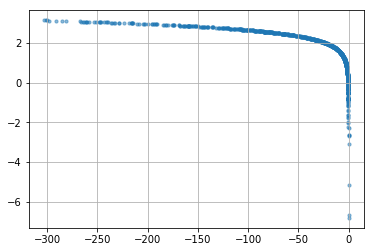

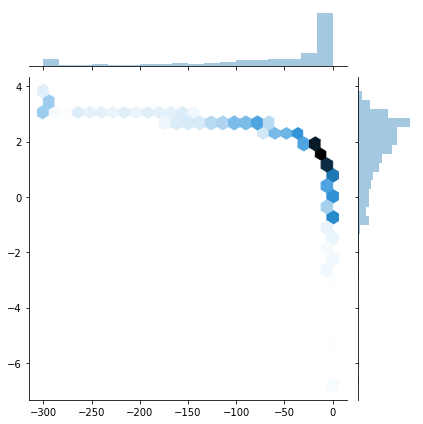

In [21]:
IX = intersect1d(df_stock_train.index , df.index)
y_train = df_stock_train.FUGA_3M
print(len(IX), df_producto.shape, df_stock_train.shape)
from sklearn.feature_selection import  chi2
a, b = chi2(df.loc[IX], y_train.loc[IX])
scatter(log10(b), log10(a), alpha = .5, s = 10), grid()
sns.jointplot(x = log10(b +1e-300), y = log10(a + 1e-300), kind="hex")

COLD = df.columns[b<1e-3]
print(len(COLD))

In [22]:
DF_PRODUCTO_COUNT = df[COLD]
del df 
gc.collect()
DF_PRODUCTO_COUNT.head()

NU_CTA_AHORRO_0  NU_CTA_AHORRO_1  NU_CTA_AHORRO_2  \
ID_CLIENTE                                                      
1                         0               11                0   
2                         0               13                0   
3                         0                8                0   
4                         0                4                0   
5                        13                0                0   

            NU_CTA_AHORRO_3  NU_CTA_AHORRO_4  NU_CTA_AHORRO_5  \
ID_CLIENTE                                                      
1                         0                0                0   
2                         0                0                0   
3                         0                0                0   
4                         0                0                0   
5                         0                0                0   

            NU_CTA_AHORRO_6  NU_CTA_AHORRO_12  RGO_MARGEN_AHORRO_1  \
ID_CLIENTE                                                           
1                         0                 0                    0   
2                         0                 0                    0   
3                         0                 0                    0   
4                         0                 0                    0   
5                         0                 0                    0   

            RGO_MARGEN_AHORRO_2  ...  RGO_ACTIVO_11  RGO_ACTIVO_12  \
ID_CLIENTE                       ...                                 
1                             0  ...              0              0   
2                             0  ...              0              0   
3                             0  ...              0              0   
4                             0  ...              0              0   
5                            13  ...              0              0   

            RGO_ACTIVO_13  RGO_ACTIVO_14  RGO_ACTIVO_15  RGO_ACTIVO_16  \
ID_CLIENTE                                                               
1                       0              0              0             11   
2                       0              0              0              0   
3                       0              2              0              1   
4                       0              1              0              0   
5                       0              0              0              0   

            RGO_ACTIVO_17  RGO_ACTIVO_18  RGO_ACTIVO_19  RGO_ACTIVO_20  
ID_CLIENTE                                                              
1                       0              0              0              0  
2                       0              0              0              0  
3                       0              0              0              0  
4                       0              0              0              0  
5                       0              0              0             13  

[5 rows x 708 columns]

In [23]:
IX = intersect1d(df_stock_train.index , dz.reset_index().ID_CLIENTE )
y_train = df_stock_train.loc[IX].FUGA_3M

dz = mean_dates_3(df_producto)
print(dz.shape, df_producto.shape)

dz.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(99049, 300) (1204825, 62)


NU_CTA_AHORRO_21  RGO_MARGEN_AHORRO_21  NU_CTA_CTE_21  \
ID_CLIENTE                                                          
1                        1.0                   8.0            0.0   
2                        1.0                  11.0            0.0   
3                        1.0                  14.5            0.0   
4                        1.0                  17.5            0.0   
5                        0.0                   2.0            1.0   

            RGO_SDO_CTE_21  RGO_MARGEN_CTE_21  NU_CTA_FMUTUO_21  \
ID_CLIENTE                                                        
1                     12.0               13.0               0.0   
2                      6.0                7.0               0.0   
3                      7.0               10.5               0.0   
4                      4.0                3.0               0.0   
5                     18.5               18.0               1.0   

            RGO_SDO_FMUTUO_21  NU_CTA_PZO_21  RGO_SDO_PZO_21  \
ID_CLIENTE                                                     
1                         8.0            0.0             2.0   
2                        11.0            0.0            15.0   
3                        11.5            0.0             8.0   
4                        18.0            0.0            11.0   
5                        20.0            0.0            13.0   

            RGO_MARGEN_PZO_21  ...  NU_CTA_COBRANZA_LIB_34  \
ID_CLIENTE                     ...                           
1                        11.0  ...                     0.0   
2                         4.0  ...                     0.0   
3                        17.0  ...                     NaN   
4                        17.0  ...                     NaN   
5                         9.0  ...                     0.0   

            RGO_MARGEN_COBRANZA_LIB_34  NU_CTA_COBRANZA_GAR_34  \
ID_CLIENTE                                                       
1                             2.000000                     0.0   
2                            18.000000                     0.0   
3                                  NaN                     NaN   
4                                  NaN                     NaN   
5                            13.333333                     0.0   

            RGO_MARGEN_COBRANZA_GAR_34  NU_CTA_CONFIRMING_34  \
ID_CLIENTE                                                     
1                                 20.0                   0.0   
2                                  4.0                   0.0   
3                                  NaN                   NaN   
4                                  NaN                   NaN   
5                                  6.0                   0.0   

            RGO_MARGEN_CONFIRMING_34  RGO_MARGEN_CARTERA_34  \
ID_CLIENTE                                                    
1                               16.0              13.000000   
2                                4.0              17.000000   
3                                NaN                    NaN   
4                                NaN                    NaN   
5                                1.0              15.666667   

            RGO_MARGEN_STANDBY_34  RGO_PASIVO_34  RGO_ACTIVO_34  
ID_CLIENTE                                                       
1                             4.0      10.000000           16.0  
2                            12.0       7.000000            4.0  
3                             NaN            NaN            NaN  
4                             NaN            NaN            NaN  
5                             5.0      16.333333           20.0  

[5 rows x 300 columns]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


226 (99049, 300)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


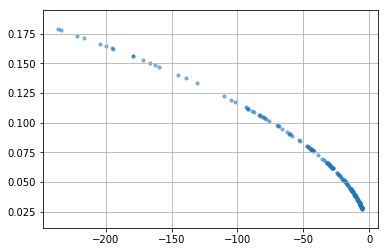

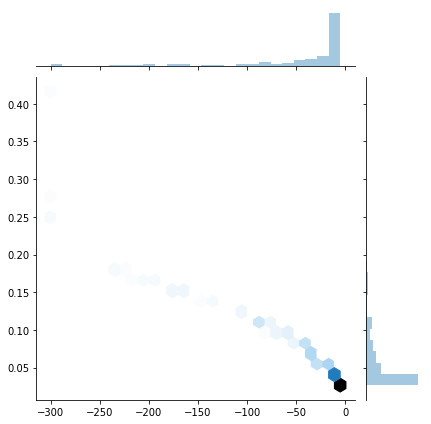

In [24]:
names, PV, ST = KVS_TEST(dz.loc[IX], y_train.loc[IX], pv0 = 1e-5)
print(len(names), dz.shape)
scatter(log10(array(PV)) , ( array(ST)) , alpha = .5, s = 10), grid()
sns.jointplot(x = log10( array(PV)+1e-300), y = ( array(ST)   ), kind="hex")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


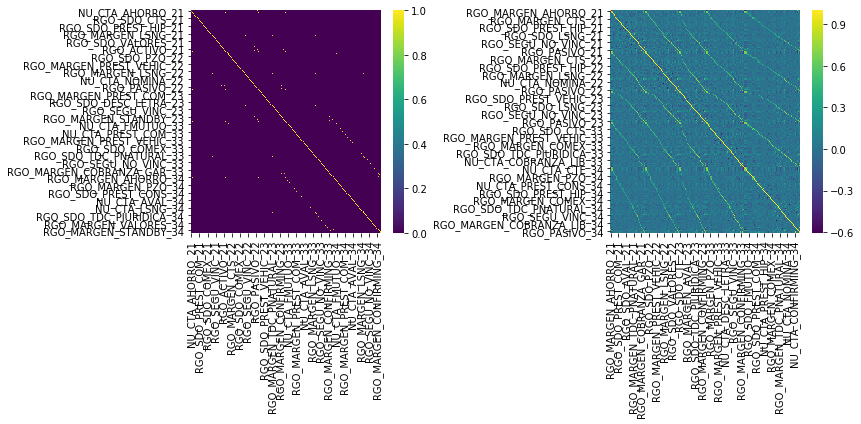

198


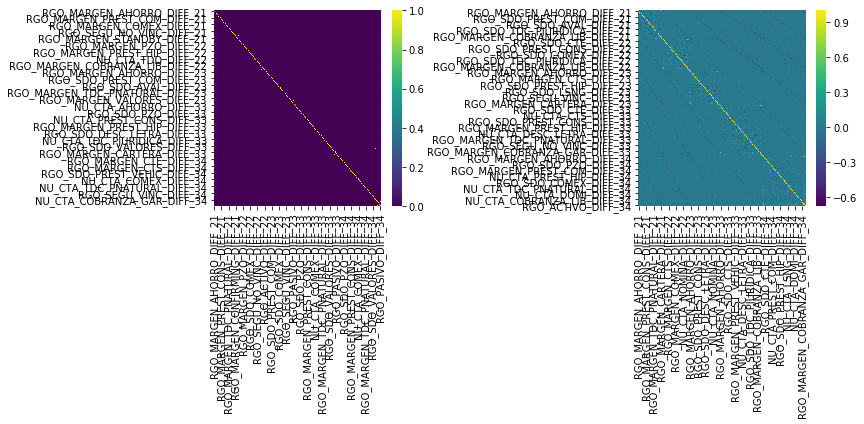

225


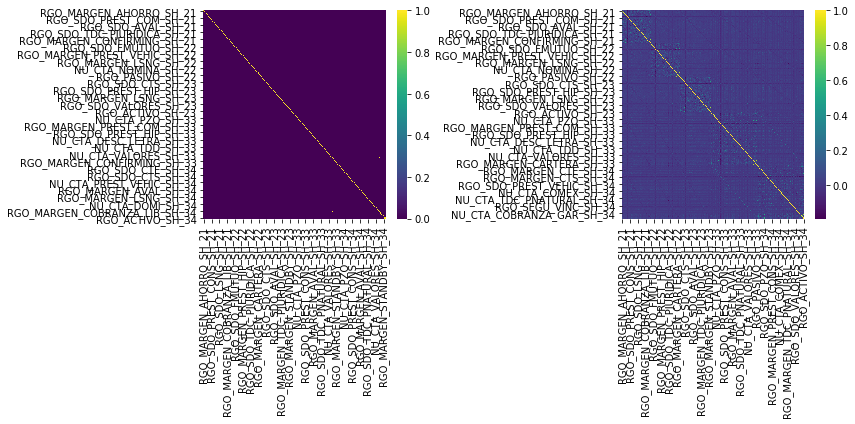

231


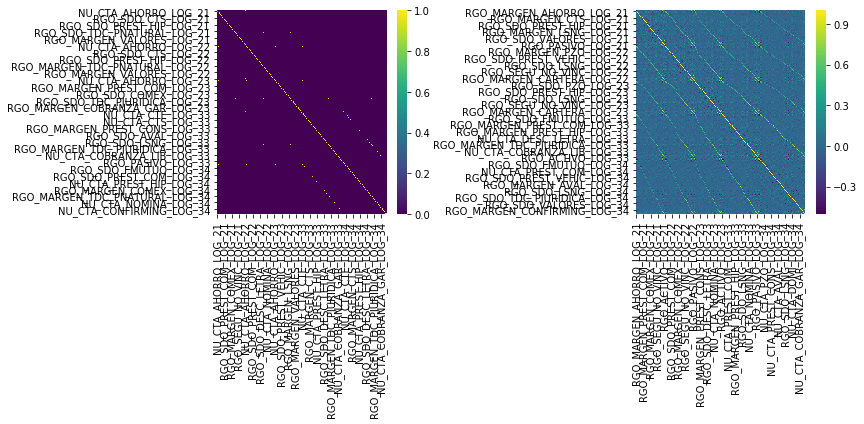

215


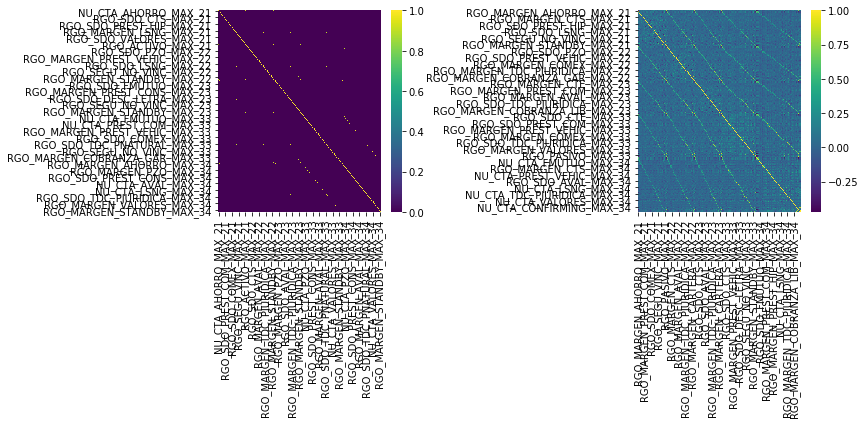

216


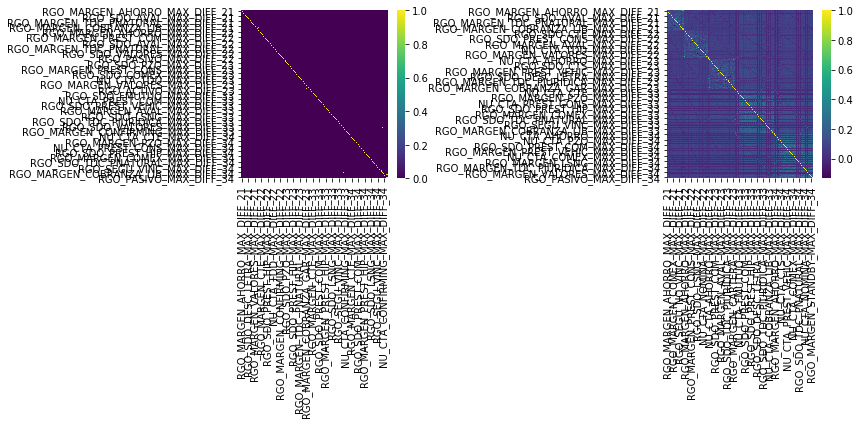

219


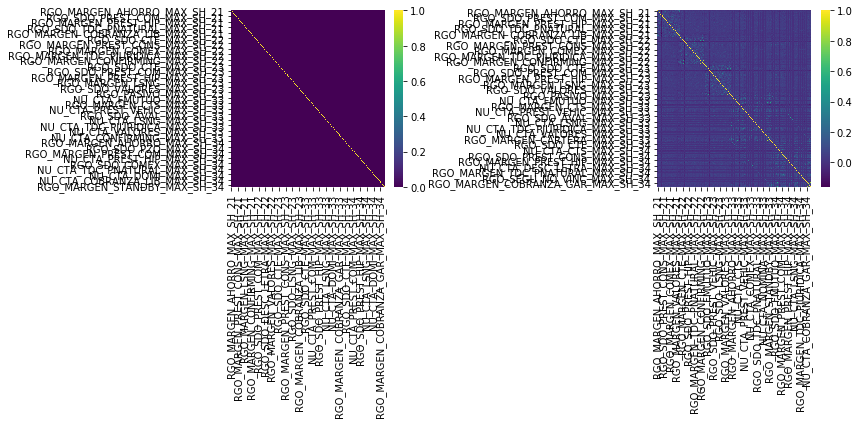

223


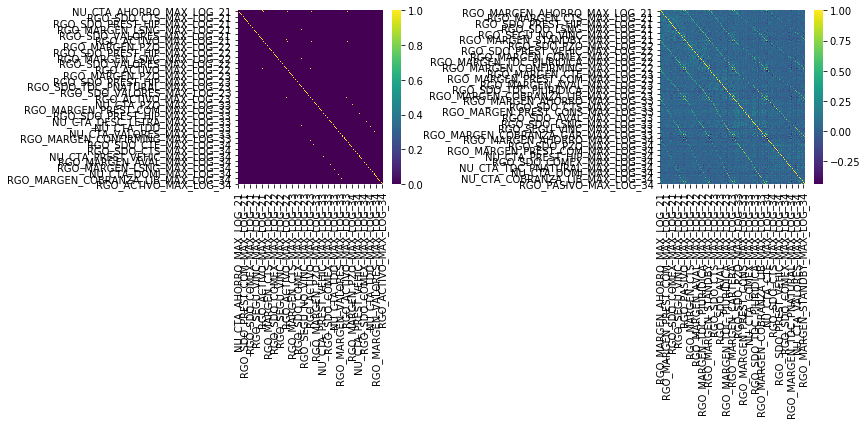

219
CPU times: user 5min 9s, sys: 5.31 s, total: 5min 14s
Wall time: 5min 14s


In [25]:
%%time
dfA = mean_test_3(df_producto, IX, y_train, namecol = '_', pv0 = 1e-3 )
dfD = mean_test_3(dff1.reset_index().set_index('ID_CLIENTE'), IX, y_train, namecol = '_DIFF_', pv0 = 1e-3)
dfSH = mean_test_3(dff_sh.reset_index().set_index('ID_CLIENTE'), IX, y_train, namecol = '_SH_', pv0 = 1e-3 )
dfLOG = mean_test_3( dflog.reset_index().set_index('ID_CLIENTE') , IX, y_train, namecol = '_LOG_', pv0 = 1e-3 )


dfA_MX = mean_test_3_max(df_producto, IX, y_train, namecol = '_MAX_', pv0 = 1e-3 )
dfD_MX = mean_test_3_max(dff1.reset_index().set_index('ID_CLIENTE'), IX, y_train, namecol = '_MAX_DIFF_', pv0 = 1e-3)
dfSH_MX = mean_test_3_max(dff_sh.reset_index().set_index('ID_CLIENTE'), IX, y_train, namecol = '_MAX_SH_', pv0 = 1e-3 )
dfLOG_MX= mean_test_3_max( dflog.reset_index().set_index('ID_CLIENTE') , IX, y_train, namecol = '_MAX_LOG_', pv0 = 1e-3 )



del  dff1, dff_sh, dflog, dz


In [26]:
DF_PRODUCTO_MX = pd.concat([dfA_MX, dfD_MX, dfSH_MX, dfLOG_MX], axis = 1)
del dfA_MX, dfD_MX, dfSH_MX, dfLOG_MX
DF_PRODUCTO_MX.head()

RGO_MARGEN_AHORRO_MAX_21  RGO_SDO_CTE_MAX_21  \
ID_CLIENTE                                                 
1                                8.0                12.0   
2                               11.0                 6.0   
3                               16.0                13.0   
4                               18.0                 4.0   
5                                2.0                19.0   

            RGO_MARGEN_CTE_MAX_21  RGO_SDO_FMUTUO_MAX_21  RGO_SDO_PZO_MAX_21  \
ID_CLIENTE                                                                     
1                            13.0                    8.0                 2.0   
2                             7.0                   11.0                15.0   
3                            11.0                   18.0                11.0   
4                             3.0                   18.0                11.0   
5                            19.0                   20.0                13.0   

            RGO_MARGEN_PZO_MAX_21  RGO_SDO_CTS_MAX_21  RGO_MARGEN_CTS_MAX_21  \
ID_CLIENTE                                                                     
1                            11.0                19.0                   19.0   
2                             4.0                17.0                    5.0   
3                            20.0                16.0                   17.0   
4                            17.0                 3.0                   14.0   
5                             9.0                14.0                   16.0   

            RGO_SDO_PREST_COM_MAX_21  RGO_MARGEN_PREST_COM_MAX_21  ...  \
ID_CLIENTE                                                         ...   
1                               18.0                          2.0  ...   
2                               11.0                         19.0  ...   
3                               10.0                          7.0  ...   
4                                8.0                         19.0  ...   
5                               20.0                         20.0  ...   

            RGO_MARGEN_VALORES_MAX_LOG_34  NU_CTA_COBRANZA_LIB_MAX_LOG_34  \
ID_CLIENTE                                                                  
1                                2.302734                             1.0   
2                                2.484375                             1.0   
3                                     NaN                             NaN   
4                                     NaN                             NaN   
5                                2.708984                             1.0   

            RGO_MARGEN_COBRANZA_LIB_MAX_LOG_34  \
ID_CLIENTE                                       
1                                     0.693359   
2                                     2.890625   
3                                          NaN   
4                                          NaN   
5                                     2.890625   

            NU_CTA_COBRANZA_GAR_MAX_LOG_34  \
ID_CLIENTE                                   
1                                      1.0   
2                                      1.0   
3                                      NaN   
4                                      NaN   
5                                      1.0   

            RGO_MARGEN_COBRANZA_GAR_MAX_LOG_34  \
ID_CLIENTE                                       
1                                     2.996094   
2                                     1.386719   
3                                          NaN   
4                                          NaN   
5                                     1.791992   

            RGO_MARGEN_CONFIRMING_MAX_LOG_34  RGO_MARGEN_CARTERA_MAX_LOG_34  \
ID_CLIENTE                                                                    
1                                   2.773438                       2.564453   
2                                   1.386719                       2.833984   
3                                        NaN                         

In [27]:
DF = pd.concat([dfA, dfD, dfSH, dfLOG], axis = 1)
del dfA, dfD, dfSH, dfLOG
DF.head()

RGO_MARGEN_AHORRO_21  RGO_SDO_CTE_21  RGO_MARGEN_CTE_21  \
ID_CLIENTE                                                            
1                            8.0            12.0               13.0   
2                           11.0             6.0                7.0   
3                           14.5             7.0               10.5   
4                           17.5             4.0                3.0   
5                            2.0            18.5               18.0   

            RGO_SDO_FMUTUO_21  RGO_SDO_PZO_21  RGO_MARGEN_PZO_21  \
ID_CLIENTE                                                         
1                         8.0             2.0               11.0   
2                        11.0            15.0                4.0   
3                        11.5             8.0               17.0   
4                        18.0            11.0               17.0   
5                        20.0            13.0                9.0   

            RGO_SDO_CTS_21  RGO_MARGEN_CTS_21  RGO_SDO_PREST_COM_21  \
ID_CLIENTE                                                            
1                     19.0               19.0                  18.0   
2                     17.0                5.0                  11.0   
3                      9.0                9.5                   9.0   
4                      3.0               13.5                   8.0   
5                     14.0               16.0                  20.0   

            RGO_MARGEN_PREST_COM_21  ...  NU_CTA_COBRANZA_LIB_LOG_34  \
ID_CLIENTE                           ...                               
1                               2.0  ...                         1.0   
2                              19.0  ...                         1.0   
3                               6.5  ...                         NaN   
4                              19.0  ...                         NaN   
5                              20.0  ...                         1.0   

            RGO_MARGEN_COBRANZA_LIB_LOG_34  NU_CTA_COBRANZA_GAR_LOG_34  \
ID_CLIENTE                                                               
1                                 0.693359                         1.0   
2                                 2.890625                         1.0   
3                                      NaN                         NaN   
4                                      NaN                         NaN   
5                                 2.388672                         1.0   

            RGO_MARGEN_COBRANZA_GAR_LOG_34  NU_CTA_CONFIRMING_LOG_34  \
ID_CLIENTE                                                             
1                                 2.996094                       1.0   
2                                 1.386719                       1.0   
3                                      NaN                       NaN   
4                                      NaN                       NaN   
5                                 1.791992                       1.0   

            RGO_MARGEN_CONFIRMING_LOG_34  RGO_MARGEN_CARTERA_LOG_34  \
ID_CLIENTE                                                            
1                               2.773438                   2.564453   
2                               1.386719                   2.833984   
3                                    NaN                        NaN   
4                                    NaN                        NaN   
5                               0.000000                   2.646484   

            RGO_MARGEN_STANDBY_LOG_34  RGO_PASIVO_LOG_34  RGO_ACTIVO_LOG_34  
ID_CLIENTE                                                                   
1                            1.386719           2.302734           2.773438  
2                            2.484375           1.946289           1.386719  
3                                 NaN                NaN                NaN  
4                                 NaN                NaN                NaN  
5                            1.297852       

In [28]:
df = df_producto.reset_index().set_index(['ID_CLIENTE','MES', 'MES_T0'])

dfSTD =  df.groupby('ID_CLIENTE').std()
dfK = df.groupby(['ID_CLIENTE']).apply( pd.DataFrame.kurt )
dfSK = df.groupby(['ID_CLIENTE']).apply( pd.DataFrame.skew )

print(dfSTD.shape, dfK.shape, dfSK.shape)



(99063, 60) (99063, 60) (99063, 60)


In [29]:
gc.collect()
names, pv, st = KVS_TEST(dfSTD.loc[IX], y_train,  pv0 = 1e-3 )
dfSTD = dfSTD[names]
print(len(names))

names, pv, st = KVS_TEST(dfK.loc[IX], y_train,  pv0 = 1e-3 )
dfK = dfK[names] 
print(len(names))

names, pv, st = KVS_TEST(dfSK.loc[IX], y_train,  pv0 = 1e-3 )
dfSK = dfSK[names]
print(len(names))

42
41
41


In [30]:
cc = [ c + '_STD' for c in dfSTD.columns]
dfSTD.columns = cc

cc = [ c + '_KURT' for c in dfK.columns]
dfK.columns = cc

cc = [ c + '_SKEW' for c in dfSK.columns]
dfSK.columns = cc

dfST = pd.concat([dfSTD, dfK, dfSK], axis = 1)
del dfSTD, dfK, dfSK

dfST.head()

NU_CTA_AHORRO_STD  RGO_MARGEN_AHORRO_STD  RGO_SDO_CTE_STD  \
ID_CLIENTE                                                              
1                         0.0               2.412091         0.000000   
2                         0.0               2.025479         2.385856   
3                         0.0               1.851640         5.012484   
4                         0.0               5.965177         2.828427   
5                         0.0               0.000000         0.688737   

            RGO_MARGEN_CTE_STD  RGO_SDO_FMUTUO_STD  RGO_SDO_PZO_STD  \
ID_CLIENTE                                                            
1                     0.000000            0.000000         0.000000   
2                     2.106157            3.094660         6.551571   
3                     3.248626            5.730557         6.093029   
4                     4.716991            3.000000         5.377422   
5                     0.751068            0.000000         0.000000   

            RGO_MARGEN_PZO_STD  NU_CTA_CTS_STD  RGO_SDO_CTS_STD  \
ID_CLIENTE                                                        
1                     0.000000             0.0         0.000000   
2                     5.837544             0.0         6.237809   
3                     8.241879             0.0         5.418223   
4                     3.464102             0.0         4.358899   
5                     0.000000             0.0         0.000000   

            RGO_MARGEN_CTS_STD  ...  NU_CTA_NOMINA_SKEW  RGO_SDO_VALORES_SKEW  \
ID_CLIENTE                      ...                                             
1                     0.000000  ...                 0.0              0.000000   
2                     4.603510  ...                 0.0             -1.760248   
3                     6.926914  ...                 0.0              0.648374   
4                     5.909033  ...                 0.0              1.007682   
5                     0.000000  ...                 0.0              1.882060   

            RGO_MARGEN_VALORES_SKEW  RGO_MARGEN_COBRANZA_LIB_SKEW  \
ID_CLIENTE                                                          
1                          0.000000                      0.000000   
2                          3.605551                     -1.671343   
3                          0.048221                     -1.018096   
4                          1.779179                      1.468391   
5                          0.000000                     -0.445089   

            RGO_MARGEN_COBRANZA_GAR_SKEW  RGO_MARGEN_CONFIRMING_SKEW  \
ID_CLIENTE                                                             
1                              -3.316625                    0.000000   
2                               3.128150                   -0.246607   
3                              -0.610964                    0.432043   
4                              -1.039695                    1.779179   
5                               0.000000                    0.000000   

            RGO_MARGEN_CARTERA_SKEW  RGO_MARGEN_STANDBY_SKEW  RGO_PASIVO_SKEW  \
ID_CLIENTE                                                                      
1                          0.000000                 0.000000         0.000000   
2                         -0.875713                 2.178717         2.178717   
3                         -0.676243                -0.898676        -0.040409   
4                         -1.414214                -1.658524        -1.494105   
5                         -0.946212                -0.848679        -0.018540   

            RGO_ACTIVO_SKEW  
ID_CLIENTE                   
1                  0.000000  
2                 -0.383807  
3                  0.414976  
4                  1.846278  
5                  0.000000  

[5 rows x 124 columns]

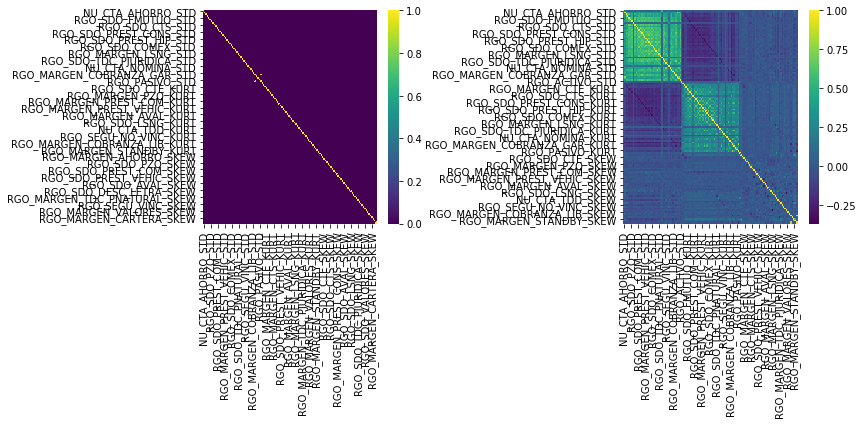

123


In [31]:
names = find_corr(dfST, cc= .9)
print(len(names))
dfST  = dfST[names]

In [32]:
DF_PRODUCTO = pd.concat([DF,DF_PRODUCTO_MX, dfST, DF_PRODUCTO_COUNT], axis = 1)
del dfST, df, df_producto, DF, DF_PRODUCTO_MX, DF_PRODUCTO_COUNT
DF_PRODUCTO.head()

RGO_MARGEN_AHORRO_21  RGO_SDO_CTE_21  RGO_MARGEN_CTE_21  \
ID_CLIENTE                                                            
1                            8.0            12.0               13.0   
2                           11.0             6.0                7.0   
3                           14.5             7.0               10.5   
4                           17.5             4.0                3.0   
5                            2.0            18.5               18.0   

            RGO_SDO_FMUTUO_21  RGO_SDO_PZO_21  RGO_MARGEN_PZO_21  \
ID_CLIENTE                                                         
1                         8.0             2.0               11.0   
2                        11.0            15.0                4.0   
3                        11.5             8.0               17.0   
4                        18.0            11.0               17.0   
5                        20.0            13.0                9.0   

            RGO_SDO_CTS_21  RGO_MARGEN_CTS_21  RGO_SDO_PREST_COM_21  \
ID_CLIENTE                                                            
1                     19.0               19.0                  18.0   
2                     17.0                5.0                  11.0   
3                      9.0                9.5                   9.0   
4                      3.0               13.5                   8.0   
5                     14.0               16.0                  20.0   

            RGO_MARGEN_PREST_COM_21  ...  RGO_ACTIVO_11  RGO_ACTIVO_12  \
ID_CLIENTE                           ...                                 
1                               2.0  ...              0              0   
2                              19.0  ...              0              0   
3                               6.5  ...              0              0   
4                              19.0  ...              0              0   
5                              20.0  ...              0              0   

            RGO_ACTIVO_13  RGO_ACTIVO_14  RGO_ACTIVO_15  RGO_ACTIVO_16  \
ID_CLIENTE                                                               
1                       0              0              0             11   
2                       0              0              0              0   
3                       0              2              0              1   
4                       0              1              0              0   
5                       0              0              0              0   

            RGO_ACTIVO_17  RGO_ACTIVO_18  RGO_ACTIVO_19  RGO_ACTIVO_20  
ID_CLIENTE                                                              
1                       0              0              0              0  
2                       0              0              0              0  
3                       0              0              0              0  
4                       0              0              0              0  
5                       0              0              0             13  

[5 rows x 2577 columns]

In [33]:
# THE BEST 600 FEATURES
COLF = ['RGO_PASIVO_MAX_21', 'RGO_SDO_VALORES_STD', 'RGO_ACTIVO_MAX_21', 'RGO_PASIVO_MAX_23', 'RGO_PASIVO_LOG_21', 'RGO_ACTIVO_LOG_22', 'RGO_PASIVO_LOG_23', 'NU_CTA_TDD_1', 'RGO_SEGU_NO_VINC_STD', 'NU_CTA_TDD_0', 'RGO_MARGEN_TDC_PNATURAL_10', 'RGO_SDO_PREST_HIP_11', 'RGO_ACTIVO_22', 'RGO_MARGEN_COBRANZA_LIB_MAX_21', 'RGO_ACTIVO_MAX_22', 'RGO_SDO_TDC_PNATURAL_20', 'RGO_MARGEN_CONFIRMING_MAX_21', 'RGO_MARGEN_STANDBY_MAX_21', 'RGO_SEGU_NO_VINC_LOG_33', 'NU_CTA_NOMINA_1', 'RGO_MARGEN_TDC_PNATURAL_19', 'RGO_SEGU_NO_VINC_21', 'NU_CTA_CTS_1', 'NU_CTA_NOMINA_STD', 'RGO_ACTIVO_LOG_21', 'NU_CTA_TDC_PNATURAL_1', 'NU_CTA_NOMINA_0', 'NU_CTA_NOMINA_23', 'RGO_SEGU_VINC_STD', 'RGO_SEGU_NO_VINC_MAX_21', 'RGO_SDO_TDC_PNATURAL_11', 'NU_CTA_NOMINA_SH_22', 'RGO_SDO_TDC_PJURIDICA_9', 'RGO_SEGU_VINC_LOG_21', 'RGO_SEGU_VINC_MAX_21', 'RGO_SEGU_NO_VINC_MAX_33', 'RGO_MARGEN_CTE_33', 'RGO_PASIVO_21', 'RGO_PASIVO_MAX_22', 'NU_CTA_TDC_PNATURAL_0', 'RGO_MARGEN_CONFIRMING_LOG_22', 'RGO_SDO_PREST_COM_MAX_SH_21', 'RGO_SDO_VALORES_6', 'RGO_MARGEN_TDC_PNATURAL_20', 'RGO_MARGEN_PREST_CONS_MAX_SH_34', 'NU_CTA_VALORES_0', 'RGO_PASIVO_23', 'RGO_SDO_VALORES_13', 'RGO_SDO_FMUTUO_MAX_SH_21', 'RGO_MARGEN_PREST_COM_3', 'RGO_PASIVO_LOG_22', 'RGO_MARGEN_AVAL_8', 'RGO_MARGEN_AVAL_11', 'RGO_MARGEN_COBRANZA_LIB_21', 'NU_CTA_TDD_STD', 'NU_CTA_PREST_HIP_0', 'NU_CTA_CTE_0', 'RGO_ACTIVO_STD', 'RGO_SDO_DESC_LETRA_MAX_22', 'RGO_PASIVO_20', 'RGO_SDO_TDC_PJURIDICA_4', 'RGO_MARGEN_TDC_PNATURAL_LOG_22', 'RGO_MARGEN_CTE_13', 'RGO_MARGEN_AHORRO_20', 'RGO_MARGEN_AHORRO_MAX_33', 'RGO_SDO_COMEX_6', 'RGO_SEGU_NO_VINC_LOG_22', 'RGO_MARGEN_AHORRO_9', 'RGO_SDO_CTE_LOG_22', 'RGO_PASIVO_22', 'RGO_MARGEN_CTE_LOG_21', 'RGO_PASIVO_19', 'RGO_MARGEN_CTE_17', 'RGO_SEGU_NO_VINC_12', 'RGO_MARGEN_STANDBY_8', 'RGO_PASIVO_6', 'RGO_SDO_TDC_PNATURAL_MAX_21', 'RGO_SEGU_NO_VINC_16', 'RGO_SEGU_NO_VINC_LOG_21', 'RGO_MARGEN_PREST_CONS_20', 'RGO_MARGEN_COBRANZA_LIB_15', 'RGO_SEGU_NO_VINC_MAX_SH_33', 'RGO_ACTIVO_20', 'RGO_MARGEN_LSNG_1', 'RGO_SDO_LSNG_MAX_21', 'NU_CTA_CTS_0', 'RGO_MARGEN_TDC_PNATURAL_MAX_33', 'RGO_SDO_TDC_PNATURAL_21', 'RGO_SDO_PREST_COM_8', 'RGO_SEGU_VINC_17', 'RGO_MARGEN_COBRANZA_LIB_11', 'RGO_MARGEN_CTE_MAX_22', 'RGO_SDO_CTS_1', 'RGO_SDO_LSNG_7', 'RGO_MARGEN_PREST_CONS_6', 'RGO_PASIVO_MAX_DIFF_22', 'RGO_MARGEN_VALORES_1', 'RGO_SEGU_NO_VINC_10', 'RGO_MARGEN_AVAL_MAX_SH_22', 'RGO_SEGU_NO_VINC_13', 'RGO_MARGEN_CTS_18', 'RGO_SDO_COMEX_20', 'RGO_MARGEN_PREST_COM_20', 'NU_CTA_NOMINA_LOG_22', 'RGO_SDO_PREST_VEHIC_MAX_SH_22', 'RGO_MARGEN_COMEX_MAX_21', 'RGO_MARGEN_AVAL_MAX_33', 'RGO_MARGEN_AHORRO_MAX_21', 'RGO_ACTIVO_MAX_33', 'RGO_SDO_TDC_PJURIDICA_MAX_DIFF_21', 'NU_CTA_NOMINA_SKEW', 'RGO_MARGEN_COMEX_1', 'RGO_SEGU_NO_VINC_9', 'RGO_MARGEN_COBRANZA_LIB_DIFF_33', 'NU_CTA_NOMINA_SH_33', 'RGO_MARGEN_COMEX_20', 'RGO_MARGEN_CTE_MAX_33', 'NU_CTA_NOMINA_34', 'RGO_MARGEN_CTS_17', 'RGO_MARGEN_CARTERA_6', 'RGO_SEGU_VINC_1', 'RGO_MARGEN_STANDBY_14', 'RGO_SDO_CTS_LOG_33', 'RGO_SDO_VALORES_LOG_21', 'RGO_MARGEN_STANDBY_LOG_33', 'RGO_MARGEN_STANDBY_6', 'RGO_MARGEN_COBRANZA_LIB_STD', 'RGO_PASIVO_SH_33', 'RGO_SDO_AVAL_MAX_21', 'RGO_MARGEN_TDC_PNATURAL_16', 'RGO_SDO_PREST_CONS_MAX_33', 'RGO_SDO_LSNG_MAX_33', 'RGO_MARGEN_TDC_PJURIDICA_4', 'RGO_ACTIVO_MAX_34', 'RGO_SEGU_VINC_34', 'RGO_MARGEN_STANDBY_12', 'RGO_MARGEN_AVAL_MAX_SH_21', 'RGO_MARGEN_COBRANZA_LIB_SH_33', 'RGO_MARGEN_VALORES_MAX_SH_23', 'RGO_MARGEN_PREST_HIP_13', 'RGO_SDO_CTE_MAX_23', 'RGO_SDO_AVAL_MAX_DIFF_21', 'RGO_SDO_LSNG_SH_21', 'RGO_SDO_CTE_MAX_SH_33', 'RGO_MARGEN_TDC_PNATURAL_MAX_SH_34', 'RGO_MARGEN_AHORRO_MAX_SH_34', 'RGO_MARGEN_COBRANZA_GAR_17', 'RGO_SDO_COMEX_14', 'RGO_MARGEN_PREST_CONS_9', 'RGO_SDO_TDC_PNATURAL_LOG_33', 'RGO_MARGEN_CTS_7', 'NU_CTA_NOMINA_LOG_33', 'RGO_SEGU_NO_VINC_MAX_34', 'RGO_PASIVO_7', 'NU_CTA_PREST_CONS_1', 'RGO_SEGU_NO_VINC_2', 'RGO_MARGEN_CONFIRMING_7', 'NU_CTA_TDC_PNATURAL_MAX_LOG_34', 'RGO_SEGU_VINC_3', 'RGO_MARGEN_PREST_CONS_2', 'RGO_SDO_PREST_CONS_6', 'RGO_MARGEN_PZO_13', 'RGO_SDO_PREST_CONS_MAX_SH_33', 'RGO_SEGU_NO_VINC_MAX_SH_34', 'RGO_MARGEN_COBRANZA_LIB_LOG_23', 'NU_CTA_NOMINA_DIFF_22', 'RGO_MARGEN_CTS_LOG_21', 'RGO_ACTIVO_MAX_SH_34', 'RGO_MARGEN_COBRANZA_GAR_MAX_DIFF_34', 'RGO_SDO_PREST_CONS_MAX_SH_21', 'RGO_SEGU_NO_VINC_MAX_DIFF_22', 'NU_CTA_PZO_0', 'RGO_MARGEN_AHORRO_MAX_SH_21', 'RGO_SDO_TDC_PJURIDICA_MAX_DIFF_33', 'NU_CTA_DOMI_0', 'RGO_MARGEN_TDC_PNATURAL_14', 'RGO_MARGEN_STANDBY_LOG_22', 'NU_CTA_AHORRO_MAX_SH_33', 'RGO_MARGEN_CONFIRMING_MAX_22', 'RGO_MARGEN_PREST_COM_MAX_SH_22', 'RGO_SDO_PREST_COM_22', 'RGO_SDO_LSNG_MAX_DIFF_21', 'RGO_SEGU_NO_VINC_MAX_SH_22', 'RGO_MARGEN_CONFIRMING_MAX_23', 'RGO_SDO_FMUTUO_MAX_22', 'RGO_SDO_COMEX_MAX_SH_23', 'RGO_MARGEN_CONFIRMING_LOG_23', 'RGO_SEGU_VINC_MAX_SH_33', 'RGO_MARGEN_CTE_MAX_LOG_21', 'RGO_MARGEN_COMEX_18', 'RGO_MARGEN_STANDBY_LOG_23', 'RGO_MARGEN_CONFIRMING_LOG_21', 'RGO_MARGEN_PREST_COM_9', 'RGO_MARGEN_LSNG_MAX_21', 'RGO_SDO_LSNG_22', 'RGO_MARGEN_COBRANZA_LIB_17', 'RGO_MARGEN_TDC_PNATURAL_LOG_23', 'RGO_MARGEN_CTE_DIFF_22', 'RGO_MARGEN_CARTERA_MAX_22', 'RGO_MARGEN_AVAL_7', 'RGO_SDO_PREST_CONS_MAX_SH_23', 'RGO_MARGEN_STANDBY_10', 'RGO_MARGEN_CTE_MAX_SH_22', 'RGO_MARGEN_STANDBY_SH_23', 'RGO_MARGEN_VALORES_MAX_22', 'RGO_ACTIVO_14', 'RGO_SDO_FMUTUO_LOG_33', 'RGO_SDO_AVAL_MAX_SH_34', 'RGO_MARGEN_LSNG_12', 'RGO_SDO_TDC_PNATURAL_MAX_33', 'RGO_MARGEN_AHORRO_DIFF_33', 'RGO_MARGEN_PREST_HIP_MAX_33', 'RGO_MARGEN_STANDBY_LOG_21', 'RGO_SEGU_NO_VINC_MAX_23', 'RGO_SEGU_NO_VINC_MAX_22', 'RGO_SDO_TDC_PNATURAL_LOG_22', 'RGO_MARGEN_LSNG_MAX_34', 'RGO_ACTIVO_MAX_SH_22', 'RGO_ACTIVO_33', 'RGO_MARGEN_TDC_PJURIDICA_20', 'RGO_MARGEN_STANDBY_MAX_LOG_22', 'RGO_MARGEN_CTE_LOG_33', 'RGO_MARGEN_AHORRO_LOG_21', 'RGO_MARGEN_CTE_21', 'RGO_MARGEN_AVAL_MAX_DIFF_33', 'RGO_SDO_PREST_VEHIC_STD', 'RGO_SDO_PREST_VEHIC_MAX_DIFF_21', 'RGO_MARGEN_VALORES_3', 'RGO_SDO_LSNG_MAX_22', 'NU_CTA_NOMINA_KURT', 'RGO_MARGEN_COMEX_MAX_33', 'RGO_SEGU_VINC_MAX_SH_34', 'RGO_SDO_TDC_PNATURAL_6', 'RGO_MARGEN_TDC_PJURIDICA_MAX_DIFF_22', 'RGO_MARGEN_LSNG_11', 'RGO_SEGU_VINC_LOG_33', 'RGO_MARGEN_PREST_CONS_MAX_21', 'RGO_SDO_LSNG_LOG_21', 'RGO_MARGEN_CTE_LOG_22', 'RGO_SDO_PREST_VEHIC_14', 'RGO_MARGEN_VALORES_9', 'RGO_SEGU_VINC_MAX_22', 'RGO_MARGEN_COBRANZA_GAR_SH_23', 'NU_CTA_TDD_SKEW', 'NU_CTA_TDD_KURT', 'RGO_SDO_PZO_7', 'RGO_MARGEN_CONFIRMING_LOG_33', 'RGO_MARGEN_COBRANZA_LIB_MAX_SH_22', 'RGO_SDO_DESC_LETRA_MAX_SH_23', 'RGO_MARGEN_VALORES_MAX_SH_34', 'NU_CTA_NOMINA_DIFF_21', 'RGO_SDO_COMEX_SH_22', 'RGO_SDO_PREST_HIP_14', 'RGO_SDO_PREST_COM_MAX_21', 'RGO_SDO_AVAL_15', 'RGO_PASIVO_STD', 'RGO_MARGEN_LSNG_LOG_33', 'RGO_SDO_FMUTUO_MAX_33', 'RGO_MARGEN_LSNG_MAX_SH_21', 'RGO_SDO_TDC_PNATURAL_MAX_SH_33', 'RGO_MARGEN_PREST_VEHIC_MAX_22', 'RGO_SDO_VALORES_19', 'RGO_MARGEN_AVAL_SH_34', 'RGO_SDO_PREST_VEHIC_MAX_SH_21', 'RGO_SDO_PREST_COM_20', 'RGO_SDO_LSNG_21', 'RGO_SEGU_VINC_DIFF_34', 'RGO_MARGEN_TDC_PNATURAL_7', 'RGO_SDO_PREST_VEHIC_LOG_33', 'RGO_SDO_PREST_HIP_SH_34', 'RGO_SDO_FMUTUO_MAX_SH_34', 'RGO_PASIVO_LOG_33', 'RGO_MARGEN_LSNG_MAX_33', 'RGO_ACTIVO_MAX_SH_23', 'RGO_SDO_PREST_CONS_MAX_SH_34', 'RGO_MARGEN_LSNG_MAX_SH_34', 'RGO_SDO_LSNG_MAX_SH_22', 'RGO_MARGEN_PREST_HIP_MAX_SH_34', 'RGO_SDO_VALORES_MAX_22', 'RGO_SDO_DESC_LETRA_13', 'RGO_MARGEN_AHORRO_16', 'RGO_MARGEN_TDC_PNATURAL_LOG_33', 'RGO_SDO_CTE_KURT', 'RGO_MARGEN_CONFIRMING_12', 'RGO_SDO_VALORES_LOG_22', 'RGO_SDO_PREST_HIP_MAX_SH_34', 'RGO_SDO_TDC_PJURIDICA_MAX_SH_21', 'RGO_SDO_TDC_PJURIDICA_MAX_SH_23', 'RGO_MARGEN_AHORRO_MAX_SH_22', 'RGO_MARGEN_CONFIRMING_18', 'RGO_MARGEN_AVAL_MAX_23', 'RGO_ACTIVO_MAX_SH_33', 'RGO_MARGEN_PREST_HIP_MAX_SH_23', 'RGO_MARGEN_CARTERA_LOG_21', 'RGO_MARGEN_PREST_HIP_SH_34', 'RGO_MARGEN_COBRANZA_GAR_20', 'RGO_MARGEN_AVAL_MAX_SH_34', 'RGO_SDO_VALORES_MAX_SH_34', 'RGO_MARGEN_COBRANZA_LIB_LOG_33', 'RGO_MARGEN_COBRANZA_GAR_LOG_33', 'RGO_MARGEN_CTE_MAX_SH_23', 'RGO_SDO_TDC_PJURIDICA_MAX_DIFF_23', 'RGO_MARGEN_PREST_CONS_SH_21', 'RGO_SDO_DESC_LETRA_DIFF_23', 'RGO_MARGEN_CONFIRMING_2', 'RGO_SEGU_VINC_MAX_DIFF_34', 'RGO_SDO_VALORES_LOG_33', 'RGO_SDO_FMUTUO_DIFF_34', 'RGO_SDO_CTE_3', 'RGO_MARGEN_PREST_HIP_DIFF_23', 'RGO_MARGEN_COBRANZA_LIB_LOG_21', 'NU_CTA_TDD_SH_34', 'RGO_SDO_COMEX_10', 'RGO_SDO_CTS_SH_34', 'RGO_MARGEN_CTS_5', 'RGO_MARGEN_TDC_PNATURAL_MAX_21', 'RGO_SEGU_VINC_6', 'RGO_SDO_LSNG_MAX_DIFF_33', 'RGO_MARGEN_PZO_MAX_SH_33', 'RGO_MARGEN_AVAL_SH_22', 'RGO_MARGEN_CONFIRMING_LOG_34', 'RGO_MARGEN_COBRANZA_LIB_3', 'RGO_MARGEN_CARTERA_SH_21', 'RGO_SDO_COMEX_MAX_SH_22', 'RGO_PASIVO_MAX_SH_33', 'RGO_SDO_TDC_PNATURAL_DIFF_21', 'RGO_SDO_CTE_MAX_SH_23', 'RGO_MARGEN_COBRANZA_LIB_MAX_SH_23', 'RGO_SDO_AVAL_MAX_34', 'RGO_SDO_LSNG_MAX_SH_21', 'RGO_SDO_TDC_PNATURAL_MAX_SH_23', 'RGO_MARGEN_COMEX_13', 'RGO_SDO_COMEX_4', 'RGO_SDO_TDC_PNATURAL_SH_33', 'RGO_MARGEN_COMEX_LOG_33', 'RGO_SEGU_NO_VINC_SH_21', 'RGO_MARGEN_COBRANZA_LIB_MAX_SH_34', 'RGO_SDO_PREST_COM_MAX_SH_22', 'RGO_MARGEN_LSNG_MAX_DIFF_33', 'RGO_SDO_AVAL_MAX_SH_23', 'RGO_MARGEN_COMEX_9', 'RGO_MARGEN_TDC_PJURIDICA_MAX_33', 'RGO_SDO_CTE_MAX_DIFF_21', 'RGO_SDO_AVAL_KURT', 'RGO_SDO_PREST_COM_SH_33', 'RGO_MARGEN_COBRANZA_LIB_MAX_SH_33', 'RGO_SDO_DESC_LETRA_15', 'RGO_SDO_TDC_PJURIDICA_19', 'RGO_SDO_PREST_HIP_MAX_DIFF_33', 'RGO_SDO_CTE_DIFF_21', 'RGO_SDO_VALORES_SH_33', 'RGO_MARGEN_COBRANZA_LIB_MAX_33', 'RGO_MARGEN_LSNG_7', 'RGO_SDO_PREST_HIP_MAX_DIFF_34', 'RGO_MARGEN_PREST_HIP_MAX_DIFF_33', 'RGO_MARGEN_CTS_13', 'RGO_SDO_TDC_PNATURAL_MAX_DIFF_34', 'RGO_MARGEN_TDC_PNATURAL_1', 'RGO_MARGEN_PZO_20', 'RGO_MARGEN_LSNG_MAX_DIFF_34', 'RGO_SDO_CTE_11', 'RGO_SDO_AVAL_SH_21', 'RGO_MARGEN_CARTERA_MAX_DIFF_34', 'RGO_MARGEN_CTE_LOG_34', 'RGO_MARGEN_AVAL_MAX_21', 'RGO_SDO_FMUTUO_SH_21', 'RGO_ACTIVO_5', 'RGO_SDO_TDC_PJURIDICA_12', 'RGO_MARGEN_LSNG_3', 'RGO_MARGEN_PREST_CONS_8', 'RGO_SEGU_VINC_LOG_23', 'RGO_MARGEN_TDC_PNATURAL_STD', 'RGO_MARGEN_AHORRO_11', 'RGO_MARGEN_PREST_COM_7', 'RGO_MARGEN_VALORES_MAX_21', 'RGO_MARGEN_TDC_PJURIDICA_MAX_SH_22', 'RGO_ACTIVO_23', 'RGO_SDO_PREST_COM_MAX_SH_34', 'NU_CTA_AHORRO_SH_34', 'RGO_ACTIVO_18', 'RGO_MARGEN_LSNG_6', 'RGO_MARGEN_PREST_COM_33', 'RGO_SDO_DESC_LETRA_SH_23', 'RGO_MARGEN_VALORES_SH_21', 'RGO_ACTIVO_MAX_DIFF_21', 'NU_CTA_LSNG_0', 'RGO_MARGEN_VALORES_MAX_SH_22', 'RGO_SEGU_VINC_MAX_SH_21', 'RGO_MARGEN_CARTERA_MAX_DIFF_22', 'RGO_MARGEN_COMEX_LOG_21', 'RGO_SDO_PREST_CONS_SH_34', 'RGO_MARGEN_TDC_PNATURAL_MAX_SH_21', 'RGO_MARGEN_PZO_SH_34', 'RGO_SEGU_VINC_LOG_34', 'RGO_MARGEN_TDC_PJURIDICA_MAX_LOG_21', 'RGO_SDO_AVAL_21', 'RGO_MARGEN_PZO_MAX_34', 'RGO_SDO_PZO_LOG_33', 'RGO_MARGEN_CARTERA_SH_22', 'RGO_MARGEN_PZO_LOG_21', 'RGO_SDO_AVAL_MAX_DIFF_34', 'RGO_SDO_FMUTUO_MAX_DIFF_22', 'RGO_MARGEN_CTS_LOG_22', 'RGO_MARGEN_PREST_VEHIC_6', 'RGO_MARGEN_CARTERA_STD', 'RGO_MARGEN_PREST_VEHIC_DIFF_33', 'RGO_MARGEN_PREST_CONS_MAX_SH_22', 'RGO_SDO_VALORES_MAX_23', 'RGO_SDO_DESC_LETRA_MAX_SH_33', 'RGO_MARGEN_COBRANZA_GAR_SH_33', 'RGO_SDO_PREST_COM_MAX_SH_23', 'RGO_SDO_TDC_PNATURAL_LOG_34', 'RGO_MARGEN_VALORES_MAX_DIFF_22', 'RGO_MARGEN_PREST_CONS_MAX_DIFF_22', 'NU_CTA_TDC_PJURIDICA_0', 'RGO_MARGEN_STANDBY_5', 'RGO_MARGEN_TDC_PNATURAL_SH_21', 'RGO_SDO_LSNG_19', 'RGO_SDO_COMEX_SH_23', 'RGO_MARGEN_VALORES_7', 'RGO_SEGU_VINC_MAX_DIFF_22', 'RGO_SDO_CTS_MAX_DIFF_34', 'RGO_MARGEN_LSNG_LOG_23', 'RGO_SDO_LSNG_LOG_34', 'RGO_SDO_LSNG_SH_33', 'RGO_MARGEN_PZO_MAX_SH_22', 'RGO_SEGU_NO_VINC_MAX_SH_23', 'RGO_MARGEN_TDC_PJURIDICA_MAX_DIFF_34', 'RGO_SDO_COMEX_MAX_23', 'RGO_SDO_VALORES_SH_21', 'NU_CTA_TDD_3', 'RGO_ACTIVO_DIFF_21', 'RGO_MARGEN_AVAL_16', 'RGO_SDO_PREST_VEHIC_15', 'RGO_PASIVO_3', 'RGO_MARGEN_LSNG_DIFF_34', 'RGO_SEGU_VINC_SH_21', 'RGO_SDO_DESC_LETRA_LOG_21', 'RGO_MARGEN_STANDBY_STD', 'RGO_MARGEN_CARTERA_LOG_22', 'RGO_SEGU_NO_VINC_18', 'RGO_SEGU_NO_VINC_SH_23', 'RGO_SDO_PZO_MAX_21', 'RGO_MARGEN_PREST_VEHIC_MAX_33', 'RGO_SDO_PREST_HIP_MAX_SH_23', 'RGO_MARGEN_CTE_SH_22', 'RGO_MARGEN_COBRANZA_LIB_MAX_34', 'RGO_MARGEN_TDC_PJURIDICA_34', 'RGO_SDO_VALORES_MAX_DIFF_33', 'RGO_PASIVO_KURT', 'RGO_SDO_DESC_LETRA_LOG_22', 'RGO_MARGEN_AVAL_SH_21', 'RGO_MARGEN_CARTERA_MAX_DIFF_21', 'RGO_SDO_TDC_PJURIDICA_MAX_SH_22', 'RGO_ACTIVO_SH_22', 'RGO_MARGEN_AVAL_MAX_SH_23', 'RGO_SDO_PREST_HIP_9', 'NU_CTA_TDD_SH_33', 'RGO_SDO_TDC_PNATURAL_MAX_DIFF_33', 'RGO_MARGEN_PREST_CONS_LOG_33', 'RGO_SDO_TDC_PNATURAL_3', 'RGO_SDO_CTS_DIFF_33', 'RGO_MARGEN_STANDBY_SH_34', 'RGO_SDO_PREST_VEHIC_SH_22', 'RGO_SDO_PREST_COM_SH_23', 'RGO_SDO_AVAL_SKEW', 'RGO_SDO_PREST_VEHIC_MAX_SH_34', 'RGO_MARGEN_AVAL_MAX_34', 'RGO_SDO_LSNG_MAX_DIFF_22', 'RGO_SDO_DESC_LETRA_SH_33', 'RGO_PASIVO_MAX_DIFF_34', 'RGO_SDO_TDC_PJURIDICA_8', 'RGO_MARGEN_CTS_12', 'RGO_SDO_LSNG_STD', 'RGO_MARGEN_COMEX_MAX_SH_34', 'RGO_SDO_FMUTUO_MAX_DIFF_34', 'RGO_MARGEN_LSNG_SH_33', 'RGO_MARGEN_CTS_MAX_22', 'RGO_MARGEN_PREST_CONS_KURT', 'RGO_SDO_CTS_MAX_DIFF_23', 'RGO_SDO_PREST_CONS_11', 'NU_CTA_PREST_VEHIC_0', 'RGO_SDO_TDC_PJURIDICA_MAX_33', 'RGO_MARGEN_CTE_MAX_SH_33', 'RGO_SDO_PREST_HIP_KURT', 'RGO_MARGEN_CTE_KURT', 'RGO_MARGEN_PREST_CONS_SH_34', 'RGO_MARGEN_COBRANZA_LIB_MAX_SH_21', 'RGO_SDO_FMUTUO_LOG_21', 'RGO_MARGEN_PZO_MAX_DIFF_33', 'RGO_SDO_COMEX_MAX_21', 'RGO_MARGEN_TDC_PNATURAL_18', 'RGO_SDO_CTS_STD', 'RGO_SDO_VALORES_LOG_34', 'RGO_SEGU_NO_VINC_MAX_DIFF_21', 'RGO_MARGEN_LSNG_MAX_23', 'RGO_MARGEN_STANDBY_MAX_33', 'RGO_MARGEN_STANDBY_MAX_DIFF_34', 'RGO_MARGEN_AHORRO_SH_33', 'RGO_MARGEN_AVAL_34', 'RGO_SDO_TDC_PJURIDICA_MAX_21', 'RGO_SDO_PREST_VEHIC_SH_21', 'RGO_SDO_VALORES_MAX_DIFF_23', 'RGO_MARGEN_COBRANZA_LIB_DIFF_21', 'RGO_MARGEN_TDC_PNATURAL_MAX_SH_23', 'RGO_MARGEN_VALORES_13', 'RGO_SDO_PREST_COM_LOG_22', 'RGO_MARGEN_COMEX_LOG_22', 'RGO_MARGEN_TDC_PJURIDICA_MAX_34', 'RGO_MARGEN_COBRANZA_LIB_33', 'RGO_MARGEN_CARTERA_DIFF_22', 'RGO_MARGEN_COMEX_KURT', 'RGO_SDO_TDC_PNATURAL_STD', 'RGO_MARGEN_AVAL_STD', 'RGO_MARGEN_TDC_PNATURAL_MAX_23', 'RGO_MARGEN_PREST_HIP_MAX_DIFF_34', 'RGO_MARGEN_STANDBY_MAX_LOG_23', 'RGO_ACTIVO_SH_21', 'RGO_MARGEN_PZO_SH_21', 'RGO_SDO_COMEX_KURT', 'RGO_MARGEN_AVAL_LOG_33', 'RGO_MARGEN_PREST_COM_LOG_21', 'RGO_MARGEN_LSNG_MAX_SH_33', 'RGO_MARGEN_CONFIRMING_MAX_SH_21', 'RGO_MARGEN_PREST_COM_SKEW', 'RGO_MARGEN_PREST_VEHIC_SH_23', 'RGO_MARGEN_CONFIRMING_MAX_SH_22', 'RGO_SDO_COMEX_DIFF_22', 'RGO_PASIVO_16', 'RGO_MARGEN_PZO_LOG_34', 'RGO_MARGEN_CTS_MAX_SH_22', 'RGO_SDO_DESC_LETRA_6', 'RGO_MARGEN_PREST_VEHIC_LOG_22', 'RGO_SDO_LSNG_12', 'RGO_SDO_CTS_DIFF_21', 'RGO_SDO_PREST_VEHIC_MAX_DIFF_23', 'RGO_SDO_VALORES_LOG_23', 'RGO_SDO_PREST_HIP_3', 'RGO_SDO_DESC_LETRA_MAX_SH_34', 'RGO_MARGEN_TDC_PJURIDICA_MAX_SH_33', 'RGO_MARGEN_VALORES_LOG_21', 'RGO_MARGEN_PREST_COM_LOG_33', 'RGO_MARGEN_CTS_19', 'RGO_MARGEN_COBRANZA_LIB_MAX_23', 'RGO_MARGEN_CONFIRMING_MAX_33', 'RGO_SDO_COMEX_LOG_22', 'RGO_SDO_VALORES_1', 'RGO_MARGEN_CARTERA_LOG_33', 'RGO_SDO_PREST_CONS_SH_33', 'RGO_MARGEN_PREST_CONS_SH_33', 'RGO_MARGEN_LSNG_14', 'RGO_SDO_LSNG_MAX_SH_34', 'RGO_SDO_CTE_SH_23', 'RGO_SDO_TDC_PNATURAL_SH_22', 'RGO_MARGEN_AVAL_LOG_22', 'RGO_SEGU_NO_VINC_LOG_23', 'RGO_MARGEN_PZO_MAX_DIFF_34', 'RGO_ACTIVO_LOG_33', 'RGO_MARGEN_PREST_HIP_MAX_DIFF_23', 'RGO_SDO_PREST_HIP_MAX_SH_21', 'RGO_MARGEN_AHORRO_MAX_23', 'RGO_MARGEN_CTS_LOG_33', 'RGO_SDO_DESC_LETRA_2', 'RGO_MARGEN_COBRANZA_GAR_STD', 'RGO_MARGEN_COMEX_MAX_SH_33', 'RGO_SDO_CTE_MAX_DIFF_34', 'RGO_SDO_DESC_LETRA_STD', 'RGO_MARGEN_PZO_MAX_DIFF_22', 'RGO_MARGEN_PREST_CONS_MAX_SH_21', 'RGO_MARGEN_COBRANZA_GAR_1', 'RGO_SDO_TDC_PNATURAL_SH_21', 'RGO_MARGEN_TDC_PJURIDICA_MAX_SH_34', 'RGO_SDO_COMEX_LOG_33', 'RGO_SDO_VALORES_MAX_DIFF_21', 'RGO_SEGU_NO_VINC_17', 'RGO_MARGEN_COBRANZA_LIB_MAX_DIFF_21', 'RGO_SDO_FMUTUO_SKEW', 'RGO_MARGEN_VALORES_19', 'RGO_MARGEN_CTS_SH_33', 'RGO_SDO_FMUTUO_KURT', 'RGO_SDO_VALORES_MAX_34', 'RGO_SDO_DESC_LETRA_MAX_21', 'RGO_SDO_TDC_PJURIDICA_SH_34', 'RGO_SEGU_NO_VINC_LOG_34', 'RGO_MARGEN_PREST_COM_8', 'RGO_ACTIVO_34', 'RGO_SDO_TDC_PNATURAL_SKEW', 'RGO_MARGEN_CTE_20', 'RGO_MARGEN_TDC_PNATURAL_33', 'RGO_SDO_DESC_LETRA_LOG_23', 'RGO_MARGEN_AVAL_LOG_21', 'RGO_SDO_AVAL_MAX_SH_21', 'RGO_MARGEN_TDC_PJURIDICA_SH_23', 'RGO_SEGU_VINC_SH_34', 'RGO_SDO_TDC_PJURIDICA_SH_21', 'RGO_MARGEN_TDC_PJURIDICA_SH_21', 'RGO_MARGEN_LSNG_LOG_22', 'RGO_SDO_TDC_PNATURAL_MAX_SH_34', 'RGO_MARGEN_PREST_VEHIC_LOG_33', 'RGO_SEGU_VINC_MAX_33']
print(len(COLF))

600


In [34]:
DF = DF_PRODUCTO[COLF].copy()
del DF_PRODUCTO
DF_PRODUCTO = DF.copy()
del DF
DF_PRODUCTO.head()

RGO_PASIVO_MAX_21  RGO_SDO_VALORES_STD  RGO_ACTIVO_MAX_21  \
ID_CLIENTE                                                              
1                        10.0             0.000000               16.0   
2                         7.0             0.767948               10.0   
3                        14.0             2.295181                6.0   
4                        16.0             5.228129                8.0   
5                        17.0             4.012800               20.0   

            RGO_PASIVO_MAX_23  RGO_PASIVO_LOG_21  RGO_ACTIVO_LOG_22  \
ID_CLIENTE                                                            
1                        10.0           2.302734           2.773438   
2                         7.0           1.946289           2.302734   
3                        13.0           2.417969           2.125000   
4                         NaN           2.773438           2.417969   
5                        19.0           2.771484           2.996094   

            RGO_PASIVO_LOG_23  NU_CTA_TDD_1  RGO_SEGU_NO_VINC_STD  \
ID_CLIENTE                                                          
1                    2.302734            11              0.000000   
2                    1.946289            13              1.386750   
3                    2.380859             8              2.712405   
4                         NaN             4              4.787136   
5                    2.890625             0              0.000000   

            NU_CTA_TDD_0  ...  RGO_MARGEN_AVAL_LOG_21  RGO_SDO_AVAL_MAX_SH_21  \
ID_CLIENTE                ...                                                   
1                      0  ...                1.098633                     1.0   
2                      0  ...                2.197266                     1.0   
3                      0  ...                2.302734                     1.0   
4                      0  ...                2.890625                     7.0   
5                     13  ...                2.890625                     1.0   

            RGO_MARGEN_TDC_PJURIDICA_SH_23  RGO_SEGU_VINC_SH_34  \
ID_CLIENTE                                                        
1                                 1.000000             1.000000   
2                                 1.000000             0.696777   
3                                 0.700195                  NaN   
4                                      NaN                  NaN   
5                                 1.000000             1.205078   

            RGO_SDO_TDC_PJURIDICA_SH_21  RGO_MARGEN_TDC_PJURIDICA_SH_21  \
ID_CLIENTE                                                                
1                              1.000000                        1.000000   
2                              1.000000                        1.000000   
3                              2.162109                        1.291016   
4                              1.178711                        1.833008   
5                              1.000000                        1.000000   

            RGO_MARGEN_LSNG_LOG_22  RGO_SDO_TDC_PNATURAL_MAX_SH_34  \
ID_CLIENTE                                                           
1                         2.080078                             1.0   
2                         2.708984                             1.0   
3                         1.040039                             NaN   
4                         2.109375                             NaN   
5                         1.946289                             1.0   

            RGO_MARGEN_PREST_VEHIC_LOG_33  RGO_SEGU_VINC_MAX_33  
ID_CLIENTE                                                       
1                                2.708984                   9.0  
2                                1.155273                   2.0  
3                                2.003906                   9.0  
4                                     NaN                   NaN  
5                                2.455078                  19.0  



In [35]:
gc.collect()

12247

# ENDEUDAMIENTO DATASETS

In [36]:
df_endeudamiento = pd.read_csv('/kaggle/input/attrition-persona-juridica-bbva/DATA_ENDEUDAMIENTO_F.txt', index_col = 'ID_CLIENTE')
gc.collect()
df_endeudamiento.head()


/opt/conda/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


MES  CD_BANCO  ST_CREDITO  RGO_SDGRANDES_EMP  \
ID_CLIENTE                                                    
97597       201809       231         1.0                 19   
76119       201804       106         1.0                 19   
50080       201805       228         1.0                 19   
98183       201803       107         1.0                 19   
17109       201901         2         1.0                 19   

            RGO_SDMEDIANAS_EMP  RGO_SDPEQUENIAS_EMP  RGO_SDMICROEMPRESA  \
ID_CLIENTE                                                                
97597                       15                   19                   6   
76119                       15                   19                   6   
50080                       15                   19                   6   
98183                       15                   19                   6   
17109                       15                   19                   6   

            RGO_SDDIRECTO  RGO_SDINDIRECTO  RGO_SDTOTAL  ...  RGO_SDFACTORING  \
ID_CLIENTE                                               ...                    
97597                  17               11           17  ...               20   
76119                  17               11           17  ...               20   
50080                  17               11           17  ...               20   
98183                  17               11           17  ...               20   
17109                  17               11           17  ...               20   

            RGO_SDAVALES  RGO_SDCARTFIANZA  RGO_SDCREDITO  RGO_SDACEPBANCA  \
ID_CLIENTE                                                                   
97597                  4                12              6               18   
76119                  4                12              6               18   
50080                  4                12              6               18   
98183                  4                12              6               18   
17109                  4                12              6               18   

            RGO_SDGTIA_HIPOTEC  RGO_SDGTIA_PREFE  RGO_SD_NOPREFE  \
ID_CLIENTE                                                         
97597                        7                 9               3   
76119                        7                 9               3   
50080                        7                 9               3   
98183                        7                 9               3   
17109                        7                 9               3   

            RGO_SD_SINLEASING  RGO_SDLEA_PEM  
ID_CLIENTE                                    
97597                      17              4  
76119                      17              4  
50080                      17              4  
98183                      17              4  
17109                      17              4  

[5 rows x 25 columns]

In [37]:
df = pd.DataFrame()
df['name'] = df_endeudamiento.columns
df['counts'] = 0
CC = df_endeudamiento.columns
for k, c in enumerate(CC):
    #print(c, df_producto[c].unique().size)
    df['counts'].loc[k] = df_endeudamiento[c].unique().size
df.sort_values('counts')[0:40]

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


name  counts
2            ST_CREDITO       5
0                   MES      19
22       RGO_SD_NOPREFE      20
21     RGO_SDGTIA_PREFE      20
20   RGO_SDGTIA_HIPOTEC      20
19      RGO_SDACEPBANCA      20
18        RGO_SDCREDITO      20
17     RGO_SDCARTFIANZA      20
16         RGO_SDAVALES      20
15      RGO_SDFACTORING      20
14      RGO_SDPREST_EMP      20
13          RGO_SDCOMEX      20
12        RGO_SDLEASING      20
11    RGO_SDTARJETA_EMP      20
10     RGO_SDDESCLETRAS      20
9           RGO_SDTOTAL      20
8       RGO_SDINDIRECTO      20
7         RGO_SDDIRECTO      20
6    RGO_SDMICROEMPRESA      20
5   RGO_SDPEQUENIAS_EMP      20
4    RGO_SDMEDIANAS_EMP      20
3     RGO_SDGRANDES_EMP      20
23    RGO_SD_SINLEASING      20
24        RGO_SDLEA_PEM      20
1              CD_BANCO      77

In [38]:
print(df_endeudamiento.shape)
df_endeudamiento = pd.concat([df_endeudamiento, MES_T0.loc[df_endeudamiento.index] ], axis = 1)
# works with months minor a month to evaluate
df_endeudamiento = df_endeudamiento[df_endeudamiento.MES<df_endeudamiento.MES_T0]
print(df_endeudamiento.shape)
df_endeudamiento.head()

(3071165, 25)
(2174946, 26)


MES  CD_BANCO  ST_CREDITO  RGO_SDGRANDES_EMP  \
ID_CLIENTE                                                    
76119       201804       106         1.0                 19   
50080       201805       228         1.0                 19   
98183       201803       107         1.0                 19   
85467       201801        72         1.0                 19   
59930       201707       106         1.0                 19   

            RGO_SDMEDIANAS_EMP  RGO_SDPEQUENIAS_EMP  RGO_SDMICROEMPRESA  \
ID_CLIENTE                                                                
76119                       15                   19                   6   
50080                       15                   19                   6   
98183                       15                   19                   6   
85467                       15                   19                   6   
59930                       15                   19                   6   

            RGO_SDDIRECTO  RGO_SDINDIRECTO  RGO_SDTOTAL  ...  RGO_SDAVALES  \
ID_CLIENTE                                               ...                 
76119                  17               11           17  ...             4   
50080                  17               11           17  ...             4   
98183                  17               11           17  ...             4   
85467                  17               11           17  ...             4   
59930                  17               11           17  ...             4   

            RGO_SDCARTFIANZA  RGO_SDCREDITO  RGO_SDACEPBANCA  \
ID_CLIENTE                                                     
76119                     12              6               18   
50080                     12              6               18   
98183                     12              6               18   
85467                     12              6               18   
59930                     12              6               18   

            RGO_SDGTIA_HIPOTEC  RGO_SDGTIA_PREFE  RGO_SD_NOPREFE  \
ID_CLIENTE                                                         
76119                        7                 9               3   
50080                        7                 9               3   
98183                        7                 9               3   
85467                        7                 9               3   
59930                        7                 9               3   

            RGO_SD_SINLEASING  RGO_SDLEA_PEM  MES_T0  
ID_CLIENTE                                            
76119                      17              4  201805  
50080                      17              4  201808  
98183                      17              4  201807  
85467                      17              4  201808  
59930                      17              4  201901  

[5 rows x 26 columns]

In [39]:
df_endeudamiento.MES = MES_to_X(df_endeudamiento.MES)
df_endeudamiento.MES_T0 = MES_to_X(df_endeudamiento.MES_T0)

IX = intersect1d(df_stock_train.index , df_endeudamiento.index)
y_train = df_stock_train.loc[IX].FUGA_3M
print(len(IX), len(y_train))

51754 51754


In [40]:

dz = df_endeudamiento.reset_index().set_index(['ID_CLIENTE','MES', 'MES_T0'])
dz.drop(columns = 'CD_BANCO', inplace = True)
dz.head()

ST_CREDITO  RGO_SDGRANDES_EMP  RGO_SDMEDIANAS_EMP  \
ID_CLIENTE MES  MES_T0                                                      
76119      16.0 17.0           1.0                 19                  15   
50080      17.0 20.0           1.0                 19                  15   
98183      15.0 19.0           1.0                 19                  15   
85467      13.0 20.0           1.0                 19                  15   
59930      7.0  25.0           1.0                 19                  15   

                        RGO_SDPEQUENIAS_EMP  RGO_SDMICROEMPRESA  \
ID_CLIENTE MES  MES_T0                                            
76119      16.0 17.0                     19                   6   
50080      17.0 20.0                     19                   6   
98183      15.0 19.0                     19                   6   
85467      13.0 20.0                     19                   6   
59930      7.0  25.0                     19                   6   

                        RGO_SDDIRECTO  RGO_SDINDIRECTO  RGO_SDTOTAL  \
ID_CLIENTE MES  MES_T0                                                
76119      16.0 17.0               17               11           17   
50080      17.0 20.0               17               11           17   
98183      15.0 19.0               17               11           17   
85467      13.0 20.0               17               11           17   
59930      7.0  25.0               17               11           17   

                        RGO_SDDESCLETRAS  RGO_SDTARJETA_EMP  ...  \
ID_CLIENTE MES  MES_T0                                       ...   
76119      16.0 17.0                  10                 10  ...   
50080      17.0 20.0                  10                 10  ...   
98183      15.0 19.0                  10                 10  ...   
85467      13.0 20.0                  10                 10  ...   
59930      7.0  25.0                  10                 10  ...   

                        RGO_SDFACTORING  RGO_SDAVALES  RGO_SDCARTFIANZA  \
ID_CLIENTE MES  MES_T0                                                    
76119      16.0 17.0                 20             4                12   
50080      17.0 20.0                 20             4                12   
98183      15.0 19.0                 20             4                12   
85467      13.0 20.0                 20             4                12   
59930      7.0  25.0                 20             4                12   

                        RGO_SDCREDITO  RGO_SDACEPBANCA  RGO_SDGTIA_HIPOTEC  \
ID_CLIENTE MES  MES_T0                                                       
76119      16.0 17.0                6               18                   7   
50080      17.0 20.0                6               18                   7   
98183      15.0 19.0                6               18                   7   
85467      13.0 20.0                6               18                   7   
59930      7.0  25.0                6               18                   7   

                        RGO_SDGTIA_PREFE  RGO_SD_NOPREFE  RGO_SD_SINLEASING  \
ID_CLIENTE MES  MES_T0                                                        
76119      16.0 17.0                   9               3                 17   
50080      17.0 20.0                   9               3                 17   
98183      15.0 19.0                   9               3                 17   
85467      13.0 20.0                   9               3                 17   
59930      7.0  25.0                   9               3                 17   

                        RGO_SDLEA_PEM  
ID_CLIENTE MES  MES_T0                 
76119      16.0 17.0                4  
50080      17.0 20.0                4  
98183      15.0 19.0                4  
85467      13.0 20.0                4  
59930      7.0  25.0                4  

[5 rows x 23 columns]

In [41]:

df = dz.copy()
dff1 = reduce_mem_usage( (df -df.groupby(['ID_CLIENTE']).shift(1)) )
dff_sh = reduce_mem_usage( (df.groupby(['ID_CLIENTE']).shift(1)/df ) )
dflog = reduce_mem_usage( df.apply(np.log) )


dff_sh.replace([np.inf, -np.inf], np.nan, inplace = True)
dff_sh.fillna(1, inplace = True)
dff1.fillna(0, inplace = True)
dflog.replace([np.inf, -np.inf], np.nan, inplace = True)
dflog.fillna(1, inplace = True)

Mem. usage decreased to 108.40 Mb (72.5% reduction)
Mem. usage decreased to 108.40 Mb (72.5% reduction)
Mem. usage decreased to 108.40 Mb (72.5% reduction)


In [42]:
print(len(IX), df.shape, y_train.shape)

51754 (2174946, 23) (51754,)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


103 (70142, 115)


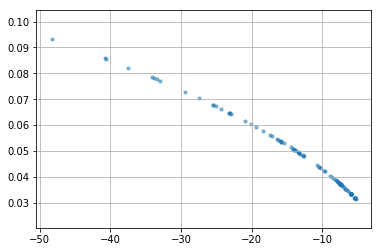

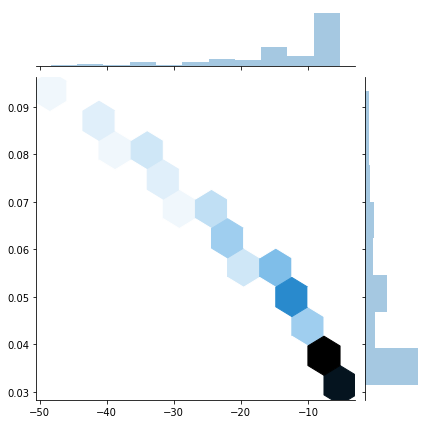

In [43]:
dz = mean_dates_3(df.reset_index().set_index('ID_CLIENTE') )
names, PV, ST = KVS_TEST(dz.loc[IX], y_train.loc[IX], pv0 = 1e-5)
print(len(names), dz.shape)
scatter(log10(array(PV)) , ( array(ST)) , alpha = .5, s = 10), grid()
sns.jointplot(x = log10( array(PV)+1e-300), y = ( array(ST)   ), kind="hex")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike


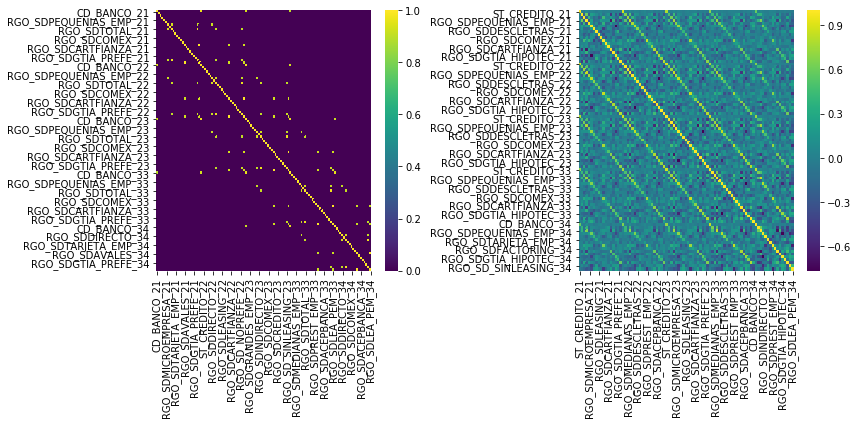

89


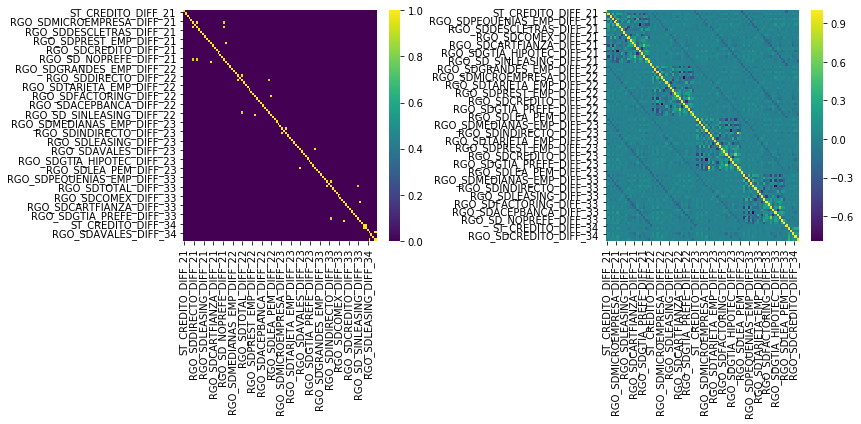

87


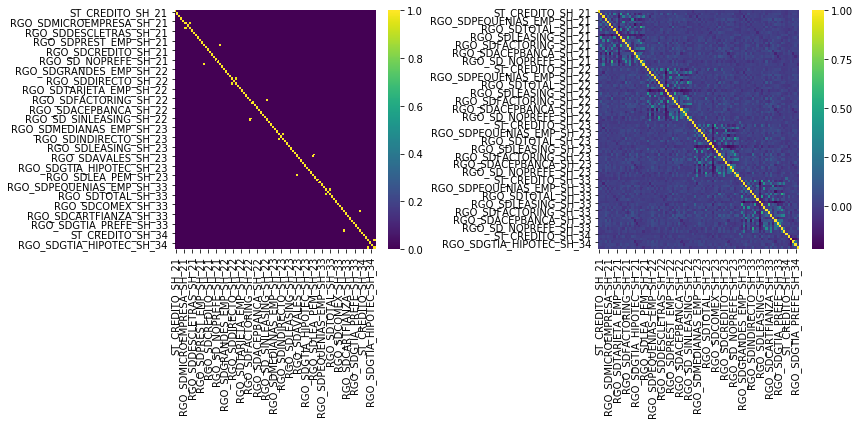

90


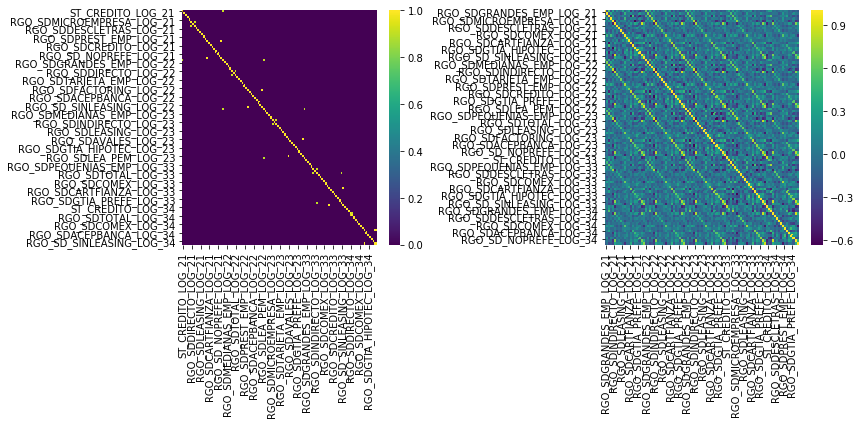

96


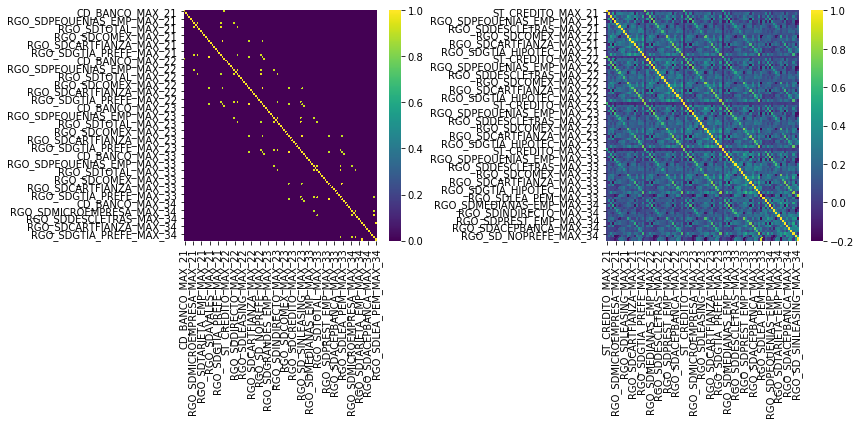

90


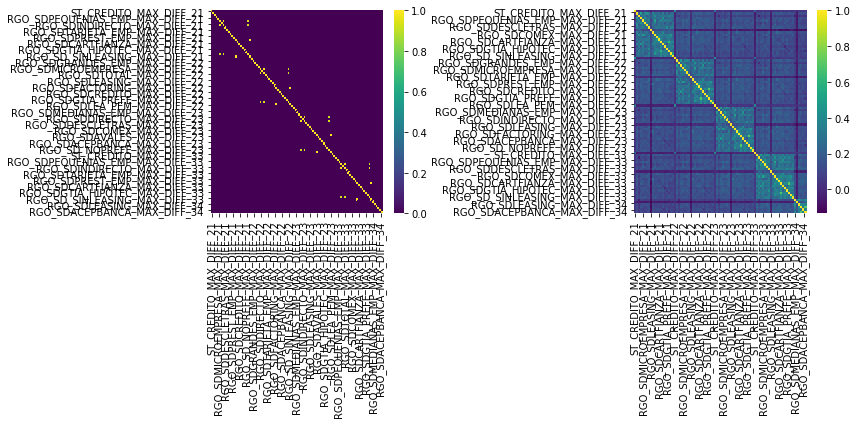

86


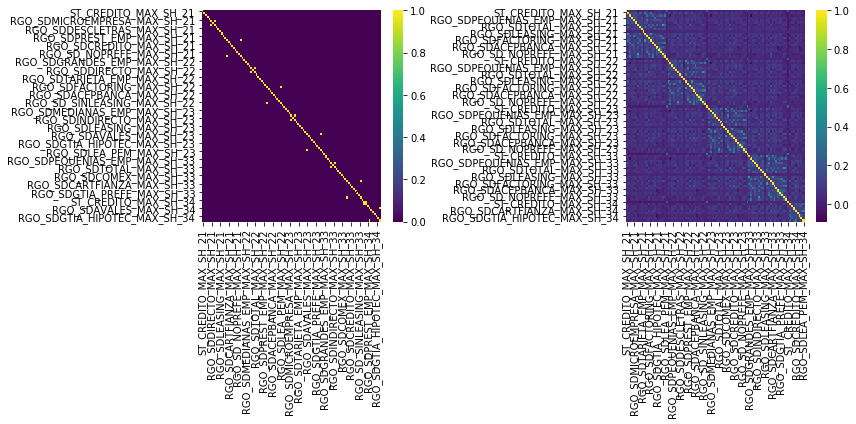

93


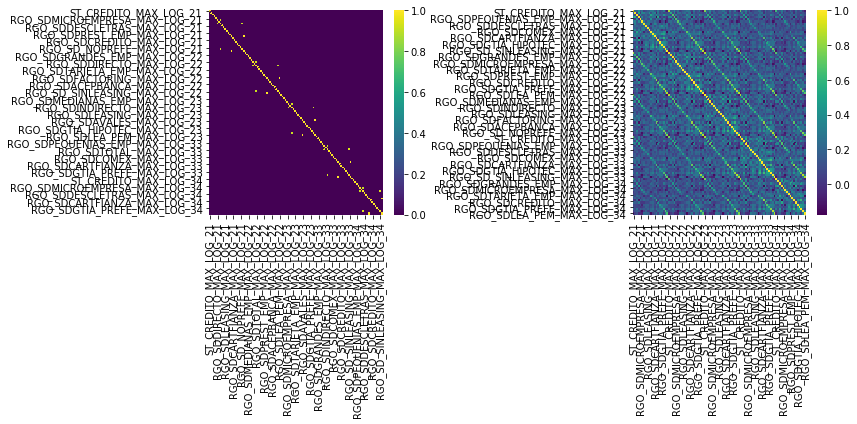

97
CPU times: user 1min 5s, sys: 1.88 s, total: 1min 7s
Wall time: 1min 7s


In [44]:

%%time 
dfA = mean_test_3(df_endeudamiento, IX, y_train, namecol = '_', pv0 = 1e-3 )
dfD = mean_test_3(dff1.reset_index().set_index('ID_CLIENTE'), IX, y_train, namecol = '_DIFF_', pv0 = 1e-3)
dfSH = mean_test_3(dff_sh.reset_index().set_index('ID_CLIENTE'), IX, y_train, namecol = '_SH_', pv0 = 1e-3 )
dfLOG = mean_test_3( dflog.reset_index().set_index('ID_CLIENTE') , IX, y_train, namecol = '_LOG_', pv0 = 1e-3 )


dfA_MX = mean_test_3_max(df_endeudamiento, IX, y_train, namecol = '_MAX_', pv0 = 1e-3 )
dfD_MX = mean_test_3_max(dff1.reset_index().set_index('ID_CLIENTE'), IX, y_train, namecol = '_MAX_DIFF_', pv0 = 1e-3)
dfSH_MX = mean_test_3_max(dff_sh.reset_index().set_index('ID_CLIENTE'), IX, y_train, namecol = '_MAX_SH_', pv0 = 1e-3 )
dfLOG_MX= mean_test_3_max( dflog.reset_index().set_index('ID_CLIENTE') , IX, y_train, namecol = '_MAX_LOG_', pv0 = 1e-3 )


del  dff1, dff_sh, dflog, dz, df


In [45]:

DF_ENDEUDAMIENTO_MX = pd.concat([dfA_MX, dfD_MX, dfSH_MX, dfLOG_MX], axis = 1)
del dfA_MX, dfD_MX, dfSH_MX, dfLOG_MX
DF_ENDEUDAMIENTO_MX.head()

ST_CREDITO_MAX_21  RGO_SDGRANDES_EMP_MAX_21  \
ID_CLIENTE                                                
1                         1.0                      18.0   
2                         1.0                      15.0   
3                         1.0                       6.0   
5                         1.0                      20.0   
6                         1.0                      10.0   

            RGO_SDMEDIANAS_EMP_MAX_21  RGO_SDPEQUENIAS_EMP_MAX_21  \
ID_CLIENTE                                                          
1                                19.0                        15.0   
2                                19.0                        15.0   
3                                14.0                         3.0   
5                                 8.0                        20.0   
6                                19.0                        17.0   

            RGO_SDMICROEMPRESA_MAX_21  RGO_SDINDIRECTO_MAX_21  \
ID_CLIENTE                                                      
1                                18.0                    16.0   
2                                19.0                    19.0   
3                                16.0                     7.0   
5                                13.0                    10.0   
6                                20.0                    13.0   

            RGO_SDDESCLETRAS_MAX_21  RGO_SDTARJETA_EMP_MAX_21  \
ID_CLIENTE                                                      
1                              13.0                      19.0   
2                              19.0                      18.0   
3                              16.0                      13.0   
5                              20.0                      20.0   
6                              17.0                      18.0   

            RGO_SDLEASING_MAX_21  RGO_SDCOMEX_MAX_21  ...  \
ID_CLIENTE                                            ...   
1                           15.0                13.0  ...   
2                           14.0                20.0  ...   
3                           19.0                20.0  ...   
5                           17.0                14.0  ...   
6                           16.0                17.0  ...   

            RGO_SDTARJETA_EMP_MAX_LOG_34  RGO_SDPREST_EMP_MAX_LOG_34  \
ID_CLIENTE                                                             
1                                    NaN                         NaN   
2                               2.945312                    2.484375   
3                                    NaN                         NaN   
5                               2.996094                    2.484375   
6                                    NaN                         NaN   

            RGO_SDCARTFIANZA_MAX_LOG_34  RGO_SDCREDITO_MAX_LOG_34  \
ID_CLIENTE                                                          
1                                   NaN                       NaN   
2                              2.890625                  2.996094   
3                                   NaN                       NaN   
5                              2.996094                  1.946289   
6                                   NaN                       NaN   

            RGO_SDACEPBANCA_MAX_LOG_34  RGO_SDGTIA_HIPOTEC_MAX_LOG_34  \
ID_CLIENTE                                                              
1                                  NaN                            NaN   
2                             2.833984                       2.890625   
3                                  NaN                            NaN   
5                             2.996094                       2.996094   
6                                  NaN                            NaN   

            RGO_SDGTIA_PREFE_MAX_LOG_34  RGO_SD_NOPREFE_MAX_LOG_34  \
ID_CLIENTE                                                           
1                                   NaN                        NaN   
2                              2.564453                   2.890

In [46]:
DF = pd.concat([dfA, dfD, dfSH, dfLOG], axis = 1)
del dfA, dfD, dfSH, dfLOG
DF.head()

ST_CREDITO_21  RGO_SDGRANDES_EMP_21  RGO_SDMEDIANAS_EMP_21  \
ID_CLIENTE                                                               
1                     1.0             12.000000              16.250000   
2                     1.0              8.750000              13.250000   
3                     1.0              4.750000              13.000000   
5                     1.0             16.333333               5.833333   
6                     1.0              5.000000               9.333333   

            RGO_SDPEQUENIAS_EMP_21  RGO_SDMICROEMPRESA_21  RGO_SDINDIRECTO_21  \
ID_CLIENTE                                                                      
1                        12.500000              16.000000           15.000000   
2                         8.000000              12.000000           15.500000   
3                         2.000000               9.250000            6.000000   
5                        18.333333               9.333333            5.166667   
6                         8.000000              10.333333            9.000000   

            RGO_SDDESCLETRAS_21  RGO_SDTARJETA_EMP_21  RGO_SDLEASING_21  \
ID_CLIENTE                                                                
1                     10.500000             13.750000          7.500000   
2                     13.750000              9.750000         12.750000   
3                     10.500000              6.000000         13.750000   
5                     13.833333             16.666667         13.000000   
6                      8.333333             11.000000         10.666667   

            RGO_SDCOMEX_21  ...  RGO_SDLEASING_LOG_34  RGO_SDCOMEX_LOG_34  \
ID_CLIENTE                  ...                                             
1                 8.250000  ...                   NaN                 NaN   
2                12.250000  ...              2.628906            1.286133   
3                12.500000  ...                   NaN                 NaN   
5                13.333333  ...              1.748047            2.673828   
6                 5.833333  ...                   NaN                 NaN   

            RGO_SDPREST_EMP_LOG_34  RGO_SDFACTORING_LOG_34  \
ID_CLIENTE                                                   
1                              NaN                     NaN   
2                         1.541016                2.570312   
3                              NaN                     NaN   
5                         2.394531                2.513672   
6                              NaN                     NaN   

            RGO_SDACEPBANCA_LOG_34  RGO_SDGTIA_HIPOTEC_LOG_34  \
ID_CLIENTE                                                      
1                              NaN                        NaN   
2                         1.743164                   1.445312   
3                              NaN                        NaN   
5                         1.931641                   2.453125   
6                              NaN                        NaN   

            RGO_SDGTIA_PREFE_LOG_34  RGO_SD_NOPREFE_LOG_34  \
ID_CLIENTE                                                   
1                               NaN                    NaN   
2                          2.242188               2.820312   
3                               NaN                    NaN   
5                          2.777344               1.816406   
6                               NaN                    NaN   

            RGO_SD_SINLEASING_LOG_34  RGO_SDLEA_PEM_LOG_34  
ID_CLIENTE                                                  
1                                NaN                   NaN  
2                           1.892578              2.505859  
3                                NaN                   NaN  
5                           2.378906              2.285156  
6                                NaN                   NaN  

[5 rows x 362 columns]

In [47]:
%%time
df = df_endeudamiento.reset_index().set_index(['ID_CLIENTE','MES', 'MES_T0'])
df.drop(columns = 'CD_BANCO', inplace = True)
dfSTD =  df.groupby('ID_CLIENTE').std()
dfK = df.groupby(['ID_CLIENTE']).apply( pd.DataFrame.kurt )
dfSK = df.groupby(['ID_CLIENTE']).apply( pd.DataFrame.skew )

print(dfSTD.shape, dfK.shape, dfSK.shape)

names, pv, st = KVS_TEST(dfSTD.loc[IX], y_train,  pv0 = 1e-3 )
dfSTD = dfSTD[names]
print(len(names))

names, pv, st = KVS_TEST(dfK.loc[IX], y_train,  pv0 = 1e-3 )
dfK = dfK[names] 
print(len(names))

names, pv, st = KVS_TEST(dfSK.loc[IX], y_train,  pv0 = 1e-3)
dfSK = dfSK[names]
print(len(names))

cc = [ c + '_STD' for c in dfSTD.columns]
dfSTD.columns = cc

cc = [ c + '_KURT' for c in dfK.columns]
dfK.columns = cc

cc = [ c + '_SKEW' for c in dfSK.columns]
dfSK.columns = cc

dfST = pd.concat([dfSTD, dfK, dfSK], axis = 1)
del dfSTD, dfK, dfSK, df

dfST.head()

(70721, 23) (70721, 23) (70721, 23)
22
10
14
CPU times: user 1min 47s, sys: 2.3 s, total: 1min 49s
Wall time: 1min 49s


ST_CREDITO_STD  RGO_SDGRANDES_EMP_STD  RGO_SDPEQUENIAS_EMP_STD  \
ID_CLIENTE                                                                   
1                      0.0               4.426718                 6.082763   
2                      0.0               4.649731                 5.483963   
3                      0.0               4.130678                 3.054368   
5                      0.0               5.302152                 2.302591   
6                      0.0               4.092355                 5.254322   

            RGO_SDMICROEMPRESA_STD  RGO_SDDIRECTO_STD  RGO_SDINDIRECTO_STD  \
ID_CLIENTE                                                                   
1                         2.792848           3.859512             0.957427   
2                         4.552599           3.482042             5.138243   
3                         5.269013           1.064581             4.777988   
5                         2.921077           7.753204             5.936415   
6                         6.312060           3.874342             2.921787   

            RGO_SDTOTAL_STD  RGO_SDDESCLETRAS_STD  RGO_SDTARJETA_EMP_STD  \
ID_CLIENTE                                                                 
1                  3.803507              2.581989               5.325646   
2                  3.507355              4.265965               6.290897   
3                  0.957427              6.692035               7.028513   
5                  7.628850              3.987159               5.320256   
6                  3.864481              8.016430               6.143032   

            RGO_SDLEASING_STD  ...  RGO_SDTARJETA_EMP_SKEW  \
ID_CLIENTE                     ...                           
1                    4.497685  ...                1.232609   
2                    2.759320  ...                0.190636   
3                    5.475704  ...                0.581947   
5                    6.778359  ...               -0.385274   
6                    4.725073  ...               -0.853662   

            RGO_SDLEASING_SKEW  RGO_SDCOMEX_SKEW  RGO_SDPREST_EMP_SKEW  \
ID_CLIENTE                                                               
1                     0.661514          1.104241              0.000000   
2                    -0.374235          0.944140             -0.440583   
3                    -0.341176          0.774934              0.733464   
5                    -0.272879         -3.849910             -0.032731   
6                     0.441434          1.351650              0.527928   

            RGO_SDAVALES_SKEW  RGO_SDCARTFIANZA_SKEW  RGO_SDCREDITO_SKEW  \
ID_CLIENTE                                                                 
1                    0.895257              -0.456594           -2.409874   
2                   -0.277691              -0.155573           -1.152654   
3                   -1.178292              -2.028815           -2.922167   
5                   -0.361288               1.381485           -0.177081   
6                   -0.261355              -0.552110           -0.797692   

            RGO_SDGTIA_PREFE_SKEW  RGO_SD_NOPREFE_SKEW  RGO_SDLEA_PEM_SKEW  
ID_CLIENTE                                                                  
1                       -0.377611            -2.526103            0.895257  
2                       -0.100283            -1.102770           -0.277691  
3                       -1.771798            -2.971048           -1.178292  
5                       -1.208234             0.503959           -0.361288  
6                       -0.686457            -1.485194           -0.261355  

[5 rows x 46 columns]

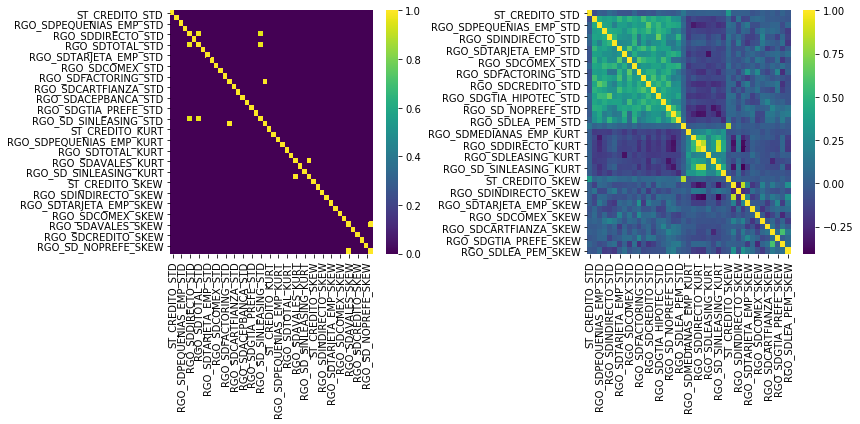

41


In [48]:
a = find_corr(dfST, cc = .95)
dfST = dfST[a]
print(len(a))

In [49]:
DF_ENDEUDAMIENTO = pd.concat([DF, DF_ENDEUDAMIENTO_MX, dfST], axis = 1)
del dfST, DF, DF_ENDEUDAMIENTO_MX
DF_ENDEUDAMIENTO.head()

ST_CREDITO_21  RGO_SDGRANDES_EMP_21  RGO_SDMEDIANAS_EMP_21  \
ID_CLIENTE                                                               
1                     1.0             12.000000              16.250000   
2                     1.0              8.750000              13.250000   
3                     1.0              4.750000              13.000000   
5                     1.0             16.333333               5.833333   
6                     1.0              5.000000               9.333333   

            RGO_SDPEQUENIAS_EMP_21  RGO_SDMICROEMPRESA_21  RGO_SDINDIRECTO_21  \
ID_CLIENTE                                                                      
1                        12.500000              16.000000           15.000000   
2                         8.000000              12.000000           15.500000   
3                         2.000000               9.250000            6.000000   
5                        18.333333               9.333333            5.166667   
6                         8.000000              10.333333            9.000000   

            RGO_SDDESCLETRAS_21  RGO_SDTARJETA_EMP_21  RGO_SDLEASING_21  \
ID_CLIENTE                                                                
1                     10.500000             13.750000          7.500000   
2                     13.750000              9.750000         12.750000   
3                     10.500000              6.000000         13.750000   
5                     13.833333             16.666667         13.000000   
6                      8.333333             11.000000         10.666667   

            RGO_SDCOMEX_21  ...  RGO_SDTOTAL_SKEW  RGO_SDTARJETA_EMP_SKEW  \
ID_CLIENTE                  ...                                             
1                 8.250000  ...         -0.186931                1.232609   
2                12.250000  ...         -0.071671                0.190636   
3                12.500000  ...         -0.276716                0.581947   
5                13.333333  ...         -0.521043               -0.385274   
6                 5.833333  ...         -0.749702               -0.853662   

            RGO_SDLEASING_SKEW  RGO_SDCOMEX_SKEW  RGO_SDPREST_EMP_SKEW  \
ID_CLIENTE                                                               
1                     0.661514          1.104241              0.000000   
2                    -0.374235          0.944140             -0.440583   
3                    -0.341176          0.774934              0.733464   
5                    -0.272879         -3.849910             -0.032731   
6                     0.441434          1.351650              0.527928   

            RGO_SDCARTFIANZA_SKEW  RGO_SDCREDITO_SKEW  RGO_SDGTIA_PREFE_SKEW  \
ID_CLIENTE                                                                     
1                       -0.456594           -2.409874              -0.377611   
2                       -0.155573           -1.152654              -0.100283   
3                       -2.028815           -2.922167              -1.771798   
5                        1.381485           -0.177081              -1.208234   
6                       -0.552110           -0.797692              -0.686457   

            RGO_SD_NOPREFE_SKEW  RGO_SDLEA_PEM_SKEW  
ID_CLIENTE                                           
1                     -2.526103            0.895257  
2                     -1.102770           -0.277691  
3                     -2.971048           -1.178292  
5                      0.503959           -0.361288  
6                     -1.485194           -0.261355  

[5 rows x 769 columns]

As the majority of features have only a few unique numeric values. We will create new features counting the numbers of numeric values.

In [50]:
df1 = df_endeudamiento.reset_index()
df1.fillna(-999, inplace = True)
df = []
j = 1
for c in df1.drop(["ID_CLIENTE", "MES", "MES_T0"], axis=1).columns:
    print("haciendo", c, j)
    temp = pd.crosstab(df1.ID_CLIENTE, df1[c])
    temp.columns = [c + "_" + str(v) for v in temp.columns]
    j = j+1
    df.append(temp)
    #df.append(temp.apply(lambda x: x / x.sum(), axis=1))
df = pd.concat(df, axis=1)
del df1
df.head()

haciendo CD_BANCO 1
haciendo ST_CREDITO 2
haciendo RGO_SDGRANDES_EMP 3
haciendo RGO_SDMEDIANAS_EMP 4
haciendo RGO_SDPEQUENIAS_EMP 5
haciendo RGO_SDMICROEMPRESA 6
haciendo RGO_SDDIRECTO 7
haciendo RGO_SDINDIRECTO 8
haciendo RGO_SDTOTAL 9
haciendo RGO_SDDESCLETRAS 10
haciendo RGO_SDTARJETA_EMP 11
haciendo RGO_SDLEASING 12
haciendo RGO_SDCOMEX 13
haciendo RGO_SDPREST_EMP 14
haciendo RGO_SDFACTORING 15
haciendo RGO_SDAVALES 16
haciendo RGO_SDCARTFIANZA 17
haciendo RGO_SDCREDITO 18
haciendo RGO_SDACEPBANCA 19
haciendo RGO_SDGTIA_HIPOTEC 20
haciendo RGO_SDGTIA_PREFE 21
haciendo RGO_SD_NOPREFE 22
haciendo RGO_SD_SINLEASING 23
haciendo RGO_SDLEA_PEM 24


CD_BANCO_1  CD_BANCO_2  CD_BANCO_4  CD_BANCO_6  CD_BANCO_22  \
ID_CLIENTE                                                                
1                    0           0           0           0            0   
2                    0           0           0           0            0   
3                    0           0           0           0            0   
5                   10           0           0          26            0   
6                    0           8           0           2            0   

            CD_BANCO_52  CD_BANCO_55  CD_BANCO_61  CD_BANCO_72  CD_BANCO_73  \
ID_CLIENTE                                                                    
1                     0            0            0            0            0   
2                     0            0            0            0            0   
3                     0            0            8            0            0   
5                     0            0            0            0            0   
6                     0            0            0            0            0   

            ...  RGO_SDLEA_PEM_11  RGO_SDLEA_PEM_12  RGO_SDLEA_PEM_13  \
ID_CLIENTE  ...                                                         
1           ...                 0                 0                 0   
2           ...                 0                 2                 4   
3           ...                 0                 1                 1   
5           ...                 0                 0                 0   
6           ...                 0                 0                 1   

            RGO_SDLEA_PEM_14  RGO_SDLEA_PEM_15  RGO_SDLEA_PEM_16  \
ID_CLIENTE                                                         
1                          0                 0                 0   
2                          2                 4                 0   
3                          8                 6                 0   
5                          0                 0                 0   
6                          1                 8                 0   

            RGO_SDLEA_PEM_17  RGO_SDLEA_PEM_18  RGO_SDLEA_PEM_19  \
ID_CLIENTE                                                         
1                          0                 0                 0   
2                          0                 0                 0   
3                          0                 0                 0   
5                          0                 0                 2   
6                          0                 0                 0   

            RGO_SDLEA_PEM_20  
ID_CLIENTE                    
1                          0  
2                          0  
3                          0  
5                         21  
6                          0  

[5 rows x 522 columns]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


406


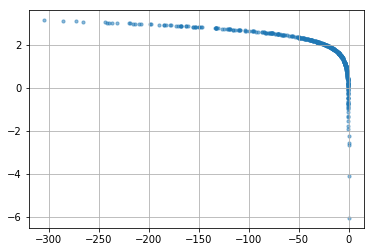

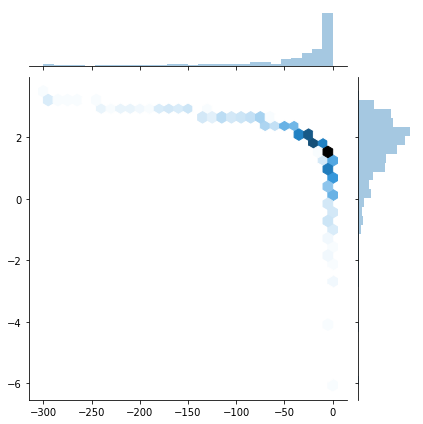

In [51]:
IX = intersect1d(df_stock_train.index , df.index)

from sklearn.feature_selection import  chi2
a, b = chi2(df.loc[IX], y_train.loc[IX])
scatter(log10(b), log10(a), alpha = .5, s = 10), grid()
sns.jointplot(x = log10(b +1e-300), y = log10(a + 1e-300), kind="hex")

COLD = df.columns[b<1e-3]
print(len(COLD))

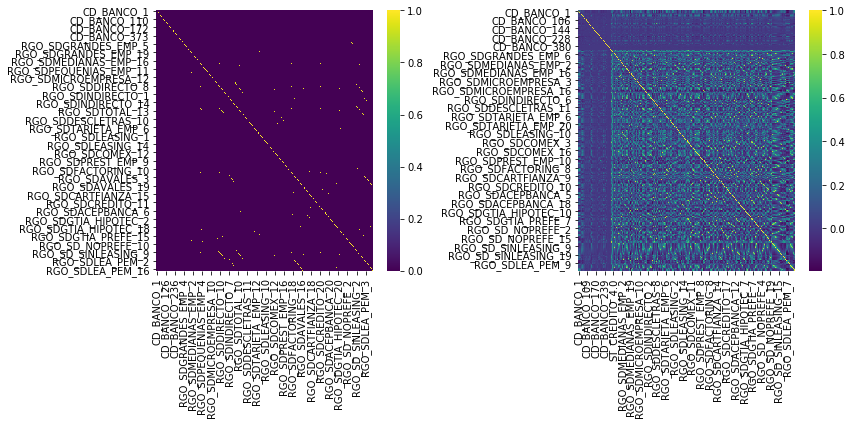

299


34328

In [52]:
DF_ENDEUDAMIENTO_COUNT= df[COLD]
del df , df_endeudamiento

n = find_corr(DF_ENDEUDAMIENTO_COUNT, cc = .95)
print( len(n) )

DF_ENDEUDAMIENTO_COUNT = DF_ENDEUDAMIENTO_COUNT[n] 
gc.collect()

In [53]:
DF = pd.concat([DF_ENDEUDAMIENTO , DF_ENDEUDAMIENTO_COUNT], axis =1)
del DF_ENDEUDAMIENTO, DF_ENDEUDAMIENTO_COUNT
DF_ENDEUDAMIENTO = DF.copy()
del DF
DF_ENDEUDAMIENTO.head()

ST_CREDITO_21  RGO_SDGRANDES_EMP_21  RGO_SDMEDIANAS_EMP_21  \
ID_CLIENTE                                                               
1                     1.0             12.000000              16.250000   
2                     1.0              8.750000              13.250000   
3                     1.0              4.750000              13.000000   
5                     1.0             16.333333               5.833333   
6                     1.0              5.000000               9.333333   

            RGO_SDPEQUENIAS_EMP_21  RGO_SDMICROEMPRESA_21  RGO_SDINDIRECTO_21  \
ID_CLIENTE                                                                      
1                        12.500000              16.000000           15.000000   
2                         8.000000              12.000000           15.500000   
3                         2.000000               9.250000            6.000000   
5                        18.333333               9.333333            5.166667   
6                         8.000000              10.333333            9.000000   

            RGO_SDDESCLETRAS_21  RGO_SDTARJETA_EMP_21  RGO_SDLEASING_21  \
ID_CLIENTE                                                                
1                     10.500000             13.750000          7.500000   
2                     13.750000              9.750000         12.750000   
3                     10.500000              6.000000         13.750000   
5                     13.833333             16.666667         13.000000   
6                      8.333333             11.000000         10.666667   

            RGO_SDCOMEX_21  ...  RGO_SDLEA_PEM_8  RGO_SDLEA_PEM_9  \
ID_CLIENTE                  ...                                     
1                 8.250000  ...                6                1   
2                12.250000  ...                0                0   
3                12.500000  ...                0                0   
5                13.333333  ...                0                0   
6                 5.833333  ...                0                0   

            RGO_SDLEA_PEM_10  RGO_SDLEA_PEM_11  RGO_SDLEA_PEM_13  \
ID_CLIENTE                                                         
1                          1                 0                 0   
2                         12                 0                 4   
3                          0                 0                 1   
5                          1                 0                 0   
6                          0                 0                 1   

            RGO_SDLEA_PEM_14  RGO_SDLEA_PEM_15  RGO_SDLEA_PEM_16  \
ID_CLIENTE                                                         
1                          0                 0                 0   
2                          2                 4                 0   
3                          8                 6                 0   
5                          0                 0                 0   
6                          1                 8                 0   

            RGO_SDLEA_PEM_19  RGO_SDLEA_PEM_20  
ID_CLIENTE                                      
1                          0                 0  
2                          0                 0  
3                          0                 0  
5                          2                21  
6                          0                 0  

[5 rows x 1068 columns]

In [54]:
IX = intersect1d(df_stock_train.index, DF_ENDEUDAMIENTO.index)
X_train = DF_ENDEUDAMIENTO.loc[IX]
y_train = df_stock_train.loc[IX].FUGA_3M
X_train.head()


ST_CREDITO_21  RGO_SDGRANDES_EMP_21  RGO_SDMEDIANAS_EMP_21  \
ID_CLIENTE                                                               
1                     1.0             12.000000              16.250000   
2                     1.0              8.750000              13.250000   
3                     1.0              4.750000              13.000000   
5                     1.0             16.333333               5.833333   
6                     1.0              5.000000               9.333333   

            RGO_SDPEQUENIAS_EMP_21  RGO_SDMICROEMPRESA_21  RGO_SDINDIRECTO_21  \
ID_CLIENTE                                                                      
1                        12.500000              16.000000           15.000000   
2                         8.000000              12.000000           15.500000   
3                         2.000000               9.250000            6.000000   
5                        18.333333               9.333333            5.166667   
6                         8.000000              10.333333            9.000000   

            RGO_SDDESCLETRAS_21  RGO_SDTARJETA_EMP_21  RGO_SDLEASING_21  \
ID_CLIENTE                                                                
1                     10.500000             13.750000          7.500000   
2                     13.750000              9.750000         12.750000   
3                     10.500000              6.000000         13.750000   
5                     13.833333             16.666667         13.000000   
6                      8.333333             11.000000         10.666667   

            RGO_SDCOMEX_21  ...  RGO_SDLEA_PEM_8  RGO_SDLEA_PEM_9  \
ID_CLIENTE                  ...                                     
1                 8.250000  ...                6                1   
2                12.250000  ...                0                0   
3                12.500000  ...                0                0   
5                13.333333  ...                0                0   
6                 5.833333  ...                0                0   

            RGO_SDLEA_PEM_10  RGO_SDLEA_PEM_11  RGO_SDLEA_PEM_13  \
ID_CLIENTE                                                         
1                          1                 0                 0   
2                         12                 0                 4   
3                          0                 0                 1   
5                          1                 0                 0   
6                          0                 0                 1   

            RGO_SDLEA_PEM_14  RGO_SDLEA_PEM_15  RGO_SDLEA_PEM_16  \
ID_CLIENTE                                                         
1                          0                 0                 0   
2                          2                 4                 0   
3                          8                 6                 0   
5                          0                 0                 0   
6                          1                 8                 0   

            RGO_SDLEA_PEM_19  RGO_SDLEA_PEM_20  
ID_CLIENTE                                      
1                          0                 0  
2                          0                 0  
3                          0                 0  
5                          2                21  
6                          0                 0  

[5 rows x 1068 columns]

In [55]:
# THE BEST 500 FEATURES
COLF = ['RGO_SDPREST_EMP_MAX_21', 'ST_CREDITO_5.0', 'RGO_SDPREST_EMP_MAX_33', 'RGO_SD_NOPREFE_18', 'ST_CREDITO_LOG_33', 'RGO_SDLEA_PEM_LOG_33', 'ST_CREDITO_33', 'RGO_SDMICROEMPRESA_MAX_33', 'RGO_SDPREST_EMP_MAX_34', 'RGO_SDMICROEMPRESA_MAX_34', 'ST_CREDITO_MAX_SH_34', 'RGO_SDLEA_PEM_MAX_SH_34', 'RGO_SDGRANDES_EMP_10', 'RGO_SDACEPBANCA_LOG_33', 'CD_BANCO_1', 'RGO_SD_SINLEASING_MAX_LOG_21', 'RGO_SDMICROEMPRESA_MAX_21', 'RGO_SD_SINLEASING_MAX_LOG_33', 'RGO_SDPREST_EMP_LOG_34', 'ST_CREDITO_21', 'ST_CREDITO_LOG_34', 'RGO_SDCREDITO_MAX_SH_33', 'RGO_SDPREST_EMP_21', 'RGO_SD_SINLEASING_MAX_LOG_22', 'CD_BANCO_34', 'RGO_SDLEA_PEM_6', 'RGO_SDPEQUENIAS_EMP_33', 'RGO_SDLEA_PEM_15', 'RGO_SDLEA_PEM_MAX_SH_33', 'RGO_SDMICROEMPRESA_20', 'RGO_SDLEA_PEM_34', 'RGO_SDFACTORING_9', 'RGO_SDLEA_PEM_MAX_34', 'CD_BANCO_101', 'RGO_SDCREDITO_MAX_33', 'RGO_SDLEA_PEM_LOG_21', 'CD_BANCO_82', 'CD_BANCO_140', 'RGO_SDCREDITO_3', 'RGO_SD_SINLEASING_MAX_LOG_23', 'RGO_SDPEQUENIAS_EMP_MAX_21', 'RGO_SDPREST_EMP_MAX_SH_21', 'CD_BANCO_MAX_34', 'RGO_SDLEA_PEM_MAX_LOG_21', 'RGO_SDCREDITO_MAX_21', 'CD_BANCO_109', 'RGO_SDPREST_EMP_23', 'RGO_SDLEA_PEM_LOG_34', 'CD_BANCO_6', 'RGO_SDGTIA_PREFE_7', 'ST_CREDITO_SH_34', 'RGO_SDLEA_PEM_10', 'RGO_SDMICROEMPRESA_MAX_DIFF_21', 'RGO_SDCREDITO_20', 'RGO_SDGTIA_HIPOTEC_MAX_21', 'RGO_SDPEQUENIAS_EMP_DIFF_33', 'RGO_SDGTIA_HIPOTEC_DIFF_23', 'RGO_SDPEQUENIAS_EMP_21', 'CD_BANCO_228', 'RGO_SDMICROEMPRESA_MAX_SH_21', 'RGO_SDDESCLETRAS_MAX_23', 'RGO_SD_NOPREFE_MAX_LOG_23', 'RGO_SDGTIA_HIPOTEC_MAX_DIFF_23', 'RGO_SDPREST_EMP_33', 'RGO_SDCOMEX_20', 'CD_BANCO_156', 'RGO_SDLEA_PEM_MAX_33', 'RGO_SDGTIA_HIPOTEC_2', 'RGO_SDPEQUENIAS_EMP_LOG_21', 'RGO_SDACEPBANCA_MAX_SH_22', 'RGO_SDMICROEMPRESA_MAX_SH_33', 'RGO_SDPEQUENIAS_EMP_MAX_23', 'RGO_SDINDIRECTO_21', 'RGO_SDMICROEMPRESA_33', 'RGO_SDCARTFIANZA_5', 'ST_CREDITO_MAX_21', 'RGO_SDMICROEMPRESA_16', 'RGO_SDCOMEX_MAX_LOG_33', 'RGO_SD_NOPREFE_7', 'RGO_SDPREST_EMP_MAX_SH_23', 'RGO_SDGTIA_HIPOTEC_20', 'RGO_SDCOMEX_MAX_SH_23', 'RGO_SDCREDITO_MAX_23', 'RGO_SDMEDIANAS_EMP_MAX_22', 'RGO_SD_NOPREFE_21', 'RGO_SDLEA_PEM_DIFF_33', 'RGO_SDMEDIANAS_EMP_MAX_21', 'RGO_SDDESCLETRAS_17', 'RGO_SDDESCLETRAS_11', 'RGO_SDCREDITO_1', 'RGO_SDLEASING_19', 'RGO_SD_NOPREFE_MAX_DIFF_22', 'RGO_SDMEDIANAS_EMP_20', 'RGO_SD_NOPREFE_22', 'CD_BANCO_239', 'RGO_SDDESCLETRAS_1', 'RGO_SDFACTORING_MAX_21', 'RGO_SDPREST_EMP_MAX_23', 'RGO_SD_NOPREFE_SH_21', 'RGO_SDFACTORING_14', 'RGO_SDPEQUENIAS_EMP_MAX_33', 'RGO_SDDESCLETRAS_DIFF_22', 'RGO_SDCARTFIANZA_DIFF_22', 'RGO_SDINDIRECTO_MAX_SH_21', 'RGO_SDLEA_PEM_MAX_DIFF_33', 'CD_BANCO_73', 'RGO_SDPREST_EMP_SH_23', 'RGO_SDCREDITO_LOG_33', 'RGO_SDPEQUENIAS_EMP_MAX_SH_33', 'RGO_SDCOMEX_MAX_SH_33', 'RGO_SDDESCLETRAS_DIFF_21', 'RGO_SDTARJETA_EMP_20', 'RGO_SDACEPBANCA_3', 'RGO_SD_NOPREFE_19', 'RGO_SD_NOPREFE_MAX_21', 'RGO_SDPREST_EMP_8', 'RGO_SDCREDITO_MAX_DIFF_23', 'RGO_SD_SINLEASING_34', 'RGO_SDINDIRECTO_13', 'RGO_SDFACTORING_6', 'RGO_SD_NOPREFE_MAX_22', 'ST_CREDITO_STD', 'RGO_SDINDIRECTO_MAX_SH_23', 'RGO_SDGTIA_HIPOTEC_DIFF_21', 'RGO_SD_NOPREFE_MAX_DIFF_23', 'RGO_SDLEA_PEM_DIFF_22', 'RGO_SDGRANDES_EMP_23', 'RGO_SDLEA_PEM_SH_34', 'RGO_SDINDIRECTO_DIFF_21', 'RGO_SDLEA_PEM_MAX_SH_22', 'RGO_SD_NOPREFE_LOG_21', 'RGO_SDMICROEMPRESA_DIFF_22', 'RGO_SDCREDITO_DIFF_22', 'RGO_SDMEDIANAS_EMP_MAX_SH_21', 'RGO_SDGRANDES_EMP_MAX_23', 'RGO_SDTOTAL_LOG_21', 'RGO_SDPREST_EMP_MAX_DIFF_22', 'ST_CREDITO_22', 'CD_BANCO_236', 'RGO_SDGTIA_HIPOTEC_MAX_DIFF_21', 'RGO_SDCARTFIANZA_DIFF_33', 'RGO_SDPEQUENIAS_EMP_9', 'RGO_SDGTIA_PREFE_MAX_33', 'RGO_SDGRANDES_EMP_6', 'RGO_SDMEDIANAS_EMP_DIFF_21', 'RGO_SDACEPBANCA_DIFF_21', 'RGO_SDTOTAL_MAX_SH_22', 'RGO_SDMICROEMPRESA_22', 'RGO_SDMICROEMPRESA_MAX_23', 'RGO_SDGTIA_PREFE_SH_23', 'RGO_SDTOTAL_MAX_SH_33', 'RGO_SD_NOPREFE_MAX_SH_23', 'RGO_SDLEA_PEM_SH_33', 'CD_BANCO_231', 'RGO_SDGTIA_PREFE_MAX_SH_33', 'RGO_SDMEDIANAS_EMP_MAX_DIFF_22', 'RGO_SDLEASING_33', 'ST_CREDITO_34', 'RGO_SDCREDITO_MAX_SH_22', 'RGO_SDGTIA_PREFE_22', 'RGO_SDACEPBANCA_MAX_SH_33', 'RGO_SDINDIRECTO_LOG_21', 'RGO_SDACEPBANCA_MAX_DIFF_33', 'RGO_SDINDIRECTO_MAX_SH_33', 'RGO_SDCREDITO_SH_33', 'RGO_SDMICROEMPRESA_MAX_SH_23', 'RGO_SDMICROEMPRESA_SH_23', 'RGO_SD_SINLEASING_MAX_34', 'RGO_SDCREDITO_33', 'RGO_SDGTIA_HIPOTEC_MAX_LOG_23', 'RGO_SD_NOPREFE_MAX_SH_21', 'RGO_SDMICROEMPRESA_STD', 'RGO_SDDESCLETRAS_LOG_22', 'RGO_SDFACTORING_DIFF_23', 'RGO_SDLEA_PEM_MAX_LOG_23', 'RGO_SDACEPBANCA_SH_22', 'RGO_SDCARTFIANZA_SH_33', 'RGO_SDCREDITO_DIFF_23', 'RGO_SDLEASING_SH_21', 'RGO_SDINDIRECTO_MAX_DIFF_33', 'RGO_SD_NOPREFE_10', 'RGO_SDMICROEMPRESA_LOG_23', 'RGO_SDCREDITO_15', 'RGO_SDCREDITO_SH_23', 'RGO_SDCOMEX_22', 'RGO_SDINDIRECTO_DIFF_33', 'RGO_SDPREST_EMP_MAX_SH_22', 'RGO_SDTARJETA_EMP_MAX_SH_23', 'CD_BANCO_230', 'RGO_SDPREST_EMP_MAX_22', 'RGO_SDMICROEMPRESA_MAX_SH_22', 'RGO_SDPEQUENIAS_EMP_MAX_SH_23', 'RGO_SDDIRECTO_SKEW', 'RGO_SD_NOPREFE_SH_33', 'RGO_SDPREST_EMP_LOG_22', 'RGO_SDLEA_PEM_DIFF_34', 'RGO_SDFACTORING_SH_33', 'RGO_SDGRANDES_EMP_MAX_SH_23', 'RGO_SDPREST_EMP_10', 'RGO_SDDESCLETRAS_MAX_DIFF_21', 'RGO_SDMEDIANAS_EMP_MAX_SH_22', 'RGO_SDPREST_EMP_LOG_21', 'RGO_SDCREDITO_SH_22', 'RGO_SDCOMEX_3', 'RGO_SDCOMEX_SKEW', 'RGO_SD_NOPREFE_LOG_23', 'RGO_SD_SINLEASING_20', 'RGO_SDGRANDES_EMP_SH_21', 'RGO_SDACEPBANCA_DIFF_22', 'RGO_SDFACTORING_MAX_SH_23', 'RGO_SDTARJETA_EMP_SH_33', 'RGO_SDTARJETA_EMP_MAX_23', 'RGO_SDDESCLETRAS_SH_21', 'RGO_SDINDIRECTO_SH_21', 'RGO_SDMICROEMPRESA_12', 'RGO_SDCARTFIANZA_MAX_SH_22', 'RGO_SD_SINLEASING_19', 'RGO_SDCARTFIANZA_14', 'RGO_SDTOTAL_SH_23', 'RGO_SDLEASING_1', 'CD_BANCO_248', 'RGO_SDINDIRECTO_LOG_33', 'RGO_SDFACTORING_DIFF_21', 'RGO_SDCREDITO_34', 'RGO_SDPEQUENIAS_EMP_SH_33', 'RGO_SDDESCLETRAS_LOG_23', 'RGO_SD_NOPREFE_MAX_SH_22', 'RGO_SDLEA_PEM_16', 'RGO_SDLEA_PEM_SKEW', 'RGO_SDACEPBANCA_SH_21', 'RGO_SDGRANDES_EMP_MAX_SH_33', 'RGO_SD_NOPREFE_6', 'RGO_SDINDIRECTO_LOG_22', 'RGO_SD_SINLEASING_SH_23', 'RGO_SDGRANDES_EMP_DIFF_23', 'RGO_SDLEA_PEM_19', 'RGO_SD_SINLEASING_LOG_21', 'RGO_SDGRANDES_EMP_MAX_LOG_21', 'RGO_SDLEA_PEM_LOG_22', 'RGO_SDTOTAL_MAX_SH_23', 'RGO_SDPEQUENIAS_EMP_MAX_DIFF_22', 'RGO_SDGTIA_PREFE_DIFF_33', 'RGO_SDMEDIANAS_EMP_SH_21', 'RGO_SDGTIA_HIPOTEC_5', 'RGO_SDGTIA_HIPOTEC_LOG_33', 'RGO_SDMICROEMPRESA_18', 'RGO_SDLEA_PEM_LOG_23', 'CD_BANCO_174', 'RGO_SDCOMEX_SH_21', 'RGO_SDCARTFIANZA_SH_21', 'RGO_SDLEASING_LOG_22', 'RGO_SDDESCLETRAS_MAX_34', 'RGO_SDGTIA_PREFE_MAX_SH_21', 'RGO_SDDESCLETRAS_SH_22', 'RGO_SD_NOPREFE_SH_23', 'RGO_SDCREDITO_10', 'RGO_SDINDIRECTO_DIFF_23', 'ST_CREDITO_DIFF_21', 'RGO_SD_NOPREFE_DIFF_21', 'RGO_SDMEDIANAS_EMP_33', 'RGO_SDDESCLETRAS_MAX_DIFF_23', 'RGO_SDGRANDES_EMP_MAX_DIFF_21', 'RGO_SDCREDITO_SH_21', 'RGO_SDMICROEMPRESA_DIFF_23', 'RGO_SDCARTFIANZA_STD', 'RGO_SDDESCLETRAS_MAX_SH_21', 'RGO_SDFACTORING_SH_22', 'RGO_SD_NOPREFE_SH_22', 'RGO_SDMICROEMPRESA_SH_22', 'CD_BANCO_237', 'RGO_SDPEQUENIAS_EMP_DIFF_22', 'RGO_SDGTIA_HIPOTEC_MAX_DIFF_33', 'RGO_SDPEQUENIAS_EMP_23', 'RGO_SDTARJETA_EMP_DIFF_21', 'RGO_SDMICROEMPRESA_SH_33', 'RGO_SDACEPBANCA_STD', 'RGO_SDFACTORING_LOG_21', 'RGO_SDACEPBANCA_8', 'RGO_SDLEASING_SH_22', 'RGO_SDINDIRECTO_LOG_23', 'RGO_SDLEASING_DIFF_34', 'RGO_SDDESCLETRAS_16', 'RGO_SDACEPBANCA_MAX_SH_21', 'RGO_SDPREST_EMP_18', 'RGO_SDCARTFIANZA_LOG_33', 'RGO_SDINDIRECTO_DIFF_22', 'RGO_SDDESCLETRAS_SH_23', 'RGO_SDTOTAL_LOG_22', 'RGO_SDPREST_EMP_DIFF_22', 'RGO_SDINDIRECTO_33', 'RGO_SDFACTORING_LOG_34', 'RGO_SDMEDIANAS_EMP_SH_22', 'RGO_SDTARJETA_EMP_SH_23', 'RGO_SDMICROEMPRESA_DIFF_33', 'RGO_SDLEA_PEM_MAX_DIFF_22', 'RGO_SDCOMEX_LOG_22', 'RGO_SDLEA_PEM_SH_22', 'RGO_SDCREDITO_LOG_21', 'RGO_SDPREST_EMP_15', 'RGO_SDDESCLETRAS_LOG_33', 'RGO_SDFACTORING_LOG_22', 'RGO_SDTARJETA_EMP_DIFF_22', 'RGO_SD_NOPREFE_LOG_33', 'RGO_SDDESCLETRAS_MAX_SH_23', 'RGO_SDCARTFIANZA_MAX_SH_33', 'RGO_SDINDIRECTO_SH_22', 'RGO_SDLEA_PEM_MAX_SH_21', 'RGO_SDCARTFIANZA_DIFF_21', 'RGO_SDLEA_PEM_STD', 'RGO_SDPEQUENIAS_EMP_DIFF_23', 'RGO_SDTOTAL_SH_21', 'RGO_SDGTIA_PREFE_23', 'RGO_SDGRANDES_EMP_SH_22', 'RGO_SD_NOPREFE_13', 'RGO_SDCARTFIANZA_LOG_23', 'RGO_SDPREST_EMP_DIFF_21', 'RGO_SDACEPBANCA_7', 'RGO_SD_SINLEASING_STD', 'RGO_SDLEASING_SH_33', 'RGO_SDMICROEMPRESA_MAX_DIFF_33', 'RGO_SDPEQUENIAS_EMP_SH_23', 'RGO_SDCREDITO_MAX_DIFF_21', 'RGO_SDGTIA_PREFE_16', 'RGO_SDTOTAL_LOG_34', 'RGO_SDPREST_EMP_SH_22', 'RGO_SDCREDITO_LOG_22', 'RGO_SDPREST_EMP_DIFF_33', 'RGO_SDFACTORING_SH_23', 'RGO_SDPREST_EMP_SH_33', 'RGO_SDCOMEX_MAX_DIFF_22', 'RGO_SDMICROEMPRESA_SH_21', 'RGO_SDLEASING_LOG_21', 'RGO_SDLEASING_6', 'RGO_SDCOMEX_SH_22', 'RGO_SDGTIA_HIPOTEC_SH_33', 'RGO_SDGTIA_HIPOTEC_MAX_SH_33', 'RGO_SDMICROEMPRESA_13', 'RGO_SDLEA_PEM_14', 'RGO_SDCARTFIANZA_MAX_LOG_23', 'RGO_SDFACTORING_12', 'RGO_SDDESCLETRAS_SH_33', 'RGO_SDACEPBANCA_LOG_21', 'RGO_SDTARJETA_EMP_LOG_21', 'RGO_SDCOMEX_DIFF_21', 'RGO_SDLEA_PEM_7', 'RGO_SDMEDIANAS_EMP_SH_33', 'RGO_SDGRANDES_EMP_SH_23', 'RGO_SDGTIA_PREFE_DIFF_21', 'RGO_SDCARTFIANZA_SH_22', 'RGO_SDGTIA_PREFE_SH_21', 'ST_CREDITO_SH_33', 'RGO_SDDESCLETRAS_STD', 'RGO_SD_NOPREFE_17', 'ST_CREDITO_SH_21', 'RGO_SDTARJETA_EMP_LOG_22', 'RGO_SDCREDITO_MAX_SH_21', 'RGO_SDACEPBANCA_17', 'RGO_SDMEDIANAS_EMP_MAX_DIFF_21', 'RGO_SDTARJETA_EMP_SH_22', 'RGO_SDTOTAL_DIFF_23', 'RGO_SDCREDITO_MAX_22', 'RGO_SDCREDITO_DIFF_21', 'RGO_SDACEPBANCA_19', 'RGO_SDDESCLETRAS_MAX_21', 'RGO_SDLEA_PEM_DIFF_21', 'RGO_SD_NOPREFE_SKEW', 'RGO_SD_NOPREFE_MAX_DIFF_33', 'RGO_SDFACTORING_MAX_SH_33', 'RGO_SD_SINLEASING_DIFF_22', 'RGO_SDGTIA_HIPOTEC_MAX_DIFF_22', 'RGO_SDINDIRECTO_SH_23', 'RGO_SDGTIA_HIPOTEC_SH_22', 'RGO_SDTARJETA_EMP_LOG_23', 'RGO_SDGTIA_PREFE_MAX_SH_22', 'RGO_SDPEQUENIAS_EMP_LOG_23', 'RGO_SDGTIA_HIPOTEC_16', 'RGO_SDDESCLETRAS_8', 'RGO_SDLEASING_5', 'RGO_SDPREST_EMP_LOG_33', 'RGO_SDDESCLETRAS_14', 'RGO_SDDESCLETRAS_MAX_SH_22', 'RGO_SDCREDITO_SKEW', 'RGO_SDPREST_EMP_SKEW', 'RGO_SDCREDITO_MAX_DIFF_22', 'RGO_SDACEPBANCA_MAX_SH_23', 'RGO_SDINDIRECTO_SH_33', 'RGO_SDCOMEX_DIFF_33', 'RGO_SDGTIA_HIPOTEC_19', 'RGO_SDMEDIANAS_EMP_DIFF_23', 'RGO_SDLEA_PEM_SH_23', 'RGO_SDTARJETA_EMP_MAX_SH_33', 'RGO_SDPEQUENIAS_EMP_SH_21', 'RGO_SDGRANDES_EMP_MAX_DIFF_23', 'RGO_SDGTIA_HIPOTEC_LOG_21', 'RGO_SDLEASING_18', 'RGO_SDCARTFIANZA_MAX_SH_23', 'RGO_SDGTIA_HIPOTEC_STD', 'RGO_SDCOMEX_MAX_SH_21', 'RGO_SDPEQUENIAS_EMP_LOG_34', 'RGO_SDCARTFIANZA_SH_23', 'RGO_SDINDIRECTO_MAX_LOG_33', 'RGO_SDGRANDES_EMP_17', 'RGO_SDPEQUENIAS_EMP_KURT', 'RGO_SDCARTFIANZA_MAX_DIFF_23', 'RGO_SDGRANDES_EMP_LOG_21', 'RGO_SD_SINLEASING_DIFF_23', 'RGO_SDFACTORING_MAX_DIFF_21', 'RGO_SDCOMEX_11', 'RGO_SDTARJETA_EMP_DIFF_23', 'RGO_SDFACTORING_MAX_SH_22', 'RGO_SD_SINLEASING_MAX_SH_33', 'RGO_SDMEDIANAS_EMP_SH_23', 'RGO_SDCARTFIANZA_21', 'RGO_SDCOMEX_16', 'RGO_SDCOMEX_LOG_33', 'ST_CREDITO_1.0', 'RGO_SDFACTORING_LOG_33', 'RGO_SDPEQUENIAS_EMP_SH_22', 'RGO_SDGTIA_HIPOTEC_DIFF_22', 'RGO_SDMICROEMPRESA_11', 'RGO_SDMEDIANAS_EMP_MAX_33', 'RGO_SDMICROEMPRESA_LOG_22', 'RGO_SDLEA_PEM_SH_21', 'RGO_SD_NOPREFE_DIFF_23', 'RGO_SDPEQUENIAS_EMP_MAX_SH_22', 'RGO_SDGTIA_PREFE_MAX_SH_23', 'RGO_SDACEPBANCA_LOG_23', 'RGO_SDINDIRECTO_MAX_DIFF_21', 'RGO_SDACEPBANCA_MAX_DIFF_22', 'RGO_SDGTIA_PREFE_MAX_21', 'RGO_SDCOMEX_MAX_SH_22', 'RGO_SDCOMEX_MAX_DIFF_21', 'RGO_SD_NOPREFE_33', 'RGO_SDCARTFIANZA_22', 'RGO_SDCOMEX_SH_23', 'RGO_SDMEDIANAS_EMP_LOG_21', 'RGO_SDCARTFIANZA_MAX_DIFF_21', 'RGO_SDMICROEMPRESA_MAX_22', 'RGO_SDACEPBANCA_SH_23', 'RGO_SDACEPBANCA_13', 'RGO_SD_SINLEASING_SH_22', 'RGO_SDGTIA_HIPOTEC_MAX_LOG_22', 'RGO_SD_SINLEASING_LOG_34', 'RGO_SDCOMEX_MAX_DIFF_33', 'RGO_SDGTIA_PREFE_SH_22', 'RGO_SDMICROEMPRESA_4', 'RGO_SDCOMEX_5', 'RGO_SDCREDITO_DIFF_33', 'RGO_SDLEA_PEM_KURT', 'RGO_SDGRANDES_EMP_MAX_LOG_33', 'RGO_SDACEPBANCA_DIFF_33', 'RGO_SDGTIA_PREFE_MAX_DIFF_33', 'RGO_SDMICROEMPRESA_DIFF_21', 'RGO_SDDESCLETRAS_22', 'RGO_SD_NOPREFE_1', 'RGO_SDLEA_PEM_MAX_DIFF_23', 'RGO_SDMICROEMPRESA_17', 'RGO_SDACEPBANCA_LOG_22', 'RGO_SDINDIRECTO_SKEW', 'RGO_SDACEPBANCA_12', 'RGO_SDGTIA_PREFE_LOG_33', 'RGO_SDACEPBANCA_DIFF_23', 'RGO_SDGRANDES_EMP_MAX_SH_21', 'RGO_SDDESCLETRAS_MAX_DIFF_33', 'RGO_SD_SINLEASING_8', 'RGO_SDACEPBANCA_LOG_34', 'RGO_SDLEA_PEM_DIFF_23', 'RGO_SDTARJETA_EMP_DIFF_33', 'RGO_SDTOTAL_MAX_SH_21', 'RGO_SDDESCLETRAS_DIFF_23', 'RGO_SDPEQUENIAS_EMP_MAX_DIFF_33', 'RGO_SDGTIA_HIPOTEC_MAX_SH_23', 'RGO_SD_NOPREFE_MAX_DIFF_34', 'RGO_SDTOTAL_KURT', 'RGO_SD_SINLEASING_MAX_DIFF_21', 'RGO_SDMICROEMPRESA_MAX_DIFF_22', 'RGO_SDCREDITO_STD', 'RGO_SDFACTORING_SH_21', 'RGO_SDGRANDES_EMP_SH_33', 'RGO_SDLEASING_SH_23', 'RGO_SDLEASING_SKEW', 'RGO_SDTOTAL_SH_22', 'RGO_SDCOMEX_LOG_21', 'RGO_SDLEASING_MAX_22', 'CD_BANCO_123', 'RGO_SDCOMEX_LOG_23', 'RGO_SDGTIA_HIPOTEC_10', 'RGO_SD_NOPREFE_LOG_34', 'RGO_SDTOTAL_SH_33', 'RGO_SDGRANDES_EMP_STD', 'RGO_SDGTIA_PREFE_DIFF_23', 'RGO_SDGRANDES_EMP_MAX_DIFF_22', 'RGO_SDTOTAL_SKEW', 'RGO_SDGTIA_HIPOTEC_MAX_SH_34', 'RGO_SDLEASING_11', 'ST_CREDITO_SH_23', 'RGO_SDLEASING_KURT', 'RGO_SDGTIA_HIPOTEC_14', 'RGO_SDGRANDES_EMP_LOG_23', 'RGO_SDCOMEX_SH_33']
print(len(COLF))


500


In [56]:
DF = DF_ENDEUDAMIENTO[COLF]
del DF_ENDEUDAMIENTO
DF_ENDEUDAMIENTO = DF.copy()
del DF
DF_ENDEUDAMIENTO.head()

RGO_SDPREST_EMP_MAX_21  ST_CREDITO_5.0  RGO_SDPREST_EMP_MAX_33  \
ID_CLIENTE                                                                   
1                             16.0               0                    16.0   
2                             16.0               0                    15.0   
3                             15.0               0                     6.0   
5                             12.0               0                    20.0   
6                             18.0               0                     6.0   

            RGO_SD_NOPREFE_18  ST_CREDITO_LOG_33  RGO_SDLEA_PEM_LOG_33  \
ID_CLIENTE                                                               
1                           0                0.5              2.068359   
2                           4                0.5              2.458984   
3                           0                0.0              2.708984   
5                           0                0.5              2.183594   
6                           5                0.0              2.708984   

            ST_CREDITO_33  RGO_SDMICROEMPRESA_MAX_33  RGO_SDPREST_EMP_MAX_34  \
ID_CLIENTE                                                                     
1                     1.0                       18.0                     NaN   
2                     1.0                       15.0                    12.0   
3                     1.0                       16.0                     NaN   
5                     1.0                       14.0                    12.0   
6                     1.0                       11.0                     NaN   

            RGO_SDMICROEMPRESA_MAX_34  ...  RGO_SDGTIA_PREFE_DIFF_23  \
ID_CLIENTE                             ...                             
1                                 NaN  ...                      0.50   
2                                11.0  ...                      1.50   
3                                 NaN  ...                      0.25   
5                                14.0  ...                      1.50   
6                                 NaN  ...                      0.25   

            RGO_SDGRANDES_EMP_MAX_DIFF_22  RGO_SDTOTAL_SKEW  \
ID_CLIENTE                                                    
1                                    11.0         -0.186931   
2                                     1.0         -0.071671   
3                                    11.0         -0.276716   
5                                     0.0         -0.521043   
6                                    13.0         -0.749702   

            RGO_SDGTIA_HIPOTEC_MAX_SH_34  RGO_SDLEASING_11  ST_CREDITO_SH_23  \
ID_CLIENTE                                                                     
1                                    NaN                 0               1.0   
2                                    4.0                 0               1.0   
3                                    NaN                 0               1.0   
5                                    1.0                 6               1.0   
6                                    NaN                 0               1.0   

            RGO_SDLEASING_KURT  RGO_SDGTIA_HIPOTEC_14  \
ID_CLIENTE                                              
1                    -0.542063                      0   
2                     0.147236                      0   
3                    -0.609904                      0   
5                    -1.746435                      6   
6                    -1.650516                      0   

            RGO_SDGRANDES_EMP_LOG_23  RGO_SDCOMEX_SH_33  
ID_CLIENTE                                               
1                           1.811523           1.654297  
2                           2.541016           0.702148  
3                           1.609375           1.250000  
5                           2.597656           0.979980  
6                           1.324219           1.166992  

[5 rows x 500 columns]

In [57]:
df = pd.concat([df_stock_train, df_stock_test], axis =0)
ID_CLIENTE = df.index
df.head()

ID  MES_T0  FUGA_3M        FH_NACIMIENTO  \
ID_CLIENTE                                                       
48117       201808_48117  201808      0.0  2015-12-04 00:00:00   
87846       201808_87846  201808      1.0  1970-11-11 00:00:00   
89372       201808_89372  201808      0.0  1985-01-23 00:00:00   
87164       201804_87164  201804      0.0  2008-01-01 00:00:00   
13922       201804_13922  201804      0.0  2016-08-11 00:00:00   

                        FH_ALTA  RGO_RIEGO_BBVA  RGO_RIESGO_SIST  \
ID_CLIENTE                                                         
48117       2017-09-04 00:00:00               1                8   
87846       2007-08-14 00:00:00               1               13   
89372       2006-02-22 00:00:00               1                5   
87164       2008-06-12 00:00:00               1               17   
13922       2017-01-04 00:00:00               1               15   

            RGO_SDO_MEDIO_ACTIVO  RGO_SDO_MEDIO_PASIVO  RGO_MARGEN_OPER_MES  \
ID_CLIENTE                                                                    
48117                          6                     9                    1   
87846                         16                    15                    1   
89372                          8                     7                    1   
87164                          1                    20                    1   
13922                         15                    17                    1   

            RGO_MARGEN_OPER_ACUM  RGO_FACTURA_ANUAL  TO_EMPLEADOS  \
ID_CLIENTE                                                          
48117                          1                  7           2.0   
87846                          1                 18           0.0   
89372                          1                  9           0.0   
87164                          1                  2           0.0   
13922                          1                 17           0.0   

            CD_SBS_NORMAL  CD_SBS_CPP  CD_SBS_DDP TP_VIVI TP_PERSONA  \
ID_CLIENTE                                                             
48117              100.00        0.00         0.0   LEGAL          J   
87846               99.97        0.03         0.0   HOGAR          A   
89372              100.00        0.00         0.0   HOGAR          A   
87164                 NaN         NaN         NaN   LEGAL          J   
13922                 NaN         NaN         NaN   LEGAL          J   

           TIPO_NEGOCIO  
ID_CLIENTE               
48117              Pyme  
87846               PNN  
89372               PNN  
87164              Pyme  
13922              Pyme

In [58]:
fh_n = df.FH_NACIMIENTO
fh_a = df.FH_ALTA
fh_n = pd.to_datetime(fh_n, format='%Y-%m-%d', errors='ignore').dt.year + (pd.to_datetime(fh_n, format='%Y-%m-%d', errors='ignore').dt.month - 1)/12
fh_a = pd.to_datetime(fh_a, format='%Y-%m-%d', errors='ignore').dt.year + (pd.to_datetime(fh_a, format='%Y-%m-%d', errors='ignore').dt.month - 1)/12

#fh_n.fillna(value = fh_n.median(),inplace=True)
#fh_a.fillna(value=fh_a.median(), inplace=True)
df.FH_NACIMIENTO = 2020-fh_n
df.FH_ALTA = 2020-fh_a
df['FH_NACIMIENTO_year'] = pd.to_datetime(fh_n, format='%Y-%m-%d', errors='ignore').dt.year
df['FH_NACIMIENTO_month'] = pd.to_datetime(fh_n, format='%Y-%m-%d', errors='ignore').dt.month
df['FH_ALTA_year'] = pd.to_datetime(fh_a, format='%Y-%m-%d', errors='ignore').dt.year
df['FH_ALTA_month'] = pd.to_datetime(fh_a, format='%Y-%m-%d', errors='ignore').dt.month

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 48117 to 11256
Data columns (total 23 columns):
ID                      99999 non-null object
MES_T0                  99999 non-null int64
FUGA_3M                 73661 non-null float64
FH_NACIMIENTO           98853 non-null float64
FH_ALTA                 98946 non-null float64
RGO_RIEGO_BBVA          99999 non-null int64
RGO_RIESGO_SIST         99999 non-null int64
RGO_SDO_MEDIO_ACTIVO    99999 non-null int64
RGO_SDO_MEDIO_PASIVO    99999 non-null int64
RGO_MARGEN_OPER_MES     99999 non-null int64
RGO_MARGEN_OPER_ACUM    99999 non-null int64
RGO_FACTURA_ANUAL       99999 non-null int64
TO_EMPLEADOS            98107 non-null float64
CD_SBS_NORMAL           69722 non-null float64
CD_SBS_CPP              69722 non-null float64
CD_SBS_DDP              69722 non-null float64
TP_VIVI                 98828 non-null object
TP_PERSONA              99999 non-null object
TIPO_NEGOCIO            99999 non-null object
FH_NACIMIENTO_

ID  MES_T0  FUGA_3M  FH_NACIMIENTO    FH_ALTA  \
ID_CLIENTE                                                            
48117       201808_48117  201808      0.0       4.083333   2.333333   
87846       201808_87846  201808      1.0      49.166667  12.416667   
89372       201808_89372  201808      0.0      35.000000  13.916667   
87164       201804_87164  201804      0.0      12.000000  11.583333   
13922       201804_13922  201804      0.0       3.416667   3.000000   

            RGO_RIEGO_BBVA  RGO_RIESGO_SIST  RGO_SDO_MEDIO_ACTIVO  \
ID_CLIENTE                                                          
48117                    1                8                     6   
87846                    1               13                    16   
89372                    1                5                     8   
87164                    1               17                     1   
13922                    1               15                    15   

            RGO_SDO_MEDIO_PASIVO  RGO_MARGEN_OPER_MES  ...  CD_SBS_NORMAL  \
ID_CLIENTE                                             ...                  
48117                          9                    1  ...         100.00   
87846                         15                    1  ...          99.97   
89372                          7                    1  ...         100.00   
87164                         20                    1  ...            NaN   
13922                         17                    1  ...            NaN   

            CD_SBS_CPP  CD_SBS_DDP  TP_VIVI  TP_PERSONA  TIPO_NEGOCIO  \
ID_CLIENTE                                                              
48117             0.00         0.0    LEGAL           J          Pyme   
87846             0.03         0.0    HOGAR           A           PNN   
89372             0.00         0.0    HOGAR           A           PNN   
87164              NaN         NaN    LEGAL           J          Pyme   
13922              NaN         NaN    LEGAL           J          Pyme   

           FH_NACIMIENTO_year FH_NACIMIENTO_month FH_ALTA_year  FH_ALTA_month  
ID_CLIENTE                                                                     
48117                  1970.0                 1.0       1970.0            1.0  
87846                  1970.0                 1.0       1970.0            1.0  
89372                  1970.0                 1.0       1970.0            1.0  
87164                  1970.0                 1.0       1970.0            1.0  
13922                  1970.0                 1.0       1970.0            1.0  

[5 rows x 23 columns]

In [59]:
COLD = df.dtypes[df.dtypes == 'object'].index
COLD

Index(['ID', 'TP_VIVI', 'TP_PERSONA', 'TIPO_NEGOCIO'], dtype='object')

In [60]:
[ print(df[c].unique(), size(df[c].unique() ) ) for c in COLD ]

['201808_48117' '201808_87846' '201808_89372' ... '201901_12908'
 '201901_10853' '201901_11256'] 99999
['LEGAL' 'HOGAR' nan 'TRABAJO'] 4
['J' 'A' 'F'] 3
['Pyme' 'PNN'] 2


[None, None, None, None]

In [61]:
COL_N = [ c for c in df.columns if c not in COLD]
#COL_N.remove( 'ID_CLIENTE')
COL_N

['MES_T0',
 'FUGA_3M',
 'FH_NACIMIENTO',
 'FH_ALTA',
 'RGO_RIEGO_BBVA',
 'RGO_RIESGO_SIST',
 'RGO_SDO_MEDIO_ACTIVO',
 'RGO_SDO_MEDIO_PASIVO',
 'RGO_MARGEN_OPER_MES',
 'RGO_MARGEN_OPER_ACUM',
 'RGO_FACTURA_ANUAL',
 'TO_EMPLEADOS',
 'CD_SBS_NORMAL',
 'CD_SBS_CPP',
 'CD_SBS_DDP',
 'FH_NACIMIENTO_year',
 'FH_NACIMIENTO_month',
 'FH_ALTA_year',
 'FH_ALTA_month']

In [62]:
IX = intersect1d(df_stock_train.index , df.index)
y_train = df_stock_train.loc[IX].FUGA_3M
print(y_train.shape)
y_train.head()

(73661,)


ID_CLIENTE
1    0
2    0
3    0
4    0
5    0
Name: FUGA_3M, dtype: int64

In [63]:
for c in COLD[1:]:
    df[c].fillna(-999, inplace = True)
df[COLD[1:]].head()

TP_VIVI TP_PERSONA TIPO_NEGOCIO
ID_CLIENTE                                
48117        LEGAL          J         Pyme
87846        HOGAR          A          PNN
89372        HOGAR          A          PNN
87164        LEGAL          J         Pyme
13922        LEGAL          J         Pyme

In [64]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
for f in COLD[1:]: 
    lbl = LabelEncoder()
    lbl.fit(list(df[f].values) )
    df[f] = lbl.transform(list(df[f].values))
df[COLD[1:]].head()

TP_VIVI  TP_PERSONA  TIPO_NEGOCIO
ID_CLIENTE                                   
48117             2           2             1
87846             1           0             0
89372             1           0             0
87164             2           2             1
13922             2           2             1

In [65]:
df.columns

Index(['ID', 'MES_T0', 'FUGA_3M', 'FH_NACIMIENTO', 'FH_ALTA', 'RGO_RIEGO_BBVA',
       'RGO_RIESGO_SIST', 'RGO_SDO_MEDIO_ACTIVO', 'RGO_SDO_MEDIO_PASIVO',
       'RGO_MARGEN_OPER_MES', 'RGO_MARGEN_OPER_ACUM', 'RGO_FACTURA_ANUAL',
       'TO_EMPLEADOS', 'CD_SBS_NORMAL', 'CD_SBS_CPP', 'CD_SBS_DDP', 'TP_VIVI',
       'TP_PERSONA', 'TIPO_NEGOCIO', 'FH_NACIMIENTO_year',
       'FH_NACIMIENTO_month', 'FH_ALTA_year', 'FH_ALTA_month'],
      dtype='object')

In [66]:
DF_STOCK  = df[COL_N + COLD[1:].tolist()]
DF_STOCK.head()

MES_T0  FUGA_3M  FH_NACIMIENTO    FH_ALTA  RGO_RIEGO_BBVA  \
ID_CLIENTE                                                              
48117       201808      0.0       4.083333   2.333333               1   
87846       201808      1.0      49.166667  12.416667               1   
89372       201808      0.0      35.000000  13.916667               1   
87164       201804      0.0      12.000000  11.583333               1   
13922       201804      0.0       3.416667   3.000000               1   

            RGO_RIESGO_SIST  RGO_SDO_MEDIO_ACTIVO  RGO_SDO_MEDIO_PASIVO  \
ID_CLIENTE                                                                
48117                     8                     6                     9   
87846                    13                    16                    15   
89372                     5                     8                     7   
87164                    17                     1                    20   
13922                    15                    15                    17   

            RGO_MARGEN_OPER_MES  RGO_MARGEN_OPER_ACUM  ...  CD_SBS_NORMAL  \
ID_CLIENTE                                             ...                  
48117                         1                     1  ...         100.00   
87846                         1                     1  ...          99.97   
89372                         1                     1  ...         100.00   
87164                         1                     1  ...            NaN   
13922                         1                     1  ...            NaN   

            CD_SBS_CPP  CD_SBS_DDP  FH_NACIMIENTO_year  FH_NACIMIENTO_month  \
ID_CLIENTE                                                                    
48117             0.00         0.0              1970.0                  1.0   
87846             0.03         0.0              1970.0                  1.0   
89372             0.00         0.0              1970.0                  1.0   
87164              NaN         NaN              1970.0                  1.0   
13922              NaN         NaN              1970.0                  1.0   

            FH_ALTA_year  FH_ALTA_month  TP_VIVI  TP_PERSONA  TIPO_NEGOCIO  
ID_CLIENTE                                                                  
48117             1970.0            1.0        2           2             1  
87846             1970.0            1.0        1           0             0  
89372             1970.0            1.0        1           0             0  
87164             1970.0            1.0        2           2             1  
13922             1970.0            1.0        2           2             1  

[5 rows x 22 columns]

In [67]:
XF = pd.concat([DF_STOCK, DF_ENDEUDAMIENTO, DF_PRODUCTO], axis =  1)
del DF_STOCK, DF_ENDEUDAMIENTO, DF_PRODUCTO
XF.head()

MES_T0  FUGA_3M  FH_NACIMIENTO    FH_ALTA  RGO_RIEGO_BBVA  \
ID_CLIENTE                                                              
1           201806      0.0      24.500000   3.333333               5   
2           201808      0.0      51.833333  12.250000               3   
3           201803      0.0      62.583333  20.250000               5   
4           201803      0.0      43.500000   2.166667              10   
5           201808      0.0       8.583333   6.000000              20   

            RGO_RIESGO_SIST  RGO_SDO_MEDIO_ACTIVO  RGO_SDO_MEDIO_PASIVO  \
ID_CLIENTE                                                                
1                         8                    14                    10   
2                         5                    12                     7   
3                         7                    14                     9   
4                        14                     2                    16   
5                        20                    20                    15   

            RGO_MARGEN_OPER_MES  RGO_MARGEN_OPER_ACUM  ...  \
ID_CLIENTE                                             ...   
1                             5                     1  ...   
2                             4                     3  ...   
3                             5                     5  ...   
4                            11                     8  ...   
5                            18                    19  ...   

            RGO_MARGEN_AVAL_LOG_21  RGO_SDO_AVAL_MAX_SH_21  \
ID_CLIENTE                                                   
1                         1.098633                     1.0   
2                         2.197266                     1.0   
3                         2.302734                     1.0   
4                         2.890625                     7.0   
5                         2.890625                     1.0   

            RGO_MARGEN_TDC_PJURIDICA_SH_23  RGO_SEGU_VINC_SH_34  \
ID_CLIENTE                                                        
1                                 1.000000             1.000000   
2                                 1.000000             0.696777   
3                                 0.700195                  NaN   
4                                      NaN                  NaN   
5                                 1.000000             1.205078   

            RGO_SDO_TDC_PJURIDICA_SH_21  RGO_MARGEN_TDC_PJURIDICA_SH_21  \
ID_CLIENTE                                                                
1                              1.000000                        1.000000   
2                              1.000000                        1.000000   
3                              2.162109                        1.291016   
4                              1.178711                        1.833008   
5                              1.000000                        1.000000   

            RGO_MARGEN_LSNG_LOG_22  RGO_SDO_TDC_PNATURAL_MAX_SH_34  \
ID_CLIENTE                                                           
1                         2.080078                             1.0   
2                         2.708984                             1.0   
3                         1.040039                             NaN   
4                         2.109375                             NaN   
5                         1.946289                             1.0   

            RGO_MARGEN_PREST_VEHIC_LOG_33  RGO_SEGU_VINC_MAX_33  
ID_CLIENTE                                                       
1                                2.708984                   9.0  
2                                1.155273                   2.0  
3                                2.003906                   9.0  
4                                     NaN                   NaN  
5                                2.455078                  19.0  

[5 rows x 1122 columns]

# 220 BEST FEATURES

In [68]:
COLZ  = ['RGO_PASIVO_MAX_21', 'TP_VIVI', 'RGO_RIESGO_SIST', 'RGO_SDO_VALORES_STD', 'RGO_SDPREST_EMP_MAX_21', 'TP_PERSONA', 'NU_CTA_TDD_1', 'RGO_SDPREST_EMP_MAX_33', 'NU_CTA_NOMINA_1', 'RGO_SDMICROEMPRESA_MAX_33', 'RGO_PASIVO_MAX_23', 'RGO_SDMICROEMPRESA_MAX_21', 'RGO_SDPREST_EMP_MAX_34', 'RGO_SDMICROEMPRESA_MAX_34', 'RGO_SDO_MEDIO_PASIVO', 'ST_CREDITO_33', 'CD_BANCO_6', 'ST_CREDITO_LOG_33', 'RGO_MARGEN_TDC_PNATURAL_10', 'NU_CTA_NOMINA_LOG_22', 'RGO_SEGU_NO_VINC_STD', 'RGO_SDPREST_EMP_MAX_22', 'RGO_PASIVO_LOG_23', 'RGO_SDLEA_PEM_MAX_LOG_21', 'RGO_MARGEN_COBRANZA_LIB_MAX_21', 'RGO_PASIVO_LOG_21', 'RGO_SDMICROEMPRESA_MAX_22', 'ST_CREDITO_SH_33', 'RGO_SDO_PREST_HIP_11', 'RGO_RIEGO_BBVA', 'NU_CTA_CTS_1', 'NU_CTA_NOMINA_STD', 'NU_CTA_NOMINA_0', 'RGO_SDPREST_EMP_MAX_23', 'MES_T0', 'RGO_SDO_TDC_PNATURAL_20', 'RGO_SEGU_NO_VINC_LOG_33', 'RGO_SDLEA_PEM_MAX_SH_34', 'RGO_SDLEA_PEM_6', 'RGO_PASIVO_23', 'NU_CTA_VALORES_0', 'RGO_MARGEN_TDC_PNATURAL_20', 'RGO_MARGEN_OPER_MES', 'CD_SBS_CPP', 'FH_ALTA', 'CD_BANCO_237', 'NU_CTA_DOMI_0', 'NU_CTA_TDD_0', 'NU_CTA_NOMINA_23', 'NU_CTA_NOMINA_LOG_33', 'RGO_PASIVO_MAX_22', 'NU_CTA_CTS_0', 'RGO_MARGEN_LSNG_12', 'RGO_SDO_TDC_PNATURAL_11', 'RGO_MARGEN_PREST_HIP_13', 'ST_CREDITO_SH_34', 'RGO_MARGEN_STANDBY_MAX_21', 'NU_CTA_TDD_STD', 'CD_SBS_NORMAL', 'RGO_SDO_TDC_PNATURAL_MAX_21', 'ST_CREDITO_34', 'RGO_SEGU_VINC_6', 'NU_CTA_NOMINA_SKEW', 'NU_CTA_TDC_PNATURAL_1', 'RGO_SD_SINLEASING_MAX_LOG_23', 'RGO_PASIVO_LOG_22', 'RGO_MARGEN_CONFIRMING_MAX_21', 'CD_SBS_DDP', 'RGO_SDLEA_PEM_16', 'RGO_SEGU_NO_VINC_16', 'RGO_SDO_CTE_11', 'RGO_MARGEN_PREST_CONS_6', 'RGO_MARGEN_STANDBY_LOG_21', 'RGO_MARGEN_CTE_LOG_21', 'NU_CTA_TDC_PNATURAL_0', 'RGO_SDPREST_EMP_33', 'RGO_PASIVO_LOG_33', 'RGO_PASIVO_3', 'RGO_MARGEN_VALORES_3', 'RGO_SDPREST_EMP_LOG_33', 'RGO_MARGEN_CTE_13', 'RGO_SEGU_VINC_1', 'RGO_MARGEN_COBRANZA_LIB_DIFF_33', 'RGO_SDMICROEMPRESA_18', 'RGO_MARGEN_AHORRO_LOG_21', 'RGO_SDO_MEDIO_ACTIVO', 'RGO_MARGEN_PREST_CONS_MAX_SH_34', 'NU_CTA_CTE_0', 'RGO_SDLEA_PEM_LOG_33', 'RGO_SDINDIRECTO_LOG_22', 'ST_CREDITO_21', 'RGO_PASIVO_20', 'RGO_SDO_VALORES_LOG_21', 'RGO_SDGTIA_HIPOTEC_14', 'ST_CREDITO_22', 'RGO_ACTIVO_5', 'CD_BANCO_156', 'RGO_MARGEN_COBRANZA_LIB_21', 'RGO_ACTIVO_18', 'RGO_SEGU_NO_VINC_LOG_21', 'RGO_SEGU_NO_VINC_MAX_21', 'RGO_PASIVO_22', 'ST_CREDITO_5.0', 'RGO_MARGEN_TDC_PNATURAL_1', 'RGO_SDLEA_PEM_LOG_34', 'RGO_MARGEN_OPER_ACUM', 'NU_CTA_TDD_KURT', 'RGO_MARGEN_STANDBY_10', 'RGO_MARGEN_AHORRO_16', 'RGO_SEGU_NO_VINC_MAX_33', 'RGO_MARGEN_PREST_COM_8', 'RGO_MARGEN_PREST_COM_9', 'RGO_SEGU_NO_VINC_13', 'RGO_SDLEA_PEM_LOG_21', 'RGO_MARGEN_CARTERA_6', 'RGO_SEGU_VINC_3', 'RGO_MARGEN_AHORRO_MAX_21', 'RGO_SDLEA_PEM_SH_34', 'CD_BANCO_82', 'RGO_ACTIVO_MAX_SH_22', 'RGO_MARGEN_PREST_COM_3', 'RGO_SDO_AVAL_21', 'RGO_SDO_CTS_SH_34', 'RGO_MARGEN_PREST_CONS_20', 'RGO_SEGU_NO_VINC_LOG_23', 'RGO_SEGU_VINC_STD', 'RGO_SDO_LSNG_7', 'RGO_MARGEN_COBRANZA_LIB_15', 'RGO_SEGU_NO_VINC_LOG_22', 'RGO_SD_SINLEASING_MAX_LOG_21', 'RGO_MARGEN_AVAL_MAX_21', 'FH_NACIMIENTO', 'RGO_SDO_VALORES_13', 'RGO_SDLEA_PEM_LOG_22', 'RGO_SDPREST_EMP_LOG_22', 'RGO_SDO_VALORES_6', 'RGO_ACTIVO_LOG_21', 'RGO_SDO_TDC_PJURIDICA_MAX_21', 'RGO_SDMICROEMPRESA_20', 'RGO_SDO_PREST_COM_MAX_SH_34', 'RGO_MARGEN_COBRANZA_LIB_LOG_33', 'RGO_SDINDIRECTO_LOG_21', 'RGO_SEGU_NO_VINC_18', 'NU_CTA_LSNG_0', 'RGO_SDPREST_EMP_23', 'NU_CTA_TDD_SKEW', 'RGO_SDPREST_EMP_21', 'RGO_SDINDIRECTO_DIFF_21', 'ST_CREDITO_SH_21', 'RGO_SDPREST_EMP_LOG_34', 'RGO_MARGEN_COBRANZA_GAR_1', 'RGO_SDO_COMEX_20', 'RGO_MARGEN_PREST_CONS_MAX_21', 'RGO_ACTIVO_SH_22', 'RGO_MARGEN_STANDBY_LOG_23', 'RGO_SDO_PREST_COM_SH_33', 'RGO_SDO_DESC_LETRA_STD', 'RGO_SDO_PREST_COM_22', 'RGO_SDO_TDC_PNATURAL_6', 'RGO_SDINDIRECTO_SH_21', 'RGO_SDLEA_PEM_LOG_23', 'RGO_SDO_LSNG_MAX_DIFF_21', 'RGO_SDO_COMEX_SH_22', 'RGO_SDO_CTE_MAX_SH_23', 'RGO_SDO_LSNG_SH_21', 'RGO_SDO_FMUTUO_MAX_DIFF_22', 'RGO_SDO_VALORES_LOG_33', 'RGO_SDPEQUENIAS_EMP_33', 'RGO_SD_SINLEASING_34', 'RGO_MARGEN_TDC_PNATURAL_LOG_22', 'RGO_SDGTIA_HIPOTEC_MAX_SH_34', 'RGO_MARGEN_CTE_SH_22', 'RGO_SDO_PREST_HIP_3', 'RGO_SDCOMEX_3', 'RGO_MARGEN_STANDBY_8', 'RGO_MARGEN_PZO_SH_21', 'RGO_MARGEN_CONFIRMING_LOG_22', 'RGO_SDO_AVAL_15', 'CD_BANCO_123', 'RGO_SDACEPBANCA_19', 'RGO_SDLEA_PEM_SH_33', 'RGO_SDDESCLETRAS_MAX_SH_22', 'RGO_SDCREDITO_DIFF_33', 'RGO_SDO_COMEX_6', 'CD_BANCO_101', 'RGO_MARGEN_PREST_CONS_8', 'RGO_SEGU_NO_VINC_MAX_SH_33', 'RGO_MARGEN_COBRANZA_LIB_LOG_23', 'RGO_SDLEA_PEM_15', 'RGO_SEGU_NO_VINC_SH_23', 'RGO_SDLEA_PEM_MAX_LOG_23', 'RGO_SDPEQUENIAS_EMP_DIFF_33', 'RGO_SDO_PREST_COM_MAX_SH_21', 'RGO_SDDESCLETRAS_11', 'ST_CREDITO_LOG_34', 'RGO_SDMICROEMPRESA_17', 'RGO_MARGEN_PREST_HIP_SH_34', 'RGO_MARGEN_COBRANZA_LIB_LOG_21', 'RGO_SD_SINLEASING_MAX_DIFF_21', 'RGO_SDMEDIANAS_EMP_MAX_33', 'RGO_SDLEA_PEM_19', 'RGO_MARGEN_CTS_17', 'RGO_SDLEA_PEM_SH_22', 'RGO_SDO_LSNG_MAX_DIFF_22', 'RGO_MARGEN_CTS_MAX_SH_22', 'RGO_SDCREDITO_LOG_33', 'RGO_MARGEN_LSNG_MAX_SH_21', 'RGO_MARGEN_AVAL_MAX_SH_21', 'RGO_SDGRANDES_EMP_SH_22', 'RGO_SD_NOPREFE_13', 'RGO_SDFACTORING_9', 'RGO_MARGEN_CTE_LOG_34', 'RGO_MARGEN_CTE_LOG_22', 'RGO_MARGEN_AVAL_MAX_SH_22', 'RGO_MARGEN_CTS_LOG_21', 'RGO_SDDESCLETRAS_MAX_SH_23', 'RGO_MARGEN_PREST_CONS_SH_34', 'RGO_MARGEN_AHORRO_20', 'RGO_SDFACTORING_SH_33', 'RGO_MARGEN_VALORES_19']

In [69]:
XF_ = XF[COLZ]
del XF
XF = XF_.copy()
del XF_
XF.fillna(-999, inplace = True)
XF.head()

RGO_PASIVO_MAX_21  TP_VIVI  RGO_RIESGO_SIST  RGO_SDO_VALORES_STD  \
ID_CLIENTE                                                                     
1                        10.0        1                8             0.000000   
2                         7.0        1                5             0.767948   
3                        14.0        1                7             2.295181   
4                        16.0        1               14             5.228129   
5                        17.0        2               20             4.012800   

            RGO_SDPREST_EMP_MAX_21  TP_PERSONA  NU_CTA_TDD_1  \
ID_CLIENTE                                                     
1                             16.0           1          11.0   
2                             16.0           1          13.0   
3                             15.0           0           8.0   
4                           -999.0           1           4.0   
5                             12.0           2           0.0   

            RGO_SDPREST_EMP_MAX_33  NU_CTA_NOMINA_1  \
ID_CLIENTE                                            
1                             16.0              0.0   
2                             15.0              0.0   
3                              6.0              0.0   
4                           -999.0              0.0   
5                             20.0              0.0   

            RGO_SDMICROEMPRESA_MAX_33  ...  RGO_SDFACTORING_9  \
ID_CLIENTE                             ...                      
1                                18.0  ...                0.0   
2                                15.0  ...                4.0   
3                                16.0  ...                1.0   
4                              -999.0  ...             -999.0   
5                                14.0  ...                0.0   

            RGO_MARGEN_CTE_LOG_34  RGO_MARGEN_CTE_LOG_22  \
ID_CLIENTE                                                 
1                        2.564453               2.564453   
2                        1.098633               1.946289   
3                     -999.000000               2.046875   
4                     -999.000000               2.177734   
5                        2.908203               2.890625   

            RGO_MARGEN_AVAL_MAX_SH_22  RGO_MARGEN_CTS_LOG_21  \
ID_CLIENTE                                                     
1                            1.000000               2.945312   
2                            1.555664               1.609375   
3                            1.583008               1.763672   
4                            2.572266               2.601562   
5                            1.000000               2.773438   

            RGO_SDDESCLETRAS_MAX_SH_23  RGO_MARGEN_PREST_CONS_SH_34  \
ID_CLIENTE                                                            
1                             1.000000                     1.000000   
2                             1.000000                     0.710938   
3                             1.000000                  -999.000000   
4                          -999.000000                  -999.000000   
5                             2.222656                     1.000000   

            RGO_MARGEN_AHORRO_20  RGO_SDFACTORING_SH_33  RGO_MARGEN_VALORES_19  
ID_CLIENTE                                                                      
1                            0.0               0.616211                    0.0  
2                            0.0               3.607422                    0.0  
3                            0.0               1.035156                    1.0  
4                            0.0            -999.000000                    0.0  
5                            0.0               1.744141                    0.0  

[5 rows x 220 columns]

In [70]:
IX = [c for c in XF.index if c in df_stock_train.index]
IT = df_stock_test.index
print(len(IX), len(IT))
y_train = y_train.loc[IX]
y_train.head()

73661 26338


ID_CLIENTE
1    0
2    0
3    0
4    0
5    0
Name: FUGA_3M, dtype: int64

In [71]:
X_train = XF.loc[IX]
X_test = XF.loc[IT]

In [72]:
gc.collect()

0

In [73]:
%%time


NFOLDS = 15
folds = StratifiedKFold(n_splits=NFOLDS)

columns =  COLZ[0:160]
splits = folds.split(X_train, y_train)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X_train.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns

 
model = XGBClassifier(base_score=.24624935923356592, booster='gbtree',
       colsample_bylevel=1, colsample_bytree=1, gamma=0,
       #learning_rate=0.15625549474872114, max_delta_step=0, max_depth= 9,
       learning_rate= 0.07546821436642331, max_delta_step=0, max_depth= 9, 
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=-1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1, tree_method='gpu_hist', predictor='gpu_predictor' )

for fold_n, (train_index, valid_index) in enumerate(splits):
    X_train1, X_valid = X_train[columns].iloc[train_index], X_train[columns].iloc[valid_index]
    y_train1, y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]
    print(y_train1.sum(), y_valid.sum(), X_train1.shape, X_valid.shape)
    
    model.fit(X_train1, y_train1,
        eval_set=[(X_train1, y_train1), (X_valid, y_valid)],
        eval_metric='auc',
        verbose=False,
        early_stopping_rounds=20)
    
    feature_importances[f'fold_{fold_n + 1}'] = model.feature_importances_
    
    y_pred_valid = model.predict_proba(X_valid)[:,1]
    y_oof[valid_index] = y_pred_valid
    print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
    
    score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
    y_preds += model.predict_proba(X_test[columns])[:,1] / NFOLDS
    
    del X_train1, X_valid, y_train1, y_valid
    gc.collect()
    
print(f"\nMean AUC = {score}")
print(f"Out of folds AUC = {roc_auc_score(y_train, y_oof)}")
gc.collect()

#Mean AUC = 0.868979287472545
#Out of folds AUC = 0.8681966724862532

9193 657 (68749, 160) (4912, 160)
Fold 1 | AUC: 0.8649533989021778
9193 657 (68750, 160) (4911, 160)
Fold 2 | AUC: 0.8815726482515513
9193 657 (68750, 160) (4911, 160)
Fold 3 | AUC: 0.8835024283707554
9193 657 (68750, 160) (4911, 160)
Fold 4 | AUC: 0.8665820118087444
9193 657 (68750, 160) (4911, 160)
Fold 5 | AUC: 0.8834897265640933
9193 657 (68750, 160) (4911, 160)
Fold 6 | AUC: 0.8784193800230279
9193 657 (68750, 160) (4911, 160)
Fold 7 | AUC: 0.8767024893394273
9193 657 (68750, 160) (4911, 160)
Fold 8 | AUC: 0.8683769023191709
9193 657 (68750, 160) (4911, 160)
Fold 9 | AUC: 0.8636065688734893
9193 657 (68750, 160) (4911, 160)
Fold 10 | AUC: 0.8516894118455259
9194 656 (68751, 160) (4910, 160)
Fold 11 | AUC: 0.871657378421457
9194 656 (68751, 160) (4910, 160)
Fold 12 | AUC: 0.873620559416102
9194 656 (68751, 160) (4910, 160)
Fold 13 | AUC: 0.8590992552203378
9194 656 (68751, 160) (4910, 160)
Fold 14 | AUC: 0.8738841205407823
9194 656 (68751, 160) (4910, 160)
Fold 15 | AUC: 0.87287233

0

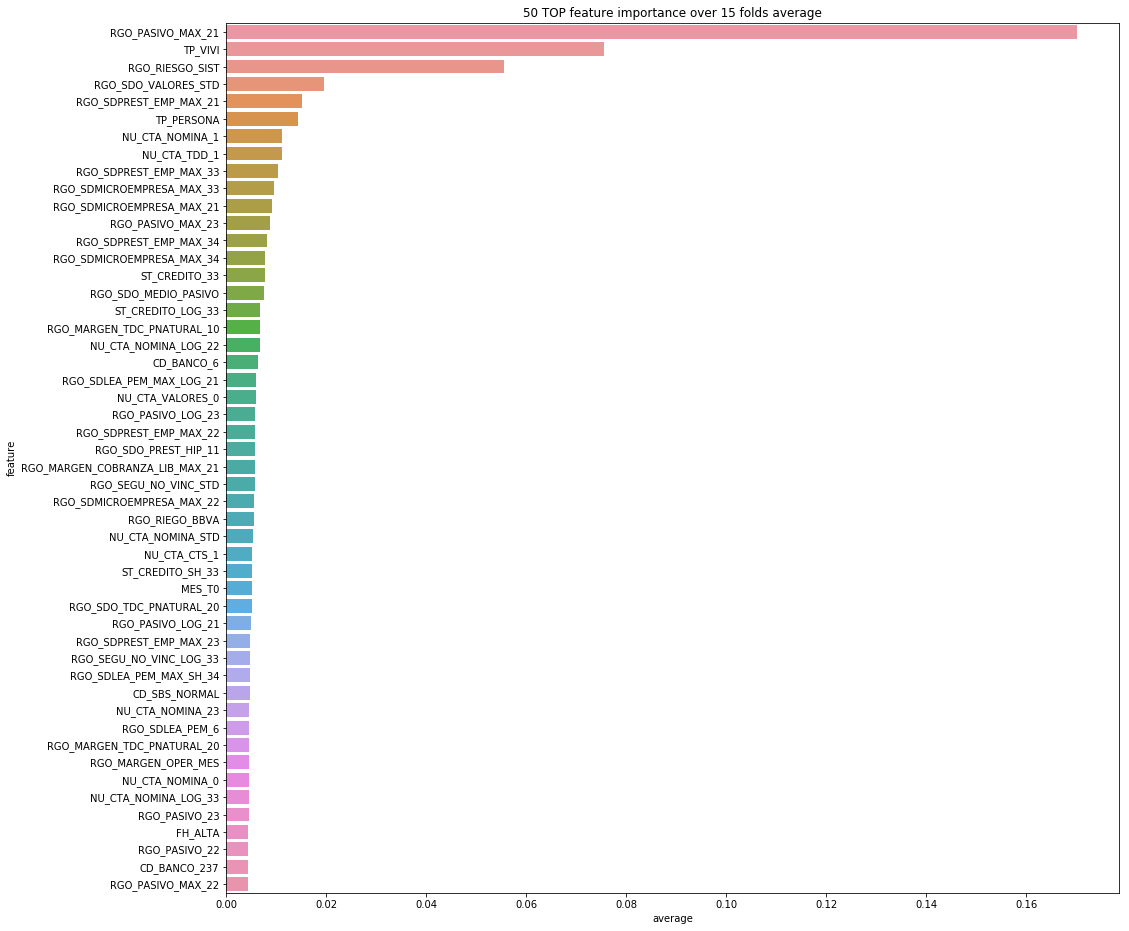

In [74]:

plt.figure(figsize=(16, 16))
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(15));

In [75]:
df_stock_submit = pd.read_csv('/kaggle/input/attrition-persona-juridica-bbva/DATA_STOCK_SUBMIT_SAMPLE.csv')
df_stock_submit.FUGA_3M = y_preds
df_stock_submit.head()

dzpL10_AVG = df_stock_submit.copy()
dzpL10_AVG.to_csv('submit_bbva_33222M_COUNT_MAX_15K_160F_9D.csv', index = False)


In [76]:

from IPython.display import HTML


def create_download_link(title = "Download CSV file", filename = "data.csv"):  
    html = '<a href={filename}>{title}</a>'
    html = html.format(title=title,filename=filename)
    return HTML(html)

create_download_link(filename='submit_bbva_33222M_COUNT_MAX_15K_160F_9D.csv')
